BSD 3-Clause License

Copyright (c) 2024, Moez Dawood
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS"
AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE
IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE
DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE
FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL
DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR
SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER
CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY,
OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE
OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.

# Using this notebook:


1. First download the input data

    Go to https://drive.google.com/drive/folders/1cdXoB0AMPCO0dWH_6Eff1smtCd5i5YPB?usp=drive_link

    Download all the files (~12 GB)

    Put all the files without changing their names into the inputs folder
    

2. Run notebook from top to bottom in order. If the entire github repository is downloaded and the contents are kept in the same order then you can click the 'Run all below' button.


3. The version of python used to run this notebook is:

    3.7.7 (default, May  6 2020, 04:59:01) 
    [Clang 4.0.1 (tags/RELEASE_401/final)]
    
    
4. The R version is 'R version 4.2.2 (2022-10-31). This is very pertinent for the rpy2 installation. If possible install rpy2 v3.5.7 and ggstatsplots v0.12.1


5. Please make sure to use a similar and compatible version of python otherwise some packages may be outdated or function differently.


6. Will take around 5-6 hours to produce all figures and tables found in the paper (including main text figures and supplement and a few additional figures) for gnomAD v2.1.1 and gnomAD v3.1.2 (non v2). The figures and tables will be found in the output folder.


7. Per the policy of the All of Us program, the code, inputs, and outputs for the All of Us analyses is in a declared workspace in the All of Us workbench. The code in the All of Us workspace is the same as below with modifications made for the specific data requirements of the All of Us platform. The workspace will be gladly and immediately shared with approved users upon request.

## Table Of Contents: <a class="anchor" id="step-toc"></a>

* [Part 1: Setup](#part-1)
* [Step 1](#step-1): Install and import all libraries. 
* [Step 2](#step-2): Set up hard coded variables
* [Step 3](#step-3): Breakdown of the databases by ancestry
* [Step 4](#step-4): Function to map all Clinical Significance calls into just 6 categories
* [Step 5](#step-5): Import Input Data from gnomAD
* [Step 6](#step-6): Set Main Dictionaries
* [Step 7](#step-7): Breakdown Databases By Medical Specialty and Variant Type
* [Step 8](#step-8): Filter out non-clinical genes for SGE and VAMPSEQ sets
* [Step 9](#step-9): Establish input dictionaries of the different gene sets
<br><br>
* [Part 2: Gene by Gene Statistical Testing (Wilcoxon singed-rank, matched-pairs test)](#part-2)
* [Step 10](#step-10): Function for Filtering by Variant Type
* [Step 11](#step-11): Functions for Grouping Genes
* [Step 12](#step-12): Functions for Calculating Allele Prevalence
* [Step 13](#step-13): Functions for Subsetting Needed Columns
* [Step 14](#step-14): Functions for Combining Allele Counts
* [Step 15](#step-15): Trigger Functions For Setting Up Plotting Dataframe
* [Step 16](#step-16): Miscellaneous Helper Functions
* [Step 17](#step-17): Filtering Zeroes For Plotting
* [Step 18](#step-18): Estimating Statistical Power
* [Step 19](#step-19): Functions to Generate Plots
* [Step 20](#step-20): Functions For Stats in R
* [Step 21](#step-21): Functions to Trigger Generating Combination Boxplots
<br><br>
* [Part 3: Figures for Gene by Gene Comparisons](#part-3) 
* [Step 22](#step-22): Population Breakdown Plots
* [Step 23](#step-23): Variant Type Breakdown Plots
* [Step 24](#step-24): Allele Prevalence and Clinical Significance Breakdown Plots
* [Step 25](#step-25): Make Forest Plots for Effect Size Comparisons
* [Step 26](#step-26): Bar Graphs of Allele Prevalence
<br><br>
* [Part 4: Unique Variant Examination (Orthogonal Chi-Square Test)](#part-4)
* [Step 27](#step-27): Functions to Set Up Unique Variants
* [Step 28](#step-28): Functions to Set Up Bar Graphs and Orthogonal Chi-Square Tests
* [Step 29](#step-29): Plotting Bar Graphs and Orthogonal Chi-Square Tests
* [Step 30](#step-30): Bar Graphs of Top Genes
<br><br>
* [Part 5: Variant Reclassification Setup](#part-5)
* [Step 31](#step-31): Import input data specifically for variant reclassification
* [Step 32](#step-32): Filling in Evidence Codes based on 2015 Criteria
* [Step 33](#step-33): Import MAVE data
* [Step 34](#step-34): General functions for variant reclassification
<br><br>
* [Part 6: ClinGen VCEP Gene-specific Criteria Specifications for VUS Reclassification](#part-6)
* [Step 35](#step-35): Updating Final Decision Trees of Evidence Codes
* [Step 36](#step-36): Updating BRCA1 evidence codes
* [Step 37](#step-37): BRCA1 Reclassifications
* [Step 38](#step-38): Updating TP53 evidence codes
* [Step 39](#step-39): TP53 Reclassifications
* [Step 40](#step-40): Updating PTEN evidence codes
* [Step 41](#step-41): PTEN Reclassifications
<br><br>
* [Part 7: Sankey Flow Diagrams of VUS Reclassification](#part-7)
* [Step 42](#step-42): Functions for Sankey flow visuals of variant reclassification
* [Step 43](#step-43): Sankey Flow Visuals for BRCA1
* [Step 44](#step-44): Sankey Flow Visuals for TP53
* [Step 45](#step-45): Sankey Flow Visuals for PTEN
<br><br>
* [Part 8: Overall VUS Reclassifications](#part-8)
* [Step 46](#step-46): Functions for Combining Variant Dataframes for Sankey Flow Visuals
* [Step 47](#step-47): Combined Sankey Flow Visuals for Each Gene
* [Step 48](#step-48): Combined Sankey Flow Visuals for Each Database
* [Step 49](#step-49): Combined Sankey Flow Visuals for Combined Genes and Databases
* [Step 50](#step-50): VUS Reclassifications Bar Graph
<br><br>
* [Part 9: Evidence Code Analysis](#part-9)
* [Step 51](#step-51): Functions for Evidence Code Breakdown
* [Step 52](#step-52): Plotting Evidence Code Frequencies
* [Step 53](#step-53): Paired Frequencies of Evidence Codes Based on Superpopulation Grouping
* [Step 54](#step-54): Functions for Quantifying Essential Evidence Codes
* [Step 55](#step-55): Plotting Evidence Code Breakdown with Essential Codes


Notebook Author: Moez Dawood

# Part 1: <a class="anchor" id="part-1"></a>Setup

# Step 1: <a class="anchor" id="step-1"></a> Make sure all required libraries are installed. Install and import all libraries. required_libraries is hardcoded and needs to be updated for new packages.
* [Back Up to Table of Contents](#step-toc)

In [231]:
!pip install importlib
!pip install subprocess.run

In [232]:
#pip install above libraries
#use importlib and subpocess to check if all other appropriate libs and installed
#if not then install those libraries
#also import all the libraries and subprocesses

import importlib
import subprocess

def check_and_import_libraries():
    required_libraries = [
        ("pandas", "pd"),
        ("os", "os"),
        ("numpy", "np"),
        ("matplotlib", "matplotlib"),
        ("matplotlib.font_manager", "fm"),
        ("matplotlib.pyplot", "plt"),
        ("re", "re"),
        ("scipy.stats", "scipy.stats"),
        ("itertools", "itertools"),
        ("statannotations", "statannotations"),
        ("statsmodels", "statsmodels"),
        ("statsmodels.stats.multitest", "multipletests"),
        ("matplotlib.ticker", "matplotlib.ticker"),
        ("bokeh.plotting", "bokeh_plotting"),
        ("seaborn", "sns"),
        ("pptx", "Presentation"),
        ("pptx.util", "Inches"),
        ("math", "math"),
        ("blosum", "bl"),
        ("csv", "csv"),
        ("requests", "requests"),
        ("xml.etree.ElementTree", "ET"),
        ("platform", "platform"),
        ("pathlib", "Path"),
        ("fastaparser", "fastaparser"),
        ("liftover", "liftover"),
        ("json", "json"),
        ("xmltodict", "xmltodict"),
        ('urllib','urllib'),
        ("hgvs", "hgvs"),
        ("hgvs.easy", "hgvs_easy"),   
        ("urllib.request", "urllib.request"),
        ("warnings", "warnings"),
        ('rpy2','rpy2'),
        ('ast','ast'),
        ('matplotlib_venn', 'matplotlib_venn'),
        ('kaleido', 'kaleido'),
        ('nbformat', 'nbformat'),
        ('plotly.io', 'pio'),
        ('sys','sys'),
        ("matplotlib.ticker", "mtick"),
        ('plotly.graph_objects', 'go'),
        ('statsmodels.stats.power','statsmodels.stats.power')
    ]

    missing_libraries = []

    for lib, alias in required_libraries:
        try:
            importlib.import_module(lib)
        except ImportError:
            missing_libraries.append((lib, alias))

    if missing_libraries:
        print("The following libraries are missing and will be installed:")
        for lib, alias in missing_libraries:
            print(f"- {lib} (as {alias})")
            subprocess.call(["pip", "install", lib])

        # Attempt to import the libraries again
        for lib, alias in missing_libraries:
            try:
                importlib.import_module(lib)
            except ImportError:
                print(f"Failed to install {lib}. Please install it manually.")
                return

    print("All required libraries are installed.")

    # Use globals() to make aliases available in the global namespace
    for lib, alias in required_libraries:
        globals()[alias] = importlib.import_module(lib)

check_and_import_libraries()


All required libraries are installed.


In [233]:
#this code block is redundant as the above function should import all needed libraries and subprocesses
#but this code block is easier to work with when building the notebook and getting a sense of everything needed
#imports all the libraries and subprocesses

import pandas as pd
import os
import numpy as np
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import re
from scipy.stats import wilcoxon
from scipy.stats import mannwhitneyu, normaltest
import statannotations
import statsmodels
from statannotations.Annotator import Annotator
from matplotlib import rc
from matplotlib.ticker import FuncFormatter
from bokeh.plotting import figure, show
from itertools import product
import seaborn as sns
from statsmodels.stats.multitest import multipletests
from matplotlib.backends.backend_pdf import PdfPages
import blosum as bl
import csv
import xml.etree.ElementTree as ET
import platform
from pathlib import Path
import fastaparser
from collections import Counter
from liftover import get_lifter
import json
import xmltodict
import hgvs 
from hgvs.easy import *
from urllib.request import urlopen
from itertools import combinations
import warnings
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter, rpy2py
from rpy2.robjects.packages import importr
from nbformat import read
import ast
from scipy import stats
import plotly.graph_objects as go
import urllib
import plotly.io as pio
import kaleido
import math
import requests, sys
from statsmodels.stats.power import GofChisquarePower
from scipy.stats import chi2_contingency
from scipy.stats import rankdata
from matplotlib_venn import venn2
import matplotlib.ticker as mtick

warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", 999)
pd.set_option("display.max_rows", 20)

# Step 2: <a class="anchor" id="step-2"></a> Set up hard coded variables including variables from gnomAD for number of individuals sequenced from each population (using same population descriptors assigned by gnomAD)
* [Back Up to Table of Contents](#step-toc)

In [235]:
# Create a dictionary of ancestry group numbers for calculating allele count per individual

#Numbers from table at https://gnomad.broadinstitute.org/help/what-populations-are-represented-in-the-gnomad-data
#Picture of table in github repository as well (picture named )

# 59,106 Non-Europeans vs. 64,603 Europeans for gnomad v2
ancestry_v2 = {
    'African/African American': 12487,
    'Latino/Admixed American': 17720,
    'East Asian': 9977,
    'European (non-Finnish)': 64603,
    'South Asian': 15308,
    'Other': 3614}

#For gnomad v3 there is a 14% overlap of individuals with gnomad v2
#Thus we are using the v3 non v2 data that has removed the 14% overlap
#Thus the v2 and v3nonv2 datasets are independent of each other and basically represent two different population databases
# 25,547 Non-European vs. 25,988 European for gnomad v3 non v2
ancestry_v3nonv2 = {
    'African/African American': 14377,
    'Latino/Admixed American': 6878,
    'East Asian': 1414,
    'European (non-Finnish)': 25988,
    'South Asian': 1946,
    'Other': 932}

ancestry_aou = {
    'African/African American': 53944,
    'Latino/Admixed American': 40838,
    'East Asian': 5381,
    'European': 123072,
    'South Asian': 2342,
    'Other': 19289
}


totalafrcount = ancestry_v2['African/African American'] + ancestry_v3nonv2['African/African American'] + ancestry_aou['African/African American']
totalsascount = ancestry_v2['South Asian'] + ancestry_v3nonv2['South Asian'] + ancestry_aou['South Asian']
totaleascount = ancestry_v2['East Asian'] + ancestry_v3nonv2['East Asian'] + ancestry_aou['East Asian']
totalamrcount = ancestry_v2['Latino/Admixed American'] + ancestry_v3nonv2['Latino/Admixed American'] + ancestry_aou['Latino/Admixed American']
totalothcount = ancestry_v2['Other'] + ancestry_v3nonv2['Other'] + ancestry_aou['Other'] + 528 #ancestry_aou['Middle Eastern']
totalnoneurocount = totalafrcount + totalsascount + totaleascount + totalamrcount + totalothcount
#print(totalnoneurocount)
totaleurocount = ancestry_v2['European (non-Finnish)'] + ancestry_v3nonv2['European (non-Finnish)'] + ancestry_aou['European']
#print(totaleurocount)


#VEP Annotations in gnomAD for different variant types
coding = ['stop_lost', 
          'frameshift_variant', 
          'synonymous_variant', 
          'missense_variant', 
          'stop_gained', 
          'inframe_deletion', 
          'splice_region_variant', 
          'splice_donor_variant',
          'start_lost', 
          'splice_acceptor_variant', 
          'inframe_insertion',
          'coding_sequence_variant', 
          'protein_altering_variant',
          'stop_retained_variant', 
          'incomplete_terminal_codon_variant']

coding1 = [ 
    'missense_variant', 
    'synonymous_variant',
    'stop_gained', 
    'stop_lost',
    'stop_retained_variant',
    'splice_region_variant', 
    'splice_donor_variant',
    'splice_acceptor_variant',
    'frameshift_variant',
    'inframe_deletion', 
    'inframe_insertion',
    'inframe',
    'start_lost']

codingwithoutmissense = ['stop_lost', 
          'frameshift_variant', 
          'synonymous_variant', 
          'stop_gained', 
          'inframe_deletion', 
          'splice_region_variant', 
          'splice_donor_variant',
          'start_lost', 
          'splice_acceptor_variant', 
          'inframe_insertion',
          'coding_sequence_variant', 
          'protein_altering_variant',
          'stop_retained_variant', 
          'incomplete_terminal_codon_variant']

missense = ['missense_variant']
frameshift = ['frameshift_variant']
synonymous = ['synonymous_variant']
inframes = ['inframe_deletion', 'inframe_insertion']
stops = ['stop_lost','stop_gained', 'stop_retained_variant', 'incomplete_terminal_codon_variant']
canonicalsplice = ['splice_donor_variant', 'splice_acceptor_variant']
spliceregion = ['splice_region_variant']

noncoding = ['5_prime_UTR_variant', '3_prime_UTR_variant', 'intron_variant'] 

varianttypemappingcoding = {
    'coding' : coding,
    'codingwithoutmissense' : codingwithoutmissense,
    'missense' : missense,
    'frameshift' : frameshift,
    'synonymous' : synonymous,
    'inframes' : inframes,
    'stops' : stops,
    'canonicalsplice' : canonicalsplice}

# varianttypemappingnoncoding = {
#     'noncoding' : noncoding,
#     'spliceregion' : spliceregion
# }

varianttypemappingforpaper = {
    'coding' : coding,
    'codingwithoutmissense' : codingwithoutmissense,
    'noncoding' : noncoding
}

varianttypemappingall = {
    'coding' : coding1,
    'noncoding' : noncoding,

}

varianttypemappingjustcoding = {
    'coding' : coding
}


varianttypemappingnoncoding = {
    'noncoding' : noncoding
}

variantmappingdictforylabels = {
    'stop_lost' : 'Stop Lost', 
    'frameshift_variant' : 'Frameshift', 
    'synonymous_variant' : 'Synonymous', 
    'missense_variant' : 'Missense', 
    'stop_gained' : 'Stop Gain', 
    'inframe_deletion' : 'Inframe Deletion', 
    'splice_region_variant' : 'Splice Region', 
    'splice_donor_variant' : 'Splice Donor',
    'start_lost' : 'Start Lost', 
    'splice_acceptor_variant' : 'Splice Acceptor', 
    'inframe_insertion' : 'Inframe Insertion',
    'stop_retained_variant' : 'Stop Retained',
    '3_prime_UTR_variant' : "3′ UTR", 
    'intron_variant' : 'Intronic', 
    '5_prime_UTR_variant' : "5′ UTR",
    'inframe' : 'Inframe'
    
}
#Current inputs are already prepopulated for the two superpopulation groups below in the input files
popdescrips2 = ['African/African American', 'Latino/Admixed American', 'East Asian', 'South Asian', 'Other']
popdescrips1 = ['European (non-Finnish)']


# Step 3: <a class="anchor" id="step-3"></a> Breakdown of the databases by genetic ancestry
* [Back Up to Table of Contents](#step-toc)

In [236]:
def plot_bar_graph(dictionaries, x_labels_mapping=None, colors=None, legend_labels=None, title="Horizontal Bar Graph", x_label="Count (in thousands)", y_label="Categories"):
    # Extract keys and values from the dictionaries
    categories = [list(dic.keys()) for dic in dictionaries]
    counts = [list(dic.values()) for dic in dictionaries]
    num_categories = len(categories[0])
    plt.rcParams['font.family'] = 'Helvetica'
    # Set the height of the bars
    bar_height = 0.8 / max(len(dictionaries), 1)

    # Create figure and axis objects
    fig, ax = plt.subplots()
    # Hide the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.grid(False)

    # Define the y positions for the bars
    y = np.arange(num_categories)

    bars = []
    for i, (category, count) in enumerate(zip(categories, counts)):
        # Shift the y positions for the bars in each dictionary
        if len(dictionaries) > 1:
            y_shifted = y + i * bar_height - bar_height / 2
        else:
            y_shifted = y

        # Create the bars for each dictionary with specified color or default
        color = colors[i] if colors and i < len(colors) else None
        bar = ax.barh(y_shifted, count, bar_height, label=legend_labels[i] if legend_labels and i < len(legend_labels) else f'Dictionary {i+1}', color=color, edgecolor='black')
        bars.append(bar)

    # Set labels, title, and legend
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

    # Replace x-axis labels if x_labels_mapping is provided
    if x_labels_mapping:
        print(categories[0])
        new_labels = [x_labels_mapping[label] for label in categories[0]]
        ax.set_yticklabels([], rotation=0, ha='right')
        for i, label in enumerate(new_labels):
            # Set the labels at appropriate positions
            ax.text(-1000, i, label, ha='right', va='center')
        print(new_labels)
        ax.set_ylabel(y_label, labelpad=150)

    ax.legend()

    # Display the counts to the right of the bars
    label_padding = 3  
    for bar in bars:
        for b in bar:
            width = b.get_width()
            label_x_pos = width + label_padding + 1000  
            ax.annotate('{}'.format(format(int(width), ',')),
                        xy=(label_x_pos, b.get_y() + b.get_height() / 2),
                        xytext=(0, 0),  
                        textcoords="offset points",
                        ha='left', va='center')

    # Customize the x-axis labels to display values divided by 1000
    def x_axis_formatter(value, _):
        return f'{int(value / 1000)}K'

    ax.xaxis.set_major_formatter(FuncFormatter(x_axis_formatter))

    # To make the graph more visually appealing and provide space at the right
    plt.tight_layout()
    plt.subplots_adjust(right=2.0)  

    # Show the plot
    plt.show()


In [237]:
x_labels_mapping = {'Other': 'Other', 
                    'South Asian': 'South Asian-like',
                    'European (non-Finnish)': 'European (non-Finnish)-like',
                    'European': 'European-like',
                    'East Asian': 'East Asian-like',
                    'Latino/Admixed American': 'Latino/Admixed American-like', 
                    'African/African American': 'African/African American-like'}


['African/African American', 'Latino/Admixed American', 'East Asian', 'European (non-Finnish)', 'South Asian', 'Other']
['African/African American-like', 'Latino/Admixed American-like', 'East Asian-like', 'European (non-Finnish)-like', 'South Asian-like', 'Other']


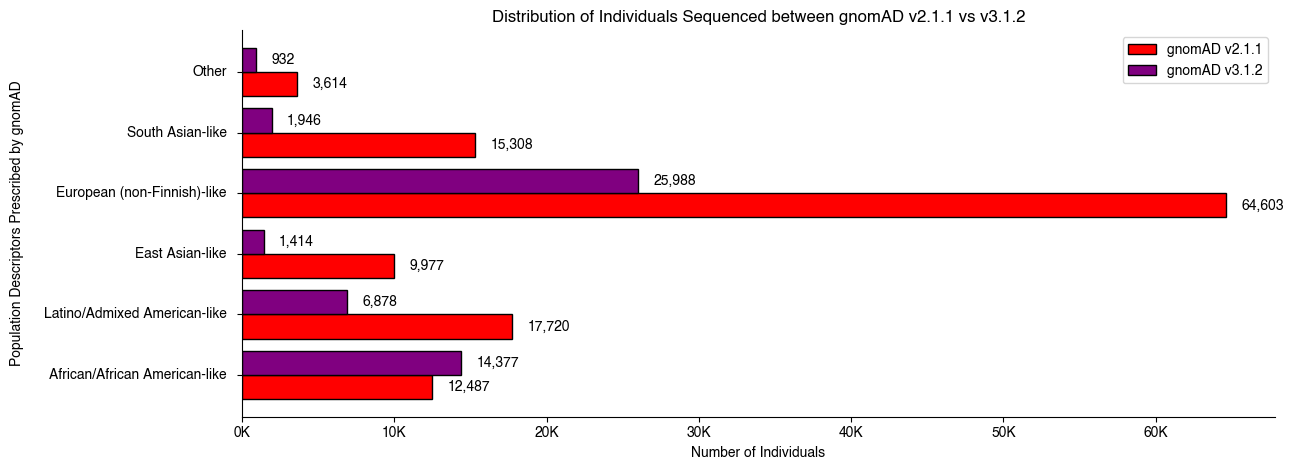

In [238]:
# Specify custom colors for each dictionary
custom_colors = ['red','purple']

# Specify legend labels for each dictionary
legend_labels = ['gnomAD v2.1.1', 'gnomAD v3.1.2']

plot_bar_graph(dictionaries = [ancestry_v2, ancestry_v3nonv2],
               x_labels_mapping=x_labels_mapping,
               colors=custom_colors, 
               legend_labels=legend_labels, 
               title="Distribution of Individuals Sequenced between gnomAD v2.1.1 vs v3.1.2", 
               y_label="Population Descriptors Prescribed by gnomAD", 
               x_label="Number of Individuals")

['African/African American', 'Latino/Admixed American', 'East Asian', 'European', 'South Asian', 'Other']
['African/African American-like', 'Latino/Admixed American-like', 'East Asian-like', 'European-like', 'South Asian-like', 'Other']


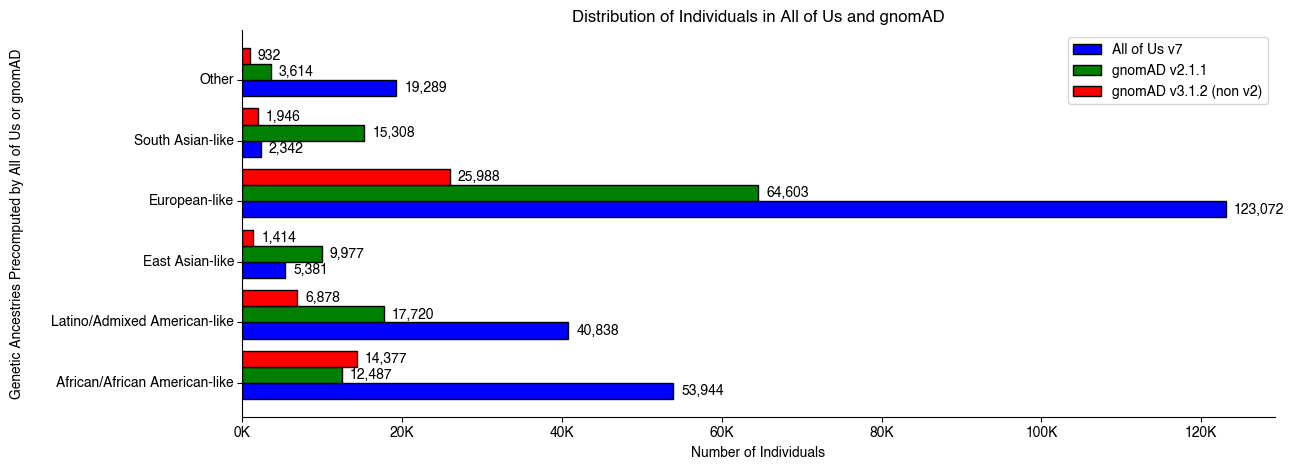

In [239]:
# Specify custom colors for each dictionary
custom_colors = ['blue','green','red']

# Specify legend labels for each dictionary
legend_labels = ['All of Us v7', 'gnomAD v2.1.1', 'gnomAD v3.1.2 (non v2)', ]

plot_bar_graph(dictionaries = [ancestry_aou, ancestry_v2, ancestry_v3nonv2],
               x_labels_mapping=x_labels_mapping,
               colors=custom_colors, 
               legend_labels=legend_labels, 
               title="Distribution of Individuals in All of Us and gnomAD", 
               x_label="Number of Individuals", 
               y_label="Genetic Ancestries Precomputed by All of Us or gnomAD")

['African/African American', 'Latino/Admixed American', 'East Asian', 'European', 'South Asian', 'Other']
['African/African American-like', 'Latino/Admixed American-like', 'East Asian-like', 'European-like', 'South Asian-like', 'Other']


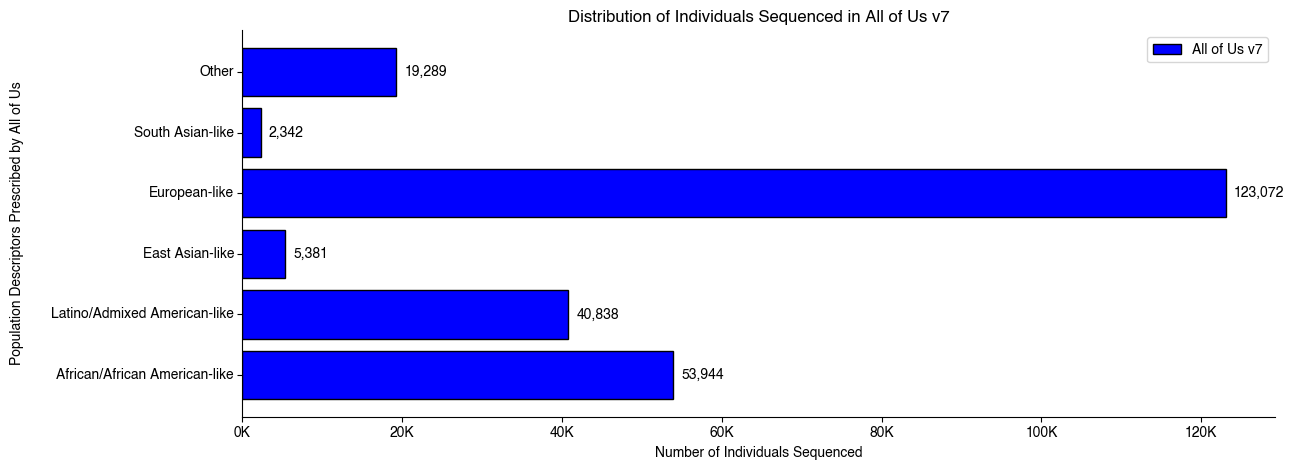

In [240]:
# Specify custom colors for each dictionary
custom_colors = ['blue']

# Specify legend labels for each dictionary
legend_labels = ['All of Us v7']

plot_bar_graph([ancestry_aou], 
               x_labels_mapping=x_labels_mapping,
               colors=custom_colors, 
               legend_labels=legend_labels, 
               title="Distribution of Individuals Sequenced in All of Us v7", 
               y_label="Population Descriptors Prescribed by All of Us", 
               x_label="Number of Individuals Sequenced")

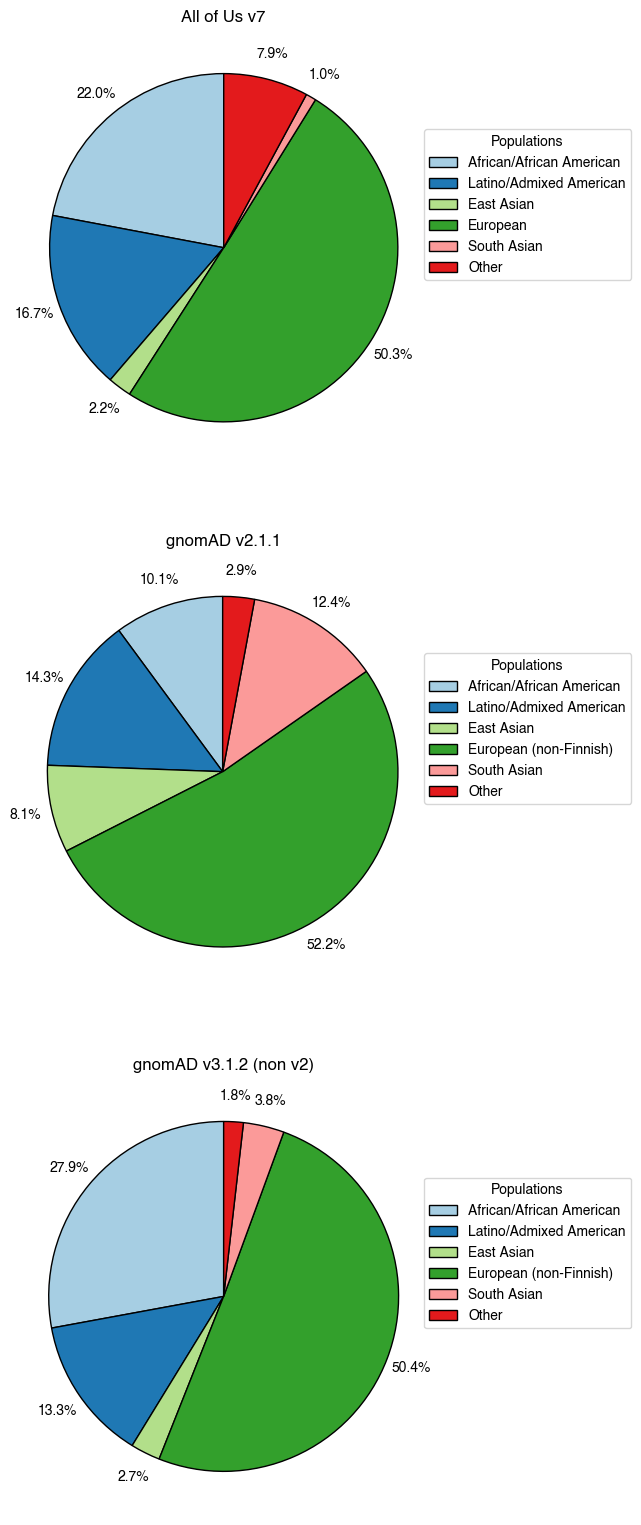

In [241]:
def plot_pie_charts(dictionaries, legend_labels=None, title="Pie Charts"):
    # Number of charts to plot
    num_charts = len(dictionaries)
    plt.rcParams['font.family'] = 'Helvetica'

    # Create figure and axis objects
    fig, axs = plt.subplots(num_charts, 1, figsize=(5, 5 * num_charts), constrained_layout=True)

    # If there's only one chart, axs will not be a list, so we wrap it in a list for consistent indexing
    if num_charts == 1:
        axs = [axs]

    for i, dic in enumerate(dictionaries):
        categories = list(dic.keys())
        counts = list(dic.values())

        # Decrease the pctdistance to move labels closer to the pie
        wedges, texts, autotexts = axs[i].pie(counts, labels=None, autopct='%1.1f%%', startangle=90, pctdistance=1.15, colors=plt.cm.Paired(range(len(categories))), wedgeprops=dict(edgecolor='black'))

        # Add a legend on the side with color-coded labels
        axs[i].legend(wedges, categories, title="Populations", loc="center left", bbox_to_anchor=(1, 0.6))
        
        # Set equal aspect ratio to ensure that pie is drawn as a circle.
        axs[i].axis('equal')

        axs[i].set_title(legend_labels[i] if legend_labels and i < len(legend_labels) else f'Chart {i+1}')

    fig.suptitle(title)

    # Adjust the spacing between subplots
    plt.subplots_adjust(wspace=1)  
    plt.subplots_adjust(top=1.1)
    
    # Show the plots
    plt.show()

legend_labels = ['All of Us v7', 'gnomAD v2.1.1', 'gnomAD v3.1.2 (non v2)']

plot_pie_charts([ancestry_aou, ancestry_v2, ancestry_v3nonv2], 
                legend_labels=legend_labels, 
                title="")


# Step 4: <a class="anchor" id="step-4"></a> Function to map all Clinical Significance calls into just 6 categories
* [Back Up to Table of Contents](#step-toc)

In [242]:
#map clinvar values
def replace_clinvar_values(df):
    replace_dict = {
        "Affects": 'Not Included',
        "Benign": "Benign or Likely Benign",
        "Benign/Likely benign": "Benign or Likely Benign",
        "Benign/Likely benign; other": "Benign or Likely Benign",
        "Benign/Likely benign; risk factor": "Benign or Likely Benign",
        "Benign; other": "Benign or Likely Benign",
        "Likely benign; other": "Benign or Likely Benign",
        "Conflicting interpretations of pathogenicity": "Conflicting Interpretations",
        "Conflicting interpretations of pathogenicity; association; risk factor": "Conflicting Interpretations",
        "Conflicting interpretations of pathogenicity; other": "Conflicting Interpretations",
        "Conflicting interpretations of pathogenicity; other; risk factor": "Conflicting Interpretations",
        "Conflicting interpretations of pathogenicity; risk factor": "Conflicting Interpretations",
        "Likely benign": "Benign or Likely Benign",
        "Likely pathogenic; risk factor": "Pathogenic or Likely Pathogenic",
        "Likely pathogenic": "Pathogenic or Likely Pathogenic",
        "Likely pathogenic; drug response": "Pathogenic or Likely Pathogenic",
        "Pathogenic/Likely pathogenic/Pathogenic, low penetrance": "Pathogenic or Likely Pathogenic",
        "Pathogenic/Likely pathogenic/Pathogenic, low penetrance; other": "Pathogenic or Likely Pathogenic",
        "Pathogenic; Affects": "Pathogenic or Likely Pathogenic",
        "not provided": "Not Included",
        "drug response": "Not Included",
        "association": "Not Included",
        "other": "Not Included",
        "risk factor": "Not Included",
        "Uncertain significance/Uncertain risk allele": "Variant of Uncertain Significance",
        "Uncertain significance": "Variant of Uncertain Significance",
        "Uncertain significance; association": "Variant of Uncertain Significance",
        "Pathogenic; drug response": "Pathogenic or Likely Pathogenic",
        "Pathogenic/Likely risk allele": "Pathogenic or Likely Pathogenic",
        "Pathogenic/Likely pathogenic; other": "Pathogenic or Likely Pathogenic",
        "Pathogenic/Likely pathogenic": "Pathogenic or Likely Pathogenic",
        "Pathogenic": "Pathogenic or Likely Pathogenic",
        "Likely risk allele": "Not Included",
        "Benign/Likely benign": "Benign or Likely Benign",
        np.nan: "No Designation"  # replace empty cells with No Designation
    }
    df["Original ClinVar Clinical Significance"] = df["ClinVar Clinical Significance"]
    df["ClinVar Clinical Significance"] = df["ClinVar Clinical Significance"].replace(replace_dict)
    return df



# Step 5: <a class="anchor" id="step-5"></a>Import Input Data from gnomAD
* [Back Up to Table of Contents](#step-toc)

In [243]:
#ACMG78_gnomadv2_link = "https://drive.google.com/file/d/1jTXs5by8LrwNgav8QsJEZhLnzMyiEeJx/view?usp=sharing"
ACMG78_gnomadv2_destination = "inputs/ACMG78_gnomadv2.csv"
ACMG78_gnomadv2 = pd.read_csv(ACMG78_gnomadv2_destination)
print('ACMG78_gnomadv2 read in')

ACMG78_gnomadv2 read in


In [244]:
#ACMG78_gnomadv3_link = "https://drive.google.com/file/d/1DwsWTbeWJ2ENm8v_JpCPn-Ed2GdG10w9/view?usp=sharing"
ACMG78_gnomadv3_destination = "inputs/ACMG78_gnomadv3.csv"
ACMG78_gnomadv3 = pd.read_csv(ACMG78_gnomadv3_destination)
print('ACMG78_gnomadv3 read in')

ACMG78_gnomadv3 read in


In [245]:
#AllergyandImmunology_gnomadv2_link = "https://drive.google.com/file/d/1cDpdy_llNQ4SHa8we9UnWm7Pdq0d8-iT/view?usp=sharing"
AllergyandImmunology_gnomadv2_destination = "inputs/AllergyandImmunology_gnomadv2.csv"
AllergyandImmunology_gnomadv2 = pd.read_csv(AllergyandImmunology_gnomadv2_destination)
print('AllergyandImmunology_gnomadv2 read in')

AllergyandImmunology_gnomadv2 read in


In [246]:
#AllergyandImmunology_gnomadv3_link = "https://drive.google.com/file/d/1USxPdQVHEnxCdfIarDYU5904CGoOQ-wy/view?usp=sharing"
AllergyandImmunology_gnomadv3_destination = "inputs/AllergyandImmunology_gnomadv3.csv"
AllergyandImmunology_gnomadv3 = pd.read_csv(AllergyandImmunology_gnomadv3_destination)
print('AllergyandImmunology_gnomadv3 read in')

AllergyandImmunology_gnomadv3 read in


In [247]:
#Cancer_gnomadv2_link = "https://drive.google.com/file/d/1q9rZiS9N5BxZZsLm2LU4hpFth1ebyzgm/view?usp=sharing"
Cancer_gnomadv2_destination = "inputs/Cancer_gnomadv2.csv"
Cancer_gnomadv2 = pd.read_csv(Cancer_gnomadv2_destination)
print('Cancer_gnomadv2 read in')

Cancer_gnomadv2 read in


In [248]:
#Cancer_gnomadv3_link = "https://drive.google.com/file/d/1W0qcgiD_YFcoGb_xAPSzIk2hYoZmC4K3/view?usp=sharing"
Cancer_gnomadv3_destination = "inputs/Cancer_gnomadv3.csv"
Cancer_gnomadv3 = pd.read_csv(Cancer_gnomadv3_destination)
print('Cancer_gnomadv3 read in')

Cancer_gnomadv3 read in


In [249]:
#Cardiac_gnomadv2_link = "https://drive.google.com/file/d/1zzjr0McaOcfqif-5V6v374gOgjsXMPIK/view?usp=sharing"
Cardiac_gnomadv2_destination = "inputs/Cardiac_gnomadv2.csv"
Cardiac_gnomadv2 = pd.read_csv(Cardiac_gnomadv2_destination)
print('Cardiac_gnomadv2 read in')

Cardiac_gnomadv2 read in


In [250]:
#Cardiac_gnomadv3_link = "https://drive.google.com/file/d/1i92zp1aQcpLPwVJj1HP41iAgzxObJ2QA/view?usp=sharing"
Cardiac_gnomadv3_destination = "inputs/Cardiac_gnomadv3.csv"
Cardiac_gnomadv3 = pd.read_csv(Cardiac_gnomadv3_destination)
print('Cardiac_gnomadv3 read in')

Cardiac_gnomadv3 read in


In [251]:
#Carrier_gnomadv2_link = "https://drive.google.com/file/d/1hVl1Al3s0RtFE0vhOb9UY8LpeJnEMvmJ/view?usp=sharing"
Carrier_gnomadv2_destination = "inputs/Carrier_gnomadv2.csv"
Carrier_gnomadv2 = pd.read_csv(Carrier_gnomadv2_destination)
print('Carrier_gnomadv2 read in')

Carrier_gnomadv2 read in


In [252]:
#Carrier_gnomadv3_link = "https://drive.google.com/file/d/1ldiTWacBeox_c-JgUlufafSs0c_vGv9t/view?usp=sharing"
Carrier_gnomadv3_destination = "inputs/Carrier_gnomadv3.csv"
Carrier_gnomadv3 = pd.read_csv(Carrier_gnomadv3_destination)
print('Carrier_gnomadv3 read in')

Carrier_gnomadv3 read in


In [253]:
#DDG2P_gnomadv2_link = "https://drive.google.com/file/d/1IKTld4p4Pq-qFrThgJ5sTzWPJJ9MlAYQ/view?usp=sharing"
DDG2P_gnomadv2_destination = "inputs/DDG2P_gnomadv2.csv"
DDG2P_gnomadv2 = pd.read_csv(DDG2P_gnomadv2_destination)
print('DDG2P_gnomadv2 read in')

KeyboardInterrupt: 

In [ ]:
#DDG2P_gnomadv3_link = "https://drive.google.com/file/d/1tsI_1xj_Ap5BWAA4V_Uj2ntUZC_DGmBe/view?usp=sharing"
DDG2P_gnomadv3_destination = "inputs/DDG2P_gnomadv3.csv"
DDG2P_gnomadv3 = pd.read_csv(DDG2P_gnomadv3_destination)
print('DDG2P_gnomadv3 read in')

In [ ]:
#Endocrinology_gnomadv2_link = "https://drive.google.com/file/d/1IWMPkYErcZGsROibEs3qyosNGubi4wPq/view?usp=sharing"
Endocrinology_gnomadv2_destination = "inputs/Endocrinology_gnomadv2.csv"
Endocrinology_gnomadv2 = pd.read_csv(Endocrinology_gnomadv2_destination)
print('Endocrinology_gnomadv2 read in')

In [ ]:
#Endocrinology_gnomadv3_link = "https://drive.google.com/file/d/1Bb8QLk-UO3NKV7z3faaDHEbg6YeYz-Qv/view?usp=sharing"
Endocrinology_gnomadv3_destination = "inputs/Endocrinology_gnomadv3.csv"
Endocrinology_gnomadv3 = pd.read_csv(Endocrinology_gnomadv3_destination)
print('Endocrinology_gnomadv3 read in')

In [ ]:
#GenCC_gnomadv2_link = "https://drive.google.com/file/d/1vsFFlEgSKbx1fbzFA4HpHGR3wM1FQtIf/view?usp=sharing"
GenCC_gnomadv2_destination = "inputs/GenCC_gnomadv2.csv"
GenCC_gnomadv2 = pd.read_csv(GenCC_gnomadv2_destination)
print('GenCC_gnomadv2 read in')

In [ ]:
#GenCC_gnomadv3_link = "https://drive.google.com/file/d/172CIFNbevP8czyykiu5XCveg7ssM6sak/view?usp=sharing"
GenCC_gnomadv3_destination = "inputs/GenCC_gnomadv3.csv"
GenCC_gnomadv3 = pd.read_csv(GenCC_gnomadv3_destination)
print('GenCC_gnomadv3 read in')

In [ ]:
#Hematology_gnomadv2_link = "https://drive.google.com/file/d/1PdILV35u5TULpz1xXPbFuM3ldn7yRRD8/view?usp=sharing"
Hematology_gnomadv2_destination = "inputs/Hematology_gnomadv2.csv"
Hematology_gnomadv2 = pd.read_csv(Hematology_gnomadv2_destination)
print('Hematology_gnomadv2 read in')

In [ ]:
#Hematology_gnomadv3_link = "https://drive.google.com/file/d/1DkIKE2h3Gu7ktvOy00VGM-EejusJQuvi/view?usp=sharing"
Hematology_gnomadv3_destination = "inputs/Hematology_gnomadv3.csv"
Hematology_gnomadv3 = pd.read_csv(Hematology_gnomadv3_destination)
print('Hematology_gnomadv3 read in')

In [ ]:
#InbornErrorsOfMetabolism_gnomadv2_link = "https://drive.google.com/file/d/1p6KsIZOdsQ0ouQGNqpfzRG1vjFbL6Faz/view?usp=sharing"
InbornErrorsOfMetabolism_gnomadv2_destination = "inputs/InbornErrorsOfMetabolism_gnomadv2.csv"
InbornErrorsOfMetabolism_gnomadv2 = pd.read_csv(InbornErrorsOfMetabolism_gnomadv2_destination)
print('InbornErrorsOfMetabolism_gnomadv2 read in')

In [ ]:
#InbornErrorsOfMetabolism_gnomadv3_link = "https://drive.google.com/file/d/1J1WGjuzta-nR7bImbxavgbK49RULILDG/view?usp=sharing"
InbornErrorsOfMetabolism_gnomadv3_destination = "inputs/InbornErrorsOfMetabolism_gnomadv3.csv"
InbornErrorsOfMetabolism_gnomadv3 = pd.read_csv(InbornErrorsOfMetabolism_gnomadv3_destination)
print('InbornErrorsOfMetabolism_gnomadv3 read in')

In [ ]:
#MAVERegistry_gnomadv2_link = "https://drive.google.com/file/d/17rC3Ky5kbi0Jp7X0cQPmXkw7Db4o-08/view?usp=sharing"
MAVERegistry_gnomadv2_destination = "inputs/MAVERegistry_gnomadv2.csv"
MAVERegistry_gnomadv2 = pd.read_csv(MAVERegistry_gnomadv2_destination)
print('MAVERegistry_gnomadv2 read in')

In [ ]:
#MAVERegistry_gnomadv3_link = "https://drive.google.com/file/d/1Gn-P_6ovCkkBU9HJaqCL4syLexwDejZR/view?usp=sharing"
MAVERegistry_gnomadv3_destination = "inputs/MAVERegistry_gnomadv3.csv"
MAVERegistry_gnomadv3 = pd.read_csv(MAVERegistry_gnomadv3_destination)
print('MAVERegistry_gnomadv3 read in')

In [ ]:
#Newborn_gnomadv2_link = "https://drive.google.com/file/d/14KzzvdiX1hCxmhmMDtHjhVEAPlEz6QHR/view?usp=sharing"
Newborn_gnomadv2_destination = "inputs/Newborn_gnomadv2.csv"
Newborn_gnomadv2 = pd.read_csv(Newborn_gnomadv2_destination)
print('Newborn_gnomadv2 read in')

In [ ]:
#Newborn_gnomadv3_link = "https://drive.google.com/file/d/1KSWKCib0h4rEe6KSM3dKQq9bUi4f9Oxg/view?usp=sharing"
Newborn_gnomadv3_destination = "inputs/Newborn_gnomadv3.csv"
Newborn_gnomadv3 = pd.read_csv(Newborn_gnomadv3_destination)
print('Newborn_gnomadv3 read in')

In [ ]:
#Nephrology_gnomadv2_link = "https://drive.google.com/file/d/1-X4k4ZZX5B5rpS89eMKIGIjvSTgsmrUC/view?usp=sharing"
Nephrology_gnomadv2_destination = "inputs/Nephrology_gnomadv2.csv"
Nephrology_gnomadv2 = pd.read_csv(Nephrology_gnomadv2_destination)
print('Nephrology_gnomadv2 read in')

In [ ]:
#Nephrology_gnomadv3_link = "https://drive.google.com/file/d/1kDqNAwE3PMu1PVCUCb5r53AXQAChsRJt/view?usp=sharing"
Nephrology_gnomadv3_destination = "inputs/Nephrology_gnomadv3.csv"
Nephrology_gnomadv3 = pd.read_csv(Nephrology_gnomadv3_destination)
print('Nephrology_gnomadv3 read in')

In [ ]:
#Neurology_gnomadv2_link = "https://drive.google.com/file/d/1ifnkuLttO3INh7jDQQ4wCEvHJdd4Pg-Z/view?usp=sharing"
Neurology_gnomadv2_destination = "inputs/Neurology_gnomadv2.csv"
Neurology_gnomadv2 = pd.read_csv(Neurology_gnomadv2_destination)
print('Neurology_gnomadv2 read in')

In [ ]:
#Neurology_gnomadv3_link = "https://drive.google.com/file/d/197U12zZo406Tn1T6bdoJA8koE3IwOOjL/view?usp=sharing"
Neurology_gnomadv3_destination = "inputs/Neurology_gnomadv3.csv"
Neurology_gnomadv3 = pd.read_csv(Neurology_gnomadv3_destination)
print('Neurology_gnomadv3 read in')

In [ ]:
#Ophthalmology_gnomadv2_link = "https://drive.google.com/file/d/1QGxa1uQCJf1CmLSYB-88-HE7uKq_yQnT/view?usp=sharing"
Ophthalmology_gnomadv2_destination = "inputs/Ophthalmology_gnomadv2.csv"
Ophthalmology_gnomadv2 = pd.read_csv(Ophthalmology_gnomadv2_destination)
print('Ophthalmology_gnomadv2 read in')

In [ ]:
#Ophthalmology_gnomadv3_link = "https://drive.google.com/file/d/16BWv4xedFz33AZ956Rb_EdMpc0s7laa6/view?usp=sharing"
Ophthalmology_gnomadv3_destination = "inputs/Ophthalmology_gnomadv3.csv"
Ophthalmology_gnomadv3 = pd.read_csv(Ophthalmology_gnomadv3_destination)
print('Ophthalmology_gnomadv3 read in')

In [ ]:
#SGE_gnomadv2_link = "https://drive.google.com/file/d/1i0EB6iQ4SXNXIv9WAAVY5v_O13x6mawq/view?usp=sharing"
SGE_gnomadv2_destination = "inputs/SGE_gnomadv2.csv"
SGE_gnomadv2 = pd.read_csv(SGE_gnomadv2_destination)
print('SGE_gnomadv2 read in')

In [ ]:
#SGE_gnomadv3_link = "https://drive.google.com/file/d/1Hn2qRVG8eEZBym0hdf_JaDghG_1GPfsc/view?usp=sharing"
SGE_gnomadv3_destination = "inputs/SGE_gnomadv3.csv"
SGE_gnomadv3 = pd.read_csv(SGE_gnomadv3_destination)
print('SGE_gnomadv3 read in')

In [ ]:
#VAMPSEQ_gnomadv2_link = "https://drive.google.com/file/d/1hiVl12GB2BPjzPfSxVTugMYnJ6Afi_xK/view?usp=sharing"
VAMPSEQ_gnomadv2_destination = "inputs/VAMPSEQ_gnomadv2.csv"
VAMPSEQ_gnomadv2 = pd.read_csv(VAMPSEQ_gnomadv2_destination)
print('VAMPSEQ_gnomadv2 read in')

In [ ]:
#VAMPSEQ_gnomadv3_link = "https://drive.google.com/file/d/14uQ5nSgWj6l01FxaBinbrRRG0ETgagVA/view?usp=sharing"
VAMPSEQ_gnomadv3_destination = "inputs/VAMPSEQ_gnomadv3.csv"
VAMPSEQ_gnomadv3 = pd.read_csv(VAMPSEQ_gnomadv3_destination)
print('VAMPSEQ_gnomadv3 read in')

# Step 6: <a class="anchor" id="step-6"></a>Set Main Dictionaries
* [Back Up to Table of Contents](#step-toc)

In [ ]:
#seting up dictionaries of each specialty
#used in pie charts and box plots below
#key value is used as label in figures

inputdictionaryv2 = {
    'Cardiology': Cardiac_gnomadv2,
    'Endocrinology': Endocrinology_gnomadv2,
    'Nephrology': Nephrology_gnomadv2,
    'Hematology': Hematology_gnomadv2,
    'Oncology': Cancer_gnomadv2,
    'Allergy and Immunology': AllergyandImmunology_gnomadv2,
    'Ophthalmology': Ophthalmology_gnomadv2,
    'Neurology': Neurology_gnomadv2,
    'Developmental Disorders (DDG2P)': DDG2P_gnomadv2,
    'Carrier Screening': Carrier_gnomadv2,
    'Newborn Screening': Newborn_gnomadv2,
    'Inborn Errors of Metabolism': InbornErrorsOfMetabolism_gnomadv2,
    'All Curated Clinical Genes (GenCC)': GenCC_gnomadv2,
    'Reportable Secondary Findings (ACMG)': ACMG78_gnomadv2
}

inputdictionaryv3 = {
    'Cardiology': Cardiac_gnomadv3,
    'Endocrinology': Endocrinology_gnomadv3,
    'Nephrology': Nephrology_gnomadv3,
    'Hematology': Hematology_gnomadv3,
    'Oncology': Cancer_gnomadv3,
    'Allergy and Immunology': AllergyandImmunology_gnomadv3,
    'Ophthalmology': Ophthalmology_gnomadv3,
    'Neurology': Neurology_gnomadv3,
    'Developmental Disorders (DDG2P)': DDG2P_gnomadv3,
    'Carrier Screening': Carrier_gnomadv3,
    'Newborn Screening': Newborn_gnomadv3,
    'Inborn Errors of Metabolism': InbornErrorsOfMetabolism_gnomadv3,
    'All Curated Clinical Genes (GenCC)': GenCC_gnomadv3,
    'Reportable Secondary Findings (ACMG)': ACMG78_gnomadv3
}


inputdictGenCCv2 = {
    'All Curated Clinical Genes (GenCC)': GenCC_gnomadv2
}

inputdictGenCCv3 = {
    'All Curated Clinical Genes (GenCC)': GenCC_gnomadv3
}


inputdictACMG78v2 = {
    'Reportable Secondary Findings (ACMG)': ACMG78_gnomadv2
}

inputdictACMG78v3 = {
    'Reportable Secondary Findings (ACMG)': ACMG78_gnomadv3
}

# Step 7: <a class="anchor" id="step-7"></a>Breakdown Databases By Medical Specialty and Variant Type
* [Back Up to Table of Contents](#step-toc)

In [ ]:
def plot_vepannotations_pie_charts(dataframes_dict, column_name, filter_column=None, filter_value=None):
    fig, axs = plt.subplots(3, 5, figsize=(15, 10))
    axs = axs.flatten()
    wedges_list = []
    labels_list = []
    variant_label_mapping = {
        'missense_variant': 'Missense',
        'Other': 'Other'
    }
    
    for i, (df_name, dataframe) in enumerate(dataframes_dict.items()):
        if filter_column and filter_value is not None:
            dataframe = dataframe[dataframe[filter_column] == filter_value]
        
        value_counts = dataframe[column_name].value_counts()
        other_categories = value_counts.index.difference(['missense_variant'])
        other = value_counts[other_categories].sum()
        value_counts = value_counts.drop(index=other_categories)
        if other > 0:
            value_counts['Other'] = other
        
        wedges, texts, autotexts = axs[i].pie(
            value_counts, 
            autopct=lambda p: f'{p:.1f}%' if p > 1.5 else '', 
            startangle=90, 
            colors=plt.cm.Paired(range(len(value_counts))), 
            wedgeprops=dict(edgecolor='black'),
            pctdistance=0.85,
            textprops=dict(family='Helvetica', ha='center', va='center', weight='bold', color='white', size=10)
        )
        
        for text in autotexts:
            text.set_position((text.get_position()[0]*1.4, text.get_position()[1]*1.4))
            text.set_color('black')
            text.set_size(12)  
    
        wedges_list.extend(wedges)
        labels_list.extend(value_counts.index.map(variant_label_mapping).tolist())
    
        axs[i].set(aspect="equal")
        axs[i].set_title(df_name, fontsize=12)  
    
    unique_labels = pd.Series(labels_list).drop_duplicates().tolist()
    unique_wedges = [wedges_list[labels_list.index(label)] for label in unique_labels]
    
    axs[14].legend(unique_wedges, unique_labels, title='Variant Type', loc="center", fontsize=12)  # Setting the font size of the legend
    axs[14].axis('off')
    
    plt.tight_layout()
    plt.show()


In [ ]:
plot_vepannotations_pie_charts(dataframes_dict = inputdictionaryv2, 
               column_name = 'VEP Annotation', 
               filter_column = 'ClinVar Clinical Significance', 
               filter_value = 'Variant of Uncertain Significance')


In [ ]:
plot_vepannotations_pie_charts(dataframes_dict = inputdictionaryv3, 
               column_name = 'VEP Annotation', 
               filter_column = 'ClinVar Clinical Significance', 
               filter_value = 'Variant of Uncertain Significance')

In [ ]:
def plot_variant_pie_charts(dataframes_dict, column_name, filter_column=None, filter_value=None):
    # Create a figure and an array of axes with 3 rows and 5 columns
    fig, axs = plt.subplots(3, 5, figsize=(15, 10))
    
    # Flatten the array of axes
    axs = axs.flatten()
    
    # Initialize an empty list to store the wedge handles and labels
    wedges_list = []
    labels_list = []
    
    # Loop through the list of dataframes and plot the pie chart in each subplot
    for i, (df_name, dataframe) in enumerate(dataframes_dict.items()):
        # If filter_column and filter_value are provided, filter the dataframe
        if filter_column and filter_value is not None:
            dataframe = dataframe[dataframe[filter_column] == filter_value]
        
        # Count the occurrences of each unique value in the specified column
        value_counts = dataframe[column_name].value_counts()
        total = value_counts.sum()
        
        # Group values less than or equal to 1.5% of the total under 'Other'
        value_counts = value_counts[value_counts / total > 0.015]
        other = total - value_counts.sum()
        if other > 0:
            value_counts['Other'] = other
        
        # Plot the pie chart
        wedges, texts, autotexts = axs[i].pie(
            value_counts, 
            autopct=lambda p: f'{p:.1f}%' if p > 1.5 else '', 
            startangle=90, 
            colors=plt.cm.Paired(range(len(value_counts))), 
            wedgeprops=dict(edgecolor='black'),
            pctdistance=0.85,
            textprops=dict(family='Helvetica', ha='center', va='center', weight='bold', color='white')
        )
        
        # Move the percentage labels to be outside the pie chart
        for text in autotexts:
            text.set_position((text.get_position()[0]*1.4, text.get_position()[1]*1.4))
            text.set_color('black')
    
        # Add the wedges and labels to the lists
        wedges_list.extend(wedges)
        labels_list.extend(value_counts.index)
    
        axs[i].set(aspect="equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
    
        # Set the title of the plot to the name of the dataframe
        axs[i].set_title(df_name)
    
    # Make unique labels for the legend
    unique_labels = pd.Series(labels_list).drop_duplicates().tolist()
    unique_wedges = [wedges_list[labels_list.index(label)] for label in unique_labels]
    
    # Add a shared legend in the 15th subplot
    axs[14].legend(unique_wedges, unique_labels, title=column_name, loc="center")
    axs[14].axis('off')  # Turn off the axis for the 15th subplot
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

In [ ]:
plot_variant_pie_charts(dataframes_dict = inputdictionaryv2, 
               column_name = 'VEP Annotation', 
               filter_column = 'ClinVar Clinical Significance', 
               filter_value = 'Variant of Uncertain Significance')

In [ ]:
plot_variant_pie_charts(dataframes_dict = inputdictionaryv3, 
               column_name = 'VEP Annotation', 
               filter_column = 'ClinVar Clinical Significance', 
               filter_value = 'Pathogenic or Likely Pathogenic')

# Step 8: <a class="anchor" id="step-8"></a>Filter out non-clinical genes for SGE and VAMPSEQ sets
* [Back Up to Table of Contents](#step-toc)

In [ ]:
def filter_dataframe(df1, df2):
    # Extract the unique ENSG values from dataframe 2
    ensg_values = df2['ENSG'].unique()
    
    # Filter the rows in dataframe 1 based on the ENSG values
    filtered_df = df1[df1['ENSG'].isin(ensg_values)]
    
    return filtered_df


In [ ]:
#dataframe for SGE and VAMPseq that will only have clinical disease genes
SGE_gnomadv2_clinical = filter_dataframe(SGE_gnomadv2, GenCC_gnomadv2)
VAMPSEQ_gnomadv2_clinical = filter_dataframe(VAMPSEQ_gnomadv2, GenCC_gnomadv2)
SGE_gnomadv3_clinical = filter_dataframe(SGE_gnomadv3, GenCC_gnomadv3)
VAMPSEQ_gnomadv3_clinical = filter_dataframe(VAMPSEQ_gnomadv3, GenCC_gnomadv3)

In [ ]:
print(f"gnomadv2 --> Total number of target clinical disease genes for SGE: {len(SGE_gnomadv2_clinical['ENSG'].unique())} genes")
print(f"gnomadv2 --> Total number of target clinical disease genes for VAMPseq: {len(VAMPSEQ_gnomadv2_clinical['ENSG'].unique())} genes")
print(f"gnomadv3 --> Total number of target clinical disease genes for SGE: {len(SGE_gnomadv3_clinical['ENSG'].unique())} genes")
print(f"gnomadv3 --> Total number of target clinical disease genes for VAMPseq: {len(VAMPSEQ_gnomadv3_clinical['ENSG'].unique())} genes")

# Step 9: <a class="anchor" id="step-9"></a>Establish input dictionaries of the different gene sets
* [Back Up to Table of Contents](#step-toc)

In [ ]:
# make dictionaries of dataframes for gnomadv2 and gnomadv3

inputdictthreev2 = {
    'ACMG78': ACMG78_gnomadv2,
    'GenCC': GenCC_gnomadv2,
    'Newborn Screening': Newborn_gnomadv2
}

inputdictthreev3 = {
    'ACMG78': ACMG78_gnomadv3,
    'GenCC': GenCC_gnomadv3,
    'Newborn Screening': Newborn_gnomadv3
}

inputdictionarymavev2 = {
    'SGE': SGE_gnomadv2_clinical,
    'VAMPseq': VAMPSEQ_gnomadv2_clinical,
    'MAVERegistry': MAVERegistry_gnomadv2
}

inputdictionarymavev3 = {
    'SGE': SGE_gnomadv3_clinical,
    'VAMPseq': VAMPSEQ_gnomadv3_clinical,
    'MAVERegistry': MAVERegistry_gnomadv3
}

inputdictionarieslistv2 = {
    'Main': inputdictionaryv2,
    'MAVE': inputdictionarymavev2
}

inputdictionarieslistv3 = {
    'Main': inputdictionaryv3,
    'MAVE': inputdictionarymavev3    
}


inputdictthreeGenCCv2 = {
    'GenCC': GenCC_gnomadv2
}

inputdictthreeGenCCv3 = {
    'GenCC': GenCC_gnomadv3
}

inputdictthreeACMGv2 = {
    'ACMG78': ACMG78_gnomadv2
}

inputdictthreeACMGv3 = {
    'ACMG78': ACMG78_gnomadv3
}

inputdictionariesvariantmappinglistACMG78v2 = {
    'ACMG78': inputdictthreeACMGv2
}

inputdictionariesvariantmappinglistACMG78v3 = {
    'ACMG78': inputdictthreeACMGv3
}


inputdictionariesvariantmappinglistGenCCv2 = {
    'GenCC': inputdictthreeGenCCv2
}

inputdictionariesvariantmappinglistGenCCv3 = {
    'GenCC': inputdictthreeGenCCv3
}

# Part 2: <a class="anchor" id="part-2"></a> Gene by Gene Statistical Testing (Wilcoxon singed-rank, matched-pairs test)

# Step 10: <a class="anchor" id="step-10"></a>Function for Filtering by Variant Type
* [Back Up to Table of Contents](#step-toc)

In [ ]:
# filter for variant types
def filterforvarianttypes(df, varianttypes):
    filtereddf = df[df['VEP Annotation'].isin(varianttypes)]
    return filtereddf

# Step 11: <a class="anchor" id="step-11"></a>Functions for Grouping Genes
* [Back Up to Table of Contents](#step-toc)

In [ ]:
# group by gene and clinical significance for each input df
def groupbygeneandsignificance(df):
    new_df = df.groupby(['ENSG', 'ClinVar Clinical Significance']).sum().reset_index()
    
    new_df['Total Variants in Gene'] = new_df['Total Variants in Gene'] / new_df['Unique Variants']
    
    new_df['Total Coding Variants in Gene'] = new_df['Total Coding Variants in Gene'] / new_df['Unique Variants']
    new_df['Total Noncoding Variants in Gene'] = new_df['Total Noncoding Variants in Gene'] / new_df['Unique Variants']
    
    new_df['Total Unique Variants in popdescrips1'] = new_df['Total Unique Variants in popdescrips1'] / new_df['Unique Variants']
    new_df['Total Unique Variants in popdescrips2'] = new_df['Total Unique Variants in popdescrips2'] / new_df['Unique Variants']
    
    new_df['Total Unique Coding Variants for popdescrips1'] = new_df['Total Unique Coding Variants for popdescrips1'] / new_df['Unique Variants']
    new_df['Total Unique Coding Variants for popdescrips2'] = new_df['Total Unique Coding Variants for popdescrips2'] / new_df['Unique Variants']
    
    new_df['Total Unique Noncoding Variants for popdescrips1'] = new_df['Total Unique Noncoding Variants for popdescrips1'] / new_df['Unique Variants']
    new_df['Total Unique Noncoding Variants for popdescrips2'] = new_df['Total Unique Noncoding Variants for popdescrips2'] / new_df['Unique Variants']
    
    return new_df

In [ ]:
# group by gene and clinical significance for each input df
def groupbygeneandsignificanceandvepannotation(df):
    new_df = df.groupby(['ENSG', 'ClinVar Clinical Significance', 'VEP Annotation']).sum().reset_index()
    
    new_df['Total Variants in Gene'] = new_df['Total Variants in Gene'] / new_df['Unique Variants']
    
    new_df['Total Coding Variants in Gene'] = new_df['Total Coding Variants in Gene'] / new_df['Unique Variants']
    new_df['Total Noncoding Variants in Gene'] = new_df['Total Noncoding Variants in Gene'] / new_df['Unique Variants']
    
    new_df['Total Unique Variants in popdescrips1'] = new_df['Total Unique Variants in popdescrips1'] / new_df['Unique Variants']
    new_df['Total Unique Variants in popdescrips2'] = new_df['Total Unique Variants in popdescrips2'] / new_df['Unique Variants']
    
    new_df['Total Unique Coding Variants for popdescrips1'] = new_df['Total Unique Coding Variants for popdescrips1'] / new_df['Unique Variants']
    new_df['Total Unique Coding Variants for popdescrips2'] = new_df['Total Unique Coding Variants for popdescrips2'] / new_df['Unique Variants']
    
    new_df['Total Unique Noncoding Variants for popdescrips1'] = new_df['Total Unique Noncoding Variants for popdescrips1'] / new_df['Unique Variants']
    new_df['Total Unique Noncoding Variants for popdescrips2'] = new_df['Total Unique Noncoding Variants for popdescrips2'] / new_df['Unique Variants']
    
    return new_df

# Step 12: <a class="anchor" id="step-12"></a>Functions for Calculating Allele Prevalence
* [Back Up to Table of Contents](#step-toc)

In [ ]:
#calculate allele prevalence
def calculate_allele_count_per_individual_twobars(inputdf, version, popdescrips1, popdescrips2, normalizationterm):
    df = inputdf.drop('Allele Count', axis=1, errors='ignore')

    if version == 'v2':
        ancestry_num = ancestry_v2
    if version == 'v3':
        ancestry_num = ancestry_v3nonv2

    #prevent division by zero
    #doesn't actually matter because if there are no unique variants then there are no alleles so the allele prevalence would be zero anyway
    df['Total Unique Coding Variants for popdescrips1'] = df['Total Unique Coding Variants for popdescrips1'].replace(0, 1)
    df['Total Unique Coding Variants for popdescrips2'] = df['Total Unique Coding Variants for popdescrips2'].replace(0, 1)
    df['Total Unique Noncoding Variants for popdescrips1'] = df['Total Unique Noncoding Variants for popdescrips1'].replace(0, 1)
    df['Total Unique Noncoding Variants for popdescrips2'] = df['Total Unique Noncoding Variants for popdescrips2'].replace(0, 1)

    # Calculate the allele count per individual for popdescrips1 ancestry and normalize by number of variants
    df['Summed Allele Count popdescrips1'] = sum([df[f'Allele Count {ancestry}'] for ancestry in popdescrips1])
    popdescrips1_ind_count = sum([ancestry_num[ancestry] for ancestry in popdescrips1])
    
    # Calculate the allele count per individual for popdescrips2 ancestry and normalize by number of variants
    df['Summed Allele Count popdescrips2'] = sum([df[f'Allele Count {ancestry}'] for ancestry in popdescrips2])
    popdescrips2_ind_count = sum([ancestry_num[ancestry] for ancestry in popdescrips2])
    
    df['Allele Prevalence of ClinSigGroup popdescrips1'] = df['Summed Allele Count popdescrips1'] / (popdescrips1_ind_count)
    df['Allele Prevalence of ClinSigGroup popdescrips2'] = df['Summed Allele Count popdescrips2'] / (popdescrips2_ind_count)
    df['Allele Prevalence Difference'] = df['Allele Prevalence of ClinSigGroup popdescrips1'] - df['Allele Prevalence of ClinSigGroup popdescrips2']
        
    return df

In [ ]:
#calculate allele prevalence
def popbreakcalculate_allele_count_per_individual_twobars(inputdf, version, popdescrips1, popdescrips2, normalizationterm):
    df = inputdf.drop('Allele Count', axis=1, errors='ignore')

    if version == 'v2':
        ancestry_num = ancestry_v2
    if version == 'v3':
        ancestry_num = ancestry_v3nonv2

    #prevent division by zero
    #doesn't actually matter because if there are no unique variants then there are no alleles so the allele prevalence would be zero anyway
    df['Total Unique Coding Variants for popdescrips1'] = df['Total Unique Coding Variants for popdescrips1'].replace(0, 1)
    df['Total Unique Coding Variants for popdescrips2'] = df['Total Unique Coding Variants for popdescrips2'].replace(0, 1)
    df['Total Unique Noncoding Variants for popdescrips1'] = df['Total Unique Noncoding Variants for popdescrips1'].replace(0, 1)
    df['Total Unique Noncoding Variants for popdescrips2'] = df['Total Unique Noncoding Variants for popdescrips2'].replace(0, 1)

    for ancestry, num in ancestry_num.items():
        df[f'Allele Prevalence of ClinSigGroup {ancestry}'] = df[f'Allele Count {ancestry}'] / num
    

    return df

# Step 13: <a class="anchor" id="step-13"></a>Functions for Subsetting Needed Columns
* [Back Up to Table of Contents](#step-toc)

In [ ]:
#subset the dataframe to feed for plotting and statistical testing
def variantsubsetdf(df, inputterm):
    #'Summed Allele Count popdescrips1', 'Variant in popdescrips1', 'Summed Allele Count popdescrips2', 'Variant in popdescrips2', 
    filtereddf = df[['ENSG', 'ClinVar Clinical Significance', 'VEP Annotation', 'Allele Prevalence of ClinSigGroup popdescrips1', 'Allele Prevalence of ClinSigGroup popdescrips2','Group']]
    subsetdf = filtereddf[df['ClinVar Clinical Significance'] == inputterm]
    return subsetdf

In [ ]:
#subset the dataframe to feed for plotting and statistical testing
def popbreaksubsetdf(df, inputterm, version):
    #'Summed Allele Count popdescrips1', 'Variant in popdescrips1', 'Summed Allele Count popdescrips2', 'Variant in popdescrips2', 
    if version == 'v2':
        ancestry_num = ancestry_v2
    if version == 'v3':
        ancestry_num = ancestry_v3nonv2
    
    originalcolumns = ['ENSG', 'ClinVar Clinical Significance', 'Group']
    
    ancestrylist = []
    for ancestry, num in ancestry_num.items():
        ancestrylist.append(f'Allele Prevalence of ClinSigGroup {ancestry}')
    
    columnstokeep = ancestrylist + originalcolumns
    filtereddf = df[columnstokeep]
    subsetdf = filtereddf[df['ClinVar Clinical Significance'] == inputterm]
    
    return subsetdf

In [ ]:
#subset the dataframe to feed for plotting and statistical testing
def subsetdf(df, inputterm):
    #'Summed Allele Count popdescrips1', 'Variant in popdescrips1', 'Summed Allele Count popdescrips2', 'Variant in popdescrips2', 
    filtereddf = df[['ENSG', 'ClinVar Clinical Significance', 'Allele Prevalence of ClinSigGroup popdescrips1', 'Allele Prevalence of ClinSigGroup popdescrips2','Group']]
    subsetdf = filtereddf[df['ClinVar Clinical Significance'] == inputterm]
    return subsetdf

# Step 14: <a class="anchor" id="step-14"></a>Functions for Combining Allele Counts
* [Back Up to Table of Contents](#step-toc)

In [ ]:
def combine_allele_counts(df):
    combined_rows = []
    
    for _, row in df.iterrows():
        popdescrips1_count = row['Allele Prevalence of ClinSigGroup popdescrips1']
        popdescrips2_count = row['Allele Prevalence of ClinSigGroup popdescrips2']
        
        popdescrips1_row = row.copy()
        popdescrips1_row['Allele Prevalence'] = popdescrips1_count
        popdescrips1_row['Population'] = 'European'
        
        popdescrips2_row = row.copy()
        popdescrips2_row['Allele Prevalence'] = popdescrips2_count
        popdescrips2_row['Population'] = 'non-European'
        
        combined_rows.append(popdescrips1_row)
        combined_rows.append(popdescrips2_row)
    
    combined_df = pd.DataFrame(combined_rows)
    return combined_df

In [ ]:
def popbreakcombine_allele_counts(df, version):
    if version == 'v2':
        ancestry_num = ancestry_v2
    if version == 'v3':
        ancestry_num = ancestry_v3nonv2
    
    combined_rows = []
    
    for _, row in df.iterrows():
        for ancestry, num in ancestry_num.items():
            popdescrips_row = row.copy()
            popdescrips_row['Allele Prevalence'] = row[f'Allele Prevalence of ClinSigGroup {ancestry}']
            popdescrips_row['Population'] = f'{ancestry}'
            combined_rows.append(popdescrips_row)
    
    combined_df = pd.DataFrame(combined_rows)
    return combined_df

# Step 15: <a class="anchor" id="step-15"></a> Trigger Functions For Setting Up Plotting Dataframe: Filter Variant Type --> Group by Gene --> Calculate Allele Prevalence --> Concatenate --> Subset by Significance --> Combine Allele Counts
* [Back Up to Table of Contents](#step-toc)

In [ ]:
#function to run all the above functions to make the final tables for usage and for plotting
def dfforfinaltable(inputdictionarylist, version, varianttype, popdescrips1, popdescrips2, normalizationterm):
    finaldf = pd.DataFrame()
    
    for key, df in inputdictionarylist.items():
        #print(f"{key} dataframe variants in each popdescrip group counted; ready to be summed")
        
        variantselecteddf = filterforvarianttypes(df, varianttype)
        #print(f"{key} dataframe selected " + ', '.join(varianttype) + " variants selected")
        
        geneclindf = groupbygeneandsignificance(variantselecteddf)
        #print(f"{key} dataframe grouped by ENSG and clinical significance")
        
        countdf = calculate_allele_count_per_individual_twobars(geneclindf, version, popdescrips1, popdescrips2, normalizationterm)
        #print(f"{key} dataframe allele prevalence tabulated and normalized")
        
        countdf['Group'] = key
        
        finaltable = remove_columns_by_name(countdf, columns_to_remove)
        #print(f"{key} dataframe with nonsensical columns removed")

        finaldf = pd.concat([finaldf,finaltable])
        #print(f"{key} dataframe appended to final")
        
    return finaldf


def dfforplots(inputdictionarylist, version, varianttype, clinicalsignificance, popdescrips1, popdescrips2, normalizationterm):
    finaltable = dfforfinaltable(inputdictionarylist, version, varianttype, popdescrips1, popdescrips2, normalizationterm)
        
    subsetteddf = subsetdf(finaltable, clinicalsignificance)
    #print(f"dataframe selected only 1 clinical significance value and only ENSG, ClinVar Clinical Significance, Allele Count Per Individual Non-European, Allele Count Per Individual European columns")
        
    finaldf = combine_allele_counts(subsetteddf)
    #print(f"dataframe moved alleles to single column")

    return finaltable, finaldf

In [ ]:
#function to run all the above functions to make the final tables for usage and for plotting
def variantdfforfinaltable(inputdictionarylist, version, varianttype, popdescrips1, popdescrips2, normalizationterm):
    finaldf = pd.DataFrame()
    
    for key, df in inputdictionarylist.items():
        #print(f"{key} dataframe variants in each popdescrip group counted; ready to be summed")
        
        variantselecteddf = filterforvarianttypes(df, varianttype)
        #print(f"{key} dataframe selected " + ', '.join(varianttype) + " variants selected")
        
        geneclindf = groupbygeneandsignificanceandvepannotation(variantselecteddf)
        #print(f"{key} dataframe grouped by ENSG and clinical significance")
        
        countdf = calculate_allele_count_per_individual_twobars(geneclindf, version, popdescrips1, popdescrips2, normalizationterm)
        #print(f"{key} dataframe allele representation tabulated and normalized")
        
        countdf['Group'] = countdf['VEP Annotation']
        values_to_replace = ["inframe_deletion", "inframe_insertion"]
    
        # Replace the values in the "Group" column with "inframe"
        countdf["Group"] = countdf["Group"].apply(lambda x: "inframe" if x in values_to_replace else x)
        
        finaltable = remove_columns_by_name(countdf, columns_to_remove)
        #print(f"{key} dataframe with nonsensical columns removed")

        finaldf = pd.concat([finaldf,finaltable])
        #print(f"{key} dataframe appended to final")
        
    return finaldf


def variantdfforplots(inputdictionarylist, version, varianttype, clinicalsignificance, popdescrips1, popdescrips2, normalizationterm):
    finaltable = variantdfforfinaltable(inputdictionarylist, version, varianttype, popdescrips1, popdescrips2, normalizationterm)
        
    subsetteddf = variantsubsetdf(finaltable, clinicalsignificance)
    #print(f"dataframe selected only 1 clinical significance value and only ENSG, ClinVar Clinical Significance, Allele Count Per Individual Non-European, Allele Count Per Individual European columns")
        
    finaldf = combine_allele_counts(subsetteddf)
    #print(f"dataframe moved alleles to single column")

    return finaltable, finaldf

In [ ]:
#function to run all the above functions to make the final tables for usage and for plotting
def popbreakdfforfinaltable(inputdictionarylist, version, varianttype, popdescrips1, popdescrips2, normalizationterm):
    finaldf = pd.DataFrame()
    
    for key, df in inputdictionarylist.items():
        #print(f"{key} dataframe variants in each popdescrip group counted; ready to be summed")
        
        variantselecteddf = filterforvarianttypes(df, varianttype)
        #print(f"{key} dataframe selected " + ', '.join(varianttype) + " variants selected")
        
        geneclindf = groupbygeneandsignificance(variantselecteddf)
        #print(f"{key} dataframe grouped by ENSG and clinical significance")
        
        countdf = popbreakcalculate_allele_count_per_individual_twobars(geneclindf, version, popdescrips1, popdescrips2, normalizationterm)
        #print(f"{key} dataframe allele prevalence tabulated and normalized")
        
        countdf['Group'] = key
        
        finaltable = remove_columns_by_name(countdf, columns_to_remove)
        #print(f"{key} dataframe with nonsensical columns removed")

        finaldf = pd.concat([finaldf,finaltable])
        #print(f"{key} dataframe appended to final")
        
    return finaldf


def popbreakdfforplots(inputdictionarylist, version, varianttype, clinicalsignificance, popdescrips1, popdescrips2, normalizationterm):
    finaltable = popbreakdfforfinaltable(inputdictionarylist, version, varianttype, popdescrips1, popdescrips2, normalizationterm)
        
    subsetteddf = popbreaksubsetdf(finaltable, clinicalsignificance, version)
    #print(f"dataframe selected only 1 clinical significance value and only ENSG, ClinVar Clinical Significance, Allele Count Per Individual Non-European, Allele Count Per Individual European columns")
        
    finaldf = popbreakcombine_allele_counts(subsetteddf, version)
    #print(f"dataframe moved alleles to single column")

    return finaltable, finaldf

# Step 16: <a class="anchor" id="step-16"></a> Miscellaneous Helper Functions
* [Back Up to Table of Contents](#step-toc)

In [ ]:
# Columns to remove; these columns after all the summation don't make any more numerical sense
columns_to_remove = ['Position', 'ClinVar Variation ID','Allele Number','Allele Frequency',
                    'Allele Number Latino/Admixed American',
                    'Allele Number Ashkenazi Jewish',
                    'Allele Number East Asian',
                    'Allele Number European (Finnish)',
                    'Allele Number European (non-Finnish)',
                    'Allele Number Other',
                    'Allele Number South Asian',
                    'Allele Number African/African American']

def remove_columns_by_name(dataframe, columns_to_remove):
    return dataframe.drop(columns=columns_to_remove)

In [ ]:
def add_gene_column(original_df, biomart_filepath):
    # Load the BioMart table
    biodf = pd.read_csv(biomart_filepath,sep='\t')
    
    # Check if 'Ensembl gene ID' and 'Approved symbol' columns exist in the BioMart table
    if 'Ensembl gene ID' not in biodf.columns or 'Approved symbol' not in biodf.columns:
        raise ValueError("BioMart table must contain 'Ensembl gene ID' and 'Approved symbol' columns.")
    
    biodf.drop_duplicates(subset='Ensembl gene ID', keep='first', inplace=True)
    
    # Merge the original DataFrame with the BioMart DataFrame based on the 'ENSG' column
    geneaddeddf = pd.merge(original_df, biodf[['Ensembl gene ID', 'Approved symbol']], left_on='ENSG', right_on='Ensembl gene ID', how='left')
    finalgeneaddeddf = geneaddeddf.drop('Ensembl gene ID', axis=1)
    finalgeneaddeddf.rename(columns={'Approved symbol': 'Gene'}, inplace=True)

    # If 'Gene' column is not found for a row, it will be filled with NaN in the resulting DataFrame
    return finalgeneaddeddf

In [ ]:
def round_to_significant_figures(number, significant_figures):
    """
    Rounds a number to the specified number of significant figures.

    :param number: The number to be rounded.
    :param significant_figures: The number of significant figures.
    :return: The number rounded to the specified significant figures.
    """
    if number == 0:
        return 0  # Handle the special case where the number is zero
    
    # Format the number to the specified number of significant figures
    formatted_number = '{:.{p}g}'.format(number, p=significant_figures)
    
    # Convert the formatted number back to a float
    rounded_number = float(formatted_number)
    
    return rounded_number

In [ ]:
def get_variant_value(df, group_value, clinvar_value, colname):
    """
    Returns the value from the 'Variant in popdescrips1' column based on the provided conditions.

    :param df: DataFrame containing the relevant columns.
    :param group_value: Value in the 'Group' column to match.
    :param clinvar_value: Value in the 'ClinVar Clinical Significance' column to match.
    :return: The corresponding value from the 'Variant in popdescrips1' column.
    """
    # Use boolean indexing to filter the DataFrame based on the conditions
    filtered_df = df[(df['Group'] == group_value) & (df['ClinVar Clinical Significance'] == clinvar_value)]

    # Check if there is a match
    if filtered_df.empty:
        return None  # or raise an exception, or return a default value, depending on your needs

    # Extract and return the value from the 'Variant in popdescrips1' column
    return filtered_df[colname].iloc[0]

In [ ]:
def save_dataframe_to_png(df, filename):
    """
    Save the given DataFrame to a PNG file.

    :param df: DataFrame to be saved as PNG.
    :param filename: The name of the output PNG file.
    """
    # Set up the figure and axes
    fig, ax = plt.subplots(figsize=(6, 4)) # Set the size of your figure

    # Remove axes
    ax.axis('off')

    # Render the DataFrame as a table
    tbl = plt.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

    # Set the font size
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(12)

    # Auto size the columns
    tbl.auto_set_column_width(col=list(range(len(df.columns))))

    # Remove gridlines by setting the visibility of cell edges to False
    for _, cell in tbl.get_celld().items():
        cell.set_edgecolor('white')
    
    # Save the image
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    
    # Optionally display the plot
    plt.show()

In [ ]:
def save_dataframe_to_pdf(df, filename, figsize=(6, 4), fontsize=12):
    """
    Save the given DataFrame to a PDF file.

    :param df: DataFrame to be saved as PDF.
    :param filename: The name of the output PDF file.
    :param figsize: Tuple representing the size of the figure.
    :param fontsize: Font size of the table text.
    """
    # Set up the figure and axes
    fig, ax = plt.subplots(figsize=figsize)
    
    # Remove axes
    ax.axis('off')
    
    # Render DataFrame as a table
    tbl = plt.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
    
    # Set font size
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(fontsize)
    
    # Auto size columns
    tbl.auto_set_column_width(col=list(range(len(df.columns))))
    
    # Remove gridlines 
    for _, cell in tbl.get_celld().items():
        cell.set_edgecolor('white')
    
    # Save the figure to PDF
    pdf_pages = PdfPages(filename)
    pdf_pages.savefig(fig, bbox_inches='tight', dpi=300)
    pdf_pages.close()
    
    # Close the matplotlib plot display
    plt.close()

In [ ]:
def count_unique_values(df: pd.DataFrame, column_name: str, filter_column_name: str, filter_value: any) -> int:
    """
    Count the number of unique values in a column of a DataFrame,
    after subsetting the DataFrame based on a value in a different column.
    
    :param df: DataFrame to perform the operation on
    :param column_name: Name of the column to count unique values in
    :param filter_column_name: Name of the column to filter the DataFrame on
    :param filter_value: Value in the filter_column_name to retain the rows
    :return: Count of unique values in the specified column after filtering
    """
    # Filter the DataFrame based on the value in the filter_column_name
    filtered_df = df[df[filter_column_name] == filter_value]
    
    # Count the number of unique values in the specified column
    num_unique_values = filtered_df[column_name].nunique()
    
    return num_unique_values

# Step 17: <a class="anchor" id="step-17"></a> Filtering Zeroes For Plotting
* [Back Up to Table of Contents](#step-toc)

In [ ]:
def filter_zeros(df, col1, col2, col3, col4):
    filtered_df = df[(df[col1] != 0) & (df[col2] != 0)]

    # Concatenate the two specified columns with an underscore separator
    new_col_name = f"{col3}_{col4}"
    filtered_df[new_col_name] = filtered_df[col3].astype(str) + "_" + filtered_df[col4].astype(str)
    
    # Count the occurrences of each value in the new column
    value_counts = filtered_df[new_col_name].value_counts()
    
    # Filter rows based on the count of each value
    secondfilterdf = filtered_df[filtered_df[new_col_name].map(value_counts) == 2]
    
    # Drop the temporary new column
    finaldf = secondfilterdf.drop(columns=[new_col_name])
    
    return finaldf


In [ ]:
def filter_zeros_multicolumn(df, col1, col2, col3, col4, col5, col6, col7, col8):
    filtered_df = df[(df[col1] != 0) & (df[col2] != 0) & (df[col3] != 0) & (df[col4] != 0) & (df[col5] != 0) & (df[col6] != 0)]
    
    # Concatenate the two specified columns with an underscore separator
    #new_col_name = f"{col7}_{col8}"
    #filtered_df[new_col_name] = filtered_df[col7].astype(str) + "_" + filtered_df[col8].astype(str)
    
    # Count the occurrences of each value in the new column
    #value_counts = filtered_df[new_col_name].value_counts()
    
    # Filter rows based on the count of each value
    #secondfilterdf = filtered_df[filtered_df[new_col_name].map(value_counts) == 6]
    
    # Drop the temporary new column
    #finaldf = secondfilterdf.drop(columns=[new_col_name])
    
    return filtered_df

# Step 18: <a class="anchor" id="step-18"></a> Estimating Statistical Power
* [Back Up to Table of Contents](#step-toc)

In [ ]:
def simulate_wilcoxon_power(effect_size, sample_size, alpha, bonferroni_correction, num_simulations=50000):
    """
    Simulate the power of a Wilcoxon signed-rank test with Bonferroni correction.

    Parameters:
    effect_size (float): The expected effect size.
    sample_size (int): The number of matched pairs.
    alpha (float): The significance level (without correction).
    num_simulations (int): The number of simulations to run.
    bonferroni_correction (int): The number of tests for Bonferroni correction.

    Returns:
    float: Estimated power of the test.
    """
    corrected_alpha = alpha / bonferroni_correction
    significant_results = 0

    for _ in range(num_simulations):
        # Generate data with the specified effect size
        global data1
        data1 = np.random.normal(0, 1, sample_size)
        global data2
        data2 = data1 + np.random.normal(effect_size, 1, sample_size)
        
        
        # Perform the Wilcoxon signed-rank test
        _, p_value = stats.wilcoxon(data1, data2)

        if p_value < corrected_alpha:
            significant_results += 1

    # Estimate the power
    power = significant_results / num_simulations
    return power

# Step 19: <a class="anchor" id="step-19"></a> Functions to Generate Plots
* [Back Up to Table of Contents](#step-toc)

In [ ]:
def custom_log_formatter(val, pos=None):
    if val != 0:
        log_val = np.log10(val)
        #if log_val % 2 == 0:  # Check if the log value is an even number
        return r'$10^{%d}$' % int(log_val)
        #else:
        #    return ''  # Return an empty string for odd powers
    else:
        return '0'


def plot_boxplot_gridwithtest(inputdictionarylistname, inputdictionarylist, version, varianttype, varianttypename, popdescrips1, popdescrips2, makeppt, normalizationterm, outputdir):
    plt.rcParams['font.family'] = 'Helvetica'

    output_df = pd.DataFrame(columns=[
            'Group', 'Population Description(s)', 'ClinVar Clinical Significance', 'Total Unique Variants', 'Total Allele Count', 'p-value',
        ])
    
    #fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    figheight = 4*len(inputdictionarylist)
    fig, axes = plt.subplots(6, 1, figsize=(9, figheight))  # Change the number of rows and columns
   
    significancelist = [
        "Variant of Uncertain Significance",
        "Pathogenic or Likely Pathogenic",
        "Benign or Likely Benign",
        "Conflicting Interpretations",
        "No Designation"]

    figuretitle = inputdictionarylistname + '_' + varianttypename + "_gnomad" + version + '_'
    fig.suptitle(figuretitle, fontsize=12)
    color_palette = {'non-European': '#1f77b4', 'European': '#ff7f0e'}

    for row, significance in enumerate(significancelist):

        finaltable, dfforplot = dfforplots(inputdictionarylist, version, varianttype, significance, popdescrips1, popdescrips2, normalizationterm)
        print('finished for ' + significance)
        line_color = 'black'
        finaltablewithgenenames = add_gene_column(finaltable, 'inputs/biomartensg.txt')
        groupeddf = finaltablewithgenenames.groupby(['Group', 'ClinVar Clinical Significance']).sum().reset_index()
        finaltablewithgenenames['Difference in Variants in popdescrips'] = finaltablewithgenenames['Variant in popdescrips1'] - finaltablewithgenenames['Variant in popdescrips2']
                
        parameters = {
                    'data': dfforplot,
                    'order': list(inputdictionarylist.keys()),
                    'y': 'Group',  
                    'x': 'Allele Prevalence',  
                    'hue': 'Population',
                    'showfliers': False,
                    'notch': False,
                    'orient': 'h',
                    'saturation': 1,
                    'width': 0.7}
        
        dfnozero = filter_zeros(dfforplot, 
                                col1='Allele Prevalence of ClinSigGroup popdescrips1',
                                col2='Allele Prevalence of ClinSigGroup popdescrips2',
                                col3='ENSG',
                                col4='Group')
               
        #ax = axes[row, col]
        ax = axes[row]
        
        sns.stripplot(ax=ax, 
                      data=dfnozero, 
                      x="Allele Prevalence", 
                      y="Group", 
                      size=3, 
                      hue='Population',
                      jitter=True,
                      dodge=True,
                      marker='o',
                      palette=color_palette,
                      alpha=0.5)
        
        parameters['data'] = dfnozero
        sns.boxplot(ax=ax, **parameters, color='white', linewidth = 2,
                    whiskerprops={'color': line_color},
                    capprops={'color': line_color},
                    medianprops={'color': line_color},
                    boxprops={'edgecolor': line_color})
        
        parameters['data'] = dfforplot
        ax.set_xscale('symlog', linthresh=1e-5)
        
        # Apply the custom tick formatter to the x-axis
        ax.xaxis.set_major_formatter(FuncFormatter(custom_log_formatter))
        ax.set_xlim(left=1e-5)                
        ax.grid(False)


        global testylabels
        testylabels = ax.get_yticklabels()
        
        for i, label in enumerate(testylabels):
            current_text = label.get_text()
            new_text = f"{current_text}\n({count_unique_values(dfforplot, 'ENSG', 'Group', current_text)} genes)"
            #new_text = ''
            label.set_text(new_text)

        ax.set_title(significance)
        ax.set_yticklabels(testylabels)  # Change to y-tick labels
        ax.set_xlabel('Allele Prevalence', fontsize=14)  # Change to x-label
        ax.set_ylabel('', fontsize=0)
        
        # Set font to Helvetica for all elements
        #prop = fm.FontProperties(fname=font_path)
        plt.setp(ax.get_xticklabels())
        plt.setp(ax.get_yticklabels())
        ax.set_xlabel(ax.get_xlabel())
        ax.set_ylabel(ax.get_ylabel())  # Use y-label as x-label


        
        groupsxaxis = dfforplot['Group'].unique()
        pair_list = []

        for group in groupsxaxis:
            populations = dfforplot['Population'].unique()
            pairs = list(combinations(populations, 2))
            group_pairs = []
            for pair in pairs:
                group_pairs.extend([[(group, pair[0]), (group, pair[1])]])
            pair_list.extend(group_pairs)

        #formatted_pairs = "[" + ",".join(map(str, pair_list)) + "]"
        #print(formatted_pairs)
        #annotator = Annotator(ax, formatted_pairs, plot='boxplot', **parameters)
        #annotator.configure(test="Wilcoxon", comparisons_correction="BF", verbose=False, loc="outside").apply_and_annotate()

        annotator = Annotator(ax, pairs = pair_list, plot='boxplot', **parameters)

        #adjusting alpha value for Bonferroni correction
        #starting with alpha of 0.05 and dividing by total number of statistical tests
        #total of 1000 statistical tests done in this paper
        #using n of 1000
        totaltests=210
        
        if varianttypename == 'codingwithoutmissense':
            totaltests=126
        
        
        if varianttypename == 'noncoding':
            totaltests=140
        
        alpha=0.05
        onestar=alpha/totaltests
        twostar=onestar/2
        threestar=twostar/2
        fourstar=threestar/10
        
        annotator._pvalue_format.pvalue_thresholds =  [[fourstar, '****'], [threestar, '***'], [twostar, '**'], [onestar, '*'], [1, 'ns']]
        annotator.configure(test="Wilcoxon", correction_format='replace', loc="outside", alpha=alpha)
     
        global fromannotationother, test_results
        fromannotationother, test_results = annotator.apply_and_annotate()
#         for pair,res in zip(pair_list, test_results): 
#             print(pair[0][0])
#             print(pair[0][1])
#             print(get_variant_value(df = groupeddf, group_value = pair[0][0], clinvar_value = significance, colname = 'Variant in popdescrips1'))
#             print(get_variant_value(df = groupeddf, group_value = pair[0][0], clinvar_value = significance, colname = 'Summed Allele Count popdescrips1'))
#             print(round_to_significant_figures(res.data.pvalue, 3))
            
#             print(pair[1][0])
#             print(pair[1][1])
#             print(get_variant_value(df = groupeddf, group_value = pair[1][0], clinvar_value = significance, colname = 'Variant in popdescrips2'))
#             print(get_variant_value(df = groupeddf, group_value = pair[1][0], clinvar_value = significance, colname = 'Summed Allele Count popdescrips2'))
#             print(round_to_significant_figures(res.data.pvalue, 3))
            
        # Define an empty DataFrame with the desired column names

        #seems to be a weird bug in the annotation package such that the second Wilcoxon test gets placed a the first test
        #thus it mismatche the order in pair_list
        #just switching the first two element in pair_list to match
        #pair_list[0], pair_list[1] = pair_list[1], pair_list[0]
        
        for pair, res in zip(pair_list, test_results):
#             group1, group2 = pair
#             data1 = dfforplot[(dfforplot['Group'] == group1[0]) & (dfforplot['Population'] == group1[1])]['Allele Prevalence']
#             data2 = dfforplot[(dfforplot['Group'] == group2[0]) & (dfforplot['Population'] == group2[1])]['Allele Prevalence']
    
#             # Ensure data is ranked
#             data1_ranked = rankdata(data1)
#             data2_ranked = rankdata(data2)

#             # Now, calculate the Rank Biserial Correlation for paired samples
#             x = [0 if d1 < d2 else 1 for d1, d2 in zip(data1, data2)]
#             y = data1_ranked + data2_ranked  # Rank of the paired samples

#             rankbiserialcoeff = rankbiserial(x, y)
            
            newdfforplot = dfforplot[(dfforplot['Group'] == pair[0][0])]
            result = run_r_ggstatsplot(newdfforplot)
                       
            pvalue = result[4][0]
            rankbiserialcoeff = result[0][0]
            cilow = result[1][0]
            cihigh = result[2][0]
            effectsize = result[3][0]
            
            numgenepairs = int(len(newdfforplot)/2)
            
            totaluniquevariants1 = get_variant_value(df=groupeddf, group_value=pair[0][0], clinvar_value=significance, colname='Variant in popdescrips1')
            totaluniquevariants2 = get_variant_value(df=groupeddf, group_value=pair[1][0], clinvar_value=significance, colname='Variant in popdescrips2')
            
            totalallelecount1 = get_variant_value(df=groupeddf, group_value=pair[0][0], clinvar_value=significance, colname='Summed Allele Count popdescrips1')
            totalallelecount2 = get_variant_value(df=groupeddf, group_value=pair[1][0], clinvar_value=significance, colname='Summed Allele Count popdescrips2')
            
            uniquevariants1 = get_variant_value(df=groupeddf, group_value=pair[1][0], clinvar_value=significance, colname='Variant only in popdescrips1')
            uniquevariants2 = get_variant_value(df=groupeddf, group_value=pair[1][0], clinvar_value=significance, colname='Variant only in popdescrips2')
            uniquevariantsinboth = get_variant_value(df=groupeddf, group_value=pair[1][0], clinvar_value=significance, colname='Variant in both popdescrips')
            percentuniquevariants1 = round_to_significant_figures(uniquevariants1 / totaluniquevariants1 * 100, 3)
            percentuniquevariants2 = round_to_significant_figures(uniquevariants2 / totaluniquevariants2 * 100, 3)
            percentuniquevariantsinboth1 = round_to_significant_figures(uniquevariantsinboth / totaluniquevariants1 * 100, 3)
            percentuniquevariantsinboth2 = round_to_significant_figures(uniquevariantsinboth / totaluniquevariants2 * 100, 3)
            
            
            rawpower = simulate_wilcoxon_power(effect_size = rankbiserialcoeff, 
                                                    sample_size = numgenepairs, 
                                                    alpha = alpha, 
                                                    bonferroni_correction = totaltests, 
                                                    num_simulations=50000)
            
            powerestimate = round_to_significant_figures(rawpower, 3)
            
            pvaluerow1 = round_to_significant_figures(pvalue, 3)
            
            if pvalue <= onestar:
                significantornot = 'Yes'
            else:
                significantornot = 'No'
            
            # Assign the values to the corresponding cells in the DataFrame
            row1_data = {
                'Group': pair[0][0],
                'Population Description(s)': pair[0][1],
                'ClinVar Clinical Significance': significance,
                '# of Gene Pairs': numgenepairs,
                'Total Unique Variants': format(totaluniquevariants1, ','),
                'Total Allele Count': format(totalallelecount1, ','),
                'Unique Variants in Only One Group': format(uniquevariants1, ',')+' ('+format(percentuniquevariants1, ',')+'%)',
                'Unique Variants in Both Groups': format(uniquevariantsinboth, ',')+' ('+format(percentuniquevariantsinboth1, ',')+'%)', 
                'p-value': pvaluerow1,
                'Rank Biserial Coefficient': round_to_significant_figures(rankbiserialcoeff, 3),
                '95% CI Lower Bound': str(round_to_significant_figures(cilow, 3)),
                '95% CI Upper Bound': str(round_to_significant_figures(cihigh, 3)),
                'Effect Size': effectsize,
                'Estimated Statistical Power': powerestimate,
                'Statistically Significant Difference': significantornot}
            output_df = output_df.append(row1_data, ignore_index=True)
            
            
            row2_data = {
                'Group': ' ',
                'Population Description(s)': pair[1][1],
                'ClinVar Clinical Significance': ' ',
                '# of Gene Pairs': ' ',
                'Total Unique Variants': format(totaluniquevariants2, ','),
                'Total Allele Count': format(totalallelecount2, ','),
                'Unique Variants in Only One Group': format(uniquevariants2, ',')+' ('+format(percentuniquevariants2, ',')+'%)',
                'Unique Variants in Both Groups': format(uniquevariantsinboth, ',')+' ('+format(percentuniquevariantsinboth2, ',')+'%)', 
                'p-value': ' ',
                'Rank Biserial Coefficient': ' ',
                '95% CI Lower Bound': ' ',
                '95% CI Upper Bound': ' ',                
                'Effect Size': ' ',
                'Estimated Statistical Power': ' ',
                'Statistically Significant Difference': ' '}
            output_df = output_df.append(row2_data, ignore_index=True)             
            
            row3_data = {
                'Group': ' ',
                'Population Description(s)': ' ',
                'ClinVar Clinical Significance': ' ',
                '# of Gene Pairs': ' ',
                'Total Unique Variants': ' ',
                'Total Allele Count': ' ',
                'Unique Variants in Both Groups': ' ',
                'p-value': ' ',
                'Rank Biserial Coefficient': ' ',
                '95% CI Lower Bound': ' ',
                '95% CI Upper Bound': ' ',
                'Unique Variants in Only One Group': ' ',
                'Effect Size': ' ',
                'Estimated Statistical Power': ' ',
                'Statistically Significant Difference': ' '}
            output_df = output_df.append(row3_data, ignore_index=True)
        
        ax.legend().set_visible(False)  # Remove the legend from each plot
        column_order = ['Group', 
                'Population Description(s)',
                'ClinVar Clinical Significance',
                '# of Gene Pairs',
                'Total Allele Count',
                'Total Unique Variants',
                'p-value',
                'Statistically Significant Difference',
                'Rank Biserial Coefficient',
                '95% CI Lower Bound',
                '95% CI Upper Bound',
                'Effect Size',
                'Estimated Statistical Power',
                'Unique Variants in Both Groups',
                'Unique Variants in Only One Group']                       
        output_df = output_df.reindex(columns = column_order)
    
    
    # Create a separate legend for the entire set of plots
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.05))

    plt.tight_layout()
    plt.subplots_adjust(top=0.95, hspace=0.5)  # Adjust top spacing between subplots

    plt.show()

    # Save the plot to a pdf
    pdfimagepath = os.path.join(outputdir,figuretitle+'plots.pdf')
    fig.savefig(pdfimagepath, dpi=300, bbox_inches='tight')
    
    #Redefine same variables to allow for usage in ppt cause it needs png
    pngimagepath = 'temp_plot.png'
    fig.savefig(pngimagepath, dpi=300, bbox_inches='tight')
    
    output_df.to_csv(os.path.join(outputdir, figuretitle+'dataframe.csv'), index = False)
    save_dataframe_to_png(df = output_df, filename = os.path.join(outputdir,figuretitle+'dataframe.png'))
    save_dataframe_to_pdf(df = output_df, filename = os.path.join(outputdir,figuretitle+'dataframe.pdf'))
    
        
    
    if makeppt:
        # Create a new PowerPoint presentation and a slide
        prs = Presentation(os.path.join(outputdir,'everyvarianttype_boxplots_presentation.pptx'))
        slide_layout = prs.slide_layouts[5]  # Use the title only layout
        slide = prs.slides.add_slide(slide_layout)
        title = slide.shapes.title
        title.text = figuretitle

        # Define image path and insert it to the slide
        left = Inches(0.5)
        top = Inches(1.5)
        width = Inches(6)
        height = Inches(45)
        slide.shapes.add_picture(pngimagepath, left, top, width, height)


        # Define image path and insert it to the slide
        left = Inches(6.5)
        top = Inches(1.5)
        width = Inches(30)
        height = Inches(45)
        slide.shapes.add_picture(os.path.join(outputdir,figuretitle+'dataframe.png'), left, top, width, height)

        # Save the PowerPoint presentation
        prs.save(os.path.join(outputdir,'everyvarianttype_boxplots_presentation.pptx'))
   

In [ ]:
def custom_log_formatter(val, pos=None):
    if val != 0:
        log_val = np.log10(val)
        #if log_val % 2 == 0:  # Check if the log value is an even number
        return r'$10^{%d}$' % int(log_val)
        #else:
        #    return ''  # Return an empty string for odd powers
    else:
        return '0'


ancestry_v2 = {
    'European (non-Finnish)': 64603,
    'African/African American': 12487,
    'Latino/Admixed American': 17720,
    'East Asian': 9977,
    'South Asian': 15308,
    'Other': 3614}


ancestry_v3nonv2 = {
    'European (non-Finnish)': 25988,
    'African/African American': 14377,
    'Latino/Admixed American': 6878,
    'East Asian': 1414,
    'South Asian': 1946,
    'Other': 932}

ancestry_aou = {
    'European': 123072,
    'African/African American': 53944,
    'Latino/Admixed American': 40838,
    'East Asian': 5381,
    'South Asian': 2342,
    'Other': 19289
}    
    

    
    
    
def popbreakplot_boxplot_gridwithtest(inputdictionarylistname, inputdictionarylist, version, varianttype, varianttypename, popdescrips1, popdescrips2, makeppt, normalizationterm, outputdir, pair_list=[]):
    plt.rcParams['font.family'] = 'Helvetica'

    output_df = pd.DataFrame(columns=[
            'Group', 'Population Description(s)', 'ClinVar Clinical Significance', 'Total Unique Variants', 'Total Allele Count', 'p-value'])
    
    #fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    figheight = 20*len(inputdictionarylist)
    fig, axes = plt.subplots(6, 1, figsize=(12, figheight))  # Change the number of rows and columns
   
    #fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    #figheight = 5*len(varianttype)
    #fig, axes = plt.subplots(6, 1, figsize=(12, figheight))  # Change the number of rows and columns


    significancelist = [
        "Variant of Uncertain Significance",
        "Pathogenic or Likely Pathogenic",
        "Benign or Likely Benign",
        "Conflicting Interpretations",
        "No Designation"]

    figuretitle = inputdictionarylistname + '_' + varianttypename + "_gnomad" + version + '_'
    fig.suptitle(figuretitle, fontsize=12)
    color_palette = {'European (non-Finnish)': '#ff7f0e',
                     'African/African American': '#000fff',
                     'Latino/Admixed American': '#4079b9',
                     'East Asian': '#5067b2',
                     'South Asian': '#54c2ff',
                     'Other': '#418fff'}

    for row, significance in enumerate(significancelist):
        global dfforplot
        global finaltable
        finaltable, dfforplot = popbreakdfforplots(inputdictionarylist, version, varianttype, significance, popdescrips1, popdescrips2, normalizationterm)
        print('finished for ' + significance)
        line_color = 'black'
        finaltablewithgenenames = add_gene_column(finaltable, 'inputs/biomartensg.txt')
        groupeddf = finaltablewithgenenames.groupby(['Group', 'ClinVar Clinical Significance']).sum().reset_index()
        #finaltablewithgenenames['Difference in Variants in popdescrips'] = finaltablewithgenenames['Variant in popdescrips1'] - finaltablewithgenenames['Variant in popdescrips2']
                
        parameters = {
                    'data': dfforplot,
                    'order': list(inputdictionarylist.keys()),
                    'y': 'Group',  
                    'x': 'Allele Prevalence',  
                    'hue': 'Population',
                    'showfliers': False,
                    'notch': False,
                    'orient': 'h',
                    'saturation': 1,
                    'width': 0.8}
        
        global dfnozero
        dfnozero = filter_zeros_multicolumn(dfforplot, 
                                col1='Allele Prevalence of ClinSigGroup European (non-Finnish)',
                                col2='Allele Prevalence of ClinSigGroup African/African American',
                                col3='Allele Prevalence of ClinSigGroup Latino/Admixed American',
                                col4='Allele Prevalence of ClinSigGroup East Asian',
                                col5='Allele Prevalence of ClinSigGroup South Asian',
                                col6='Allele Prevalence of ClinSigGroup Other',
                                col7='ENSG',
                                col8='Group')
               
        #ax = axes[row, col]
        ax = axes[row]
        
        sns.stripplot(ax=ax, 
                      data=dfnozero, 
                      x="Allele Prevalence", 
                      y="Group", 
                      size=3, 
                      hue='Population',
                      jitter=True,
                      dodge=True,
                      marker='o',
                      palette=color_palette,
                      alpha=0.5)
        
        parameters['data'] = dfnozero
        sns.boxplot(ax=ax, **parameters, color='white', linewidth = 2,
                    whiskerprops={'color': line_color},
                    capprops={'color': line_color},
                    medianprops={'color': line_color},
                    boxprops={'edgecolor': line_color})
        
        parameters['data'] = dfforplot
        ax.set_xscale('symlog', linthresh=1e-5)
        
        # Apply the custom tick formatter to the x-axis
        ax.xaxis.set_major_formatter(FuncFormatter(custom_log_formatter))
        ax.set_xlim(left=1e-5)                
        ax.grid(False)

        global testylabels
        testylabels = ax.get_yticklabels()
        
        for i, label in enumerate(testylabels):
            current_text = label.get_text()
            new_text = f"{current_text}\n({count_unique_values(dfforplot, 'ENSG', 'Group', current_text)} genes)"
            #new_text = ''
            label.set_text(new_text)

        ax.set_title(significance)
        ax.set_yticklabels(testylabels)  # Change to y-tick labels
        ax.set_xlabel('Allele Prevalence', fontsize=14)  # Change to x-label
        ax.set_ylabel('', fontsize=0)
        
        # Set font to Helvetica for all elements
        #prop = fm.FontProperties(fname=font_path)
        plt.setp(ax.get_xticklabels())
        plt.setp(ax.get_yticklabels())
        ax.set_xlabel(ax.get_xlabel())
        ax.set_ylabel(ax.get_ylabel())  # Use y-label as x-label
        
        groupsxaxis = dfforplot['Group'].unique()
        
        if not pair_list:
            pair_list = []

            for group in groupsxaxis:
                populations = dfforplot['Population'].unique()
                pairs = list(combinations(populations, 2))
                group_pairs = []
                for pair in pairs:
                    group_pairs.extend([[(group, pair[0]), (group, pair[1])]])
                pair_list.extend(group_pairs)

        
#         pair_list = [[('ACMG78', 'African/African American'), ('ACMG78', 'European (non-Finnish)')],
#              [('ACMG78', 'Latino/Admixed American'), ('ACMG78', 'European (non-Finnish)')],
#              [('ACMG78', 'East Asian'), ('ACMG78', 'European (non-Finnish)')],
#              [('ACMG78', 'European (non-Finnish)'), ('ACMG78', 'South Asian')],
#              [('ACMG78', 'European (non-Finnish)'), ('ACMG78', 'Other')]]
        
        #formatted_pairs = "[" + ",".join(map(str, pair_list)) + "]"
        #print(formatted_pairs)
        #annotator = Annotator(ax, formatted_pairs, plot='boxplot', **parameters)
        #annotator.configure(test="Wilcoxon", comparisons_correction="BF", verbose=False, loc="outside").apply_and_annotate()

        annotator = Annotator(ax, pairs = pair_list, plot='boxplot', **parameters)

        #adjusting alpha value for Bonferroni correction
        #starting with alpha of 0.05 and dividing by total number of statistical tests
        #total of 1000 statistical tests done in this paper
        #using n of 1000
        totaltests=75
        
        alpha=0.05
        onestar=alpha/totaltests
        twostar=onestar/2
        threestar=twostar/2
        fourstar=threestar/10
        
        annotator._pvalue_format.pvalue_thresholds =  [[fourstar, '****'], [threestar, '***'], [twostar, '**'], [onestar, '*'], [1, 'ns']]
        annotator.configure(test="Wilcoxon", correction_format='replace', loc="outside", alpha=alpha)
     
        global fromannotationother, test_results
        fromannotationother, test_results = annotator.apply_and_annotate()
        
        ax.legend().set_visible(False)  # Remove the legend from each plot
        
#         for pair, res in zip(pair_list, test_results):

#             print(pair)
#             newdfforplot = dfforplot[(dfforplot['Group'] == pair[0][0])]
#             result = popbreak_run_r_ggstatsplot(newdfforplot)
                       
#             pvalue = result[4][0]
#             rankbiserialcoeff = result[0][0]
#             cilow = result[1][0]
#             cihigh = result[2][0]
#             effectsize = result[3][0]
            
#             numgenepairs = int(len(newdfforplot)/2)
            
#             totaluniquevariants1 = get_variant_value(df=groupeddf, group_value=pair[0][0], clinvar_value=significance, colname='Variant in popdescrips1')
#             totaluniquevariants2 = get_variant_value(df=groupeddf, group_value=pair[1][0], clinvar_value=significance, colname='Variant in popdescrips2')
            
#             totalallelecount1 = get_variant_value(df=groupeddf, group_value=pair[0][0], clinvar_value=significance, colname='Summed Allele Count popdescrips1')
#             totalallelecount2 = get_variant_value(df=groupeddf, group_value=pair[1][0], clinvar_value=significance, colname='Summed Allele Count popdescrips2')
            
#             uniquevariants1 = get_variant_value(df=groupeddf, group_value=pair[1][0], clinvar_value=significance, colname='Variant only in popdescrips1')
#             uniquevariants2 = get_variant_value(df=groupeddf, group_value=pair[1][0], clinvar_value=significance, colname='Variant only in popdescrips2')
#             uniquevariantsinboth = get_variant_value(df=groupeddf, group_value=pair[1][0], clinvar_value=significance, colname='Variant in both popdescrips')
#             percentuniquevariants1 = round_to_significant_figures(uniquevariants1 / totaluniquevariants1 * 100, 3)
#             percentuniquevariants2 = round_to_significant_figures(uniquevariants2 / totaluniquevariants2 * 100, 3)
#             percentuniquevariantsinboth1 = round_to_significant_figures(uniquevariantsinboth / totaluniquevariants1 * 100, 3)
#             percentuniquevariantsinboth2 = round_to_significant_figures(uniquevariantsinboth / totaluniquevariants2 * 100, 3)
            
#             pvaluerow1 = round_to_significant_figures(pvalue, 3)
            
#             if pvalue <= onestar:
#                 significantornot = 'Yes'
#             else:
#                 significantornot = 'No'
            
#             # Assign the values to the corresponding cells in the DataFrame
#             row1_data = {
#                 'Group': pair[0][0],
#                 'Population Description(s)': pair[0][1],
#                 'ClinVar Clinical Significance': significance,
#                 '# of Gene Pairs': numgenepairs,
#                 'Total Unique Variants': format(totaluniquevariants1, ','),
#                 'Total Allele Count': format(totalallelecount1, ','),
#                 'Unique Variants in Only One Group': format(uniquevariants1, ',')+' ('+format(percentuniquevariants1, ',')+'%)',
#                 'Unique Variants in Both Groups': format(uniquevariantsinboth, ',')+' ('+format(percentuniquevariantsinboth1, ',')+'%)', 
#                 'p-value': pvaluerow1,
#                 'Rank Biserial Coefficient': round_to_significant_figures(rankbiserialcoeff, 3),
#                 '95% CI Lower Bound': str(round_to_significant_figures(cilow, 3)),
#                 '95% CI Upper Bound': str(round_to_significant_figures(cihigh, 3)),
#                 'Effect Size': effectsize,
#                 'Statistically Significant Difference': significantornot}
#             output_df = output_df.append(row1_data, ignore_index=True)
            
            
#             row2_data = {
#                 'Group': ' ',
#                 'Population Description(s)': pair[1][1],
#                 'ClinVar Clinical Significance': ' ',
#                 '# of Gene Pairs': ' ',
#                 'Total Unique Variants': format(totaluniquevariants2, ','),
#                 'Total Allele Count': format(totalallelecount2, ','),
#                 'Unique Variants in Only One Group': format(uniquevariants2, ',')+' ('+format(percentuniquevariants2, ',')+'%)',
#                 'Unique Variants in Both Groups': format(uniquevariantsinboth, ',')+' ('+format(percentuniquevariantsinboth2, ',')+'%)', 
#                 'p-value': ' ',
#                 'Rank Biserial Coefficient': ' ',
#                 '95% CI Lower Bound': ' ',
#                 '95% CI Upper Bound': ' ',                
#                 'Effect Size': ' ',
#                 'Statistically Significant Difference': ' '}
#             output_df = output_df.append(row2_data, ignore_index=True)             
            
#             row3_data = {
#                 'Group': ' ',
#                 'Population Description(s)': ' ',
#                 'ClinVar Clinical Significance': ' ',
#                 '# of Gene Pairs': ' ',
#                 'Total Unique Variants': ' ',
#                 'Total Allele Count': ' ',
#                 'Unique Variants in Both Groups': ' ',
#                 'p-value': ' ',
#                 'Rank Biserial Coefficient': ' ',
#                 '95% CI Lower Bound': ' ',
#                 '95% CI Upper Bound': ' ',
#                 'Unique Variants in Only One Group': ' ',
#                 'Effect Size': ' ',
#                 'Statistically Significant Difference': ' '}
#             output_df = output_df.append(row3_data, ignore_index=True)
        
        
#         column_order = ['Group', 
#                 'Population Description(s)',
#                 'ClinVar Clinical Significance',
#                 '# of Gene Pairs',
#                 'Total Allele Count',
#                 'Total Unique Variants',
#                 'p-value',
#                 'Statistically Significant Difference',
#                 'Rank Biserial Coefficient',
#                 '95% CI Lower Bound',
#                 '95% CI Upper Bound',
#                 'Effect Size',
#                 'Unique Variants in Both Groups',
#                 'Unique Variants in Only One Group']                       
#         output_df = output_df.reindex(columns = column_order)
          
        
    
    # Create a separate legend for the entire set of plots
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.05))

    # Adding black borders to each subplot
    for ax in axes:
        for spine in ax.spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(1)
    
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.95, hspace=0.5)  # Adjust top spacing between subplots

    plt.show()

    # Save the plot to a pdf
    pdfimagepath = os.path.join(outputdir,figuretitle+'popbreakplots.pdf')
    fig.savefig(pdfimagepath, dpi=300, bbox_inches='tight')
    
    #Redefine same variables to allow for usage in ppt cause it needs png
    pngimagepath = 'temp_plot.png'
    fig.savefig(pngimagepath, dpi=300, bbox_inches='tight')
    
#     output_df.to_csv(os.path.join(outputdir, figuretitle+'popbreaksdataframe.csv'), index = False)
#     save_dataframe_to_png(df = output_df, filename = os.path.join(outputdir,figuretitle+'popbreakdataframe.png'))
#     save_dataframe_to_pdf(df = output_df, filename = os.path.join(outputdir,figuretitle+'popbreakdataframe.pdf'))
    
        
    
#     if makeppt:
#         # Create a new PowerPoint presentation and a slide
#         prs = Presentation(os.path.join(outputdir,'everyvarianttype_boxplots_presentation.pptx'))
#         slide_layout = prs.slide_layouts[5]  # Use the title only layout
#         slide = prs.slides.add_slide(slide_layout)
#         title = slide.shapes.title
#         title.text = figuretitle

#         # Define image path and insert it to the slide
#         left = Inches(0.5)
#         top = Inches(1.5)
#         width = Inches(6)
#         height = Inches(45)
#         slide.shapes.add_picture(pngimagepath, left, top, width, height)


#         # Define image path and insert it to the slide
#         left = Inches(6.5)
#         top = Inches(1.5)
#         width = Inches(30)
#         height = Inches(45)
#         slide.shapes.add_picture(os.path.join(outputdir,figuretitle+'dataframe.png'), left, top, width, height)

#         # Save the PowerPoint presentation
#         prs.save(os.path.join(outputdir,'everyvarianttype_boxplots_presentation.pptx'))
   

In [ ]:
def custom_log_formatter(val, pos=None):
    if val != 0:
        log_val = np.log10(val)
        #if log_val % 2 == 0:  # Check if the log value is an even number
        return r'$10^{%d}$' % int(log_val)
        #else:
        #    return ''  # Return an empty string for odd powers
    else:
        return '0'
    

def variantplot_boxplot_gridwithtest(inputdictionarylistname, inputdictionarylist, version, varianttype, varianttypename, popdescrips1, popdescrips2, makeppt, normalizationterm, outputdir):
    plt.rcParams['font.family'] = 'Helvetica'

    output_df = pd.DataFrame(columns=[
            'Group', 'Population Description(s)', 'ClinVar Clinical Significance', 'Total Unique Variants', 'Total Allele Count', 'p-value',
        ])
    
    #fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    figheight = 5*len(varianttype)
    fig, axes = plt.subplots(6, 1, figsize=(12, figheight))  # Change the number of rows and columns
   
    significancelist = [
        "Variant of Uncertain Significance",
        "Pathogenic or Likely Pathogenic",
        "Benign or Likely Benign",
        "Conflicting Interpretations",
        "No Designation"]

    figuretitle = inputdictionarylistname + '_' + varianttypename + "_gnomad" + version + '_'
    #figuretitle = " gnomad" + version
    fig.suptitle(figuretitle, fontsize=6)
    color_palette = {'non-European': '#1f77b4', 'European': '#ff7f0e'}


    #positions = [(row, col) for row in range(2) for col in range(3)]
    #for (row, col), significance in zip(positions, significancelist):
    for row, significance in enumerate(significancelist):
        
        finaltable, dfforplot = variantdfforplots(inputdictionarylist, version, varianttype, significance, popdescrips1, popdescrips2, normalizationterm)
        print('finished for ' + significance)
        line_color = 'black'
        finaltablewithgenenames = add_gene_column(finaltable, 'inputs/biomartensg.txt')
        
        
        groupeddf = finaltablewithgenenames.groupby(['Group', 'ClinVar Clinical Significance']).sum().reset_index()
        
        finaltablewithgenenames['Difference in Variants in popdescrips'] = finaltablewithgenenames['Variant in popdescrips1'] - finaltablewithgenenames['Variant in popdescrips2']

        # Loop through each variant type and check if it exists in the data
        valid_varianttype = []
        for vt in varianttype:
            if vt in dfforplot['Group'].unique():
                valid_varianttype.append(vt)  # Add the variant type to the valid list if it exists

        
        parameters = {
                    'data': dfforplot,
                    'order': valid_varianttype,
                    'y': 'Group',  
                    'x': 'Allele Prevalence',  
                    'hue': 'Population',
                    'showfliers': False,
                    'notch': False,
                    'orient': 'h',
                    'saturation': 1,
                    'width': 0.7
        }
        
        dfnozero = filter_zeros(dfforplot, 
                                col1='Allele Prevalence of ClinSigGroup popdescrips1',
                                col2='Allele Prevalence of ClinSigGroup popdescrips2',
                                col3='ENSG',
                                col4='Group')
               
        #ax = axes[row, col]
        ax = axes[row]
        
        sns.stripplot(ax=ax, 
                      data=dfnozero,
                      order=valid_varianttype, 
                      x="Allele Prevalence", 
                      y="Group", 
                      size=3, 
                      hue='Population',
                      jitter=True,
                      dodge=True,
                      marker='o',
                      palette=color_palette,
                      alpha=0.5)
        
        parameters['data'] = dfnozero
        sns.boxplot(ax=ax, **parameters, color='white', linewidth = 2,
                    whiskerprops={'color': line_color},
                    capprops={'color': line_color},
                    medianprops={'color': line_color},
                    boxprops={'edgecolor': line_color})
        
        parameters['data'] = dfforplot
        ax.set_xscale('symlog', linthresh=1e-5)
        
        #box = sns.boxplot(ax=ax, **parameters)
        #ax.set_xscale("symlog")
        #ax.set_xlim([1e-8, ax.get_xlim()[1]])
        # Set symlog scale for the x-axis
        #ax.set_xscale('symlog', linthresh=1e-10, subs=[2, 3, 4, 5, 6, 7, 8, 9])
        #ax.set_xscale('symlog', linthresh=1e-10)

        # Apply the custom tick formatter to the x-axis
        ax.xaxis.set_major_formatter(FuncFormatter(custom_log_formatter))
        ax.set_xlim(left=1e-5)        
        ax.grid(False)
        
        #count_unique_values(df, 'ENSG', 'Group', 'label')
        
        
        
        #finaltable
        
        #need to group before iterating and enumerating; this will save time
        #for i, count in enumerate(dfforplot['Allele Representation']):
        #    ax.text(count+1, i, f'1', va='center')
        

            
#         current_labels = [item.get_text() for item in ax.get_yticklabels()]
#         new_labels = [variantmappingdictforylabels.get(label, label) for label in current_labels]
#         ax.set_yticklabels(new_labels)    
        
        global testylabelsoriginal
        global testylabelstomodify
        testylabelsoriginal = [label.get_text() for label in ax.get_yticklabels()]
        testylabelstomodify = ax.get_yticklabels()
    
        for i, label in enumerate(testylabelstomodify):
            current_text = label.get_text()
            newlabel = variantmappingdictforylabels.get(current_text, current_text) 
            new_text = f"{newlabel} ({count_unique_values(dfforplot, 'ENSG', 'Group', current_text)} genes)\n({format(get_variant_value(df=groupeddf, group_value=current_text, clinvar_value=significance, colname='Summed Allele Count popdescrips1'), ',')} vs. {format(get_variant_value(df=groupeddf, group_value=current_text, clinvar_value=significance, colname='Summed Allele Count popdescrips2'), ',')})"
            label.set_text(new_text)
        
        ax.set_title(significance)        
        ax.set_yticklabels(testylabelstomodify)  # Change to y-tick labels
        ax.set_xlabel('Allele Prevalence')  # Change to x-label
        ax.set_ylabel('', fontsize=0)

        # Set font to Helvetica for all elements
        #prop = fm.FontProperties(fname=font_path)
        plt.setp(ax.get_xticklabels())
        plt.setp(ax.get_yticklabels())
        ax.set_xlabel(ax.get_xlabel())
        ax.set_ylabel(ax.get_ylabel())  # Use y-label as x-label

#         # Calculate Wilcoxon matched pairs signed rank test for each pair of populations
#         groupsxaxis = dfforplot['Group'].unique()
#         for group in groupsxaxis:
#             populations = dfforplot['Population'].unique()
#             pairs = combinations(populations, 2)
#             for pair in pairs:
#                 pop1 = pair[0]
#                 pop2 = pair[1]
#                 subsetdf = dfforplot[dfforplot['Group'] == group]
#                 data1 = subsetdf[subsetdf['Population'] == pop1]['Allele Representation']
#                 #print(sum(data1))
#                 data2 = subsetdf[subsetdf['Population'] == pop2]['Allele Representation']
#                 #print(sum(data2))
#                 statistic, p_value = wilcoxon(data1, data2)
#                 is_significant = p_value < 0.00005
#                 #print(f"Wilcoxon test using Bonferroni correction for {pop1} vs {pop2}") 
#                 print(f"{group}: statistic={statistic}, p-value={p_value}, is significant={is_significant}")

#[('GenCC', 'Non-European'),('GenCC', 'European'),('ACMG78', 'Non-European'),('ACMG78', 'European'),('Cancer', 'Non-European'),('Cancer', 'European'),('Cardiac', 'Non-European'),('Cardiac', 'European'),('DDG2P', 'Non-European'),('DDG2P', 'European')]

        groupsxaxis = testylabelsoriginal
        pair_list = []

        for group in groupsxaxis:
            populations = dfforplot['Population'].unique()
            pairs = list(combinations(populations, 2))
            group_pairs = []
            for pair in pairs:
                group_pairs.extend([[(group, pair[0]), (group, pair[1])]])
            pair_list.extend(group_pairs)

        #formatted_pairs = "[" + ",".join(map(str, pair_list)) + "]"
        #print(formatted_pairs)
        #annotator = Annotator(ax, formatted_pairs, plot='boxplot', **parameters)
        #annotator.configure(test="Wilcoxon", comparisons_correction="BF", verbose=False, loc="outside").apply_and_annotate()

        annotator = Annotator(ax, pairs = pair_list, plot='boxplot', **parameters)

        #adjusting alpha value for Bonferroni correction
        #starting with alpha of 0.05 and dividing by total number of statistical tests
        #total of 1000 statistical tests done in this paper
        #using n of 1000
        totaltests=165
        
        if varianttypename == 'noncoding':
            totaltests=120
        
        alpha=0.05
        onestar=alpha/totaltests
        twostar=onestar/2
        threestar=twostar/2
        fourstar=threestar/10
        
        annotator._pvalue_format.pvalue_thresholds =  [[fourstar, '****'], [threestar, '***'], [twostar, '**'], [onestar, '*'], [1, 'ns']]
        annotator.configure(test="Wilcoxon", correction_format='replace', loc="outside", alpha=alpha)
     
        global fromannotationother, test_results
        fromannotationother, test_results = annotator.apply_and_annotate()
#         for pair,res in zip(pair_list, test_results): 
#             print(pair[0][0])
#             print(pair[0][1])
#             print(get_variant_value(df = groupeddf, group_value = pair[0][0], clinvar_value = significance, colname = 'Variant in popdescrips1'))
#             print(get_variant_value(df = groupeddf, group_value = pair[0][0], clinvar_value = significance, colname = 'Summed Allele Count popdescrips1'))
#             print(round_to_significant_figures(res.data.pvalue, 3))
            
#             print(pair[1][0])
#             print(pair[1][1])
#             print(get_variant_value(df = groupeddf, group_value = pair[1][0], clinvar_value = significance, colname = 'Variant in popdescrips2'))
#             print(get_variant_value(df = groupeddf, group_value = pair[1][0], clinvar_value = significance, colname = 'Summed Allele Count popdescrips2'))
#             print(round_to_significant_figures(res.data.pvalue, 3))
            
        # Define an empty DataFrame with the desired column names

        #seems to be a weird bug in the annotation package such that the second Wilcoxon test gets placed a the first test
        #thus it mismatche the order in pair_list
        #just switching the first two element in pair_list to match
        #pair_list[0], pair_list[1] = pair_list[1], pair_list[0]
        
        for pair, res in zip(pair_list, test_results):
#             group1, group2 = pair
#             data1 = dfforplot[(dfforplot['Group'] == group1[0]) & (dfforplot['Population'] == group1[1])]['Allele Representation']
#             data2 = dfforplot[(dfforplot['Group'] == group2[0]) & (dfforplot['Population'] == group2[1])]['Allele Representation']
    
#             # Ensure data is ranked
#             data1_ranked = rankdata(data1)
#             data2_ranked = rankdata(data2)

#             # Now, calculate the Rank Biserial Correlation for paired samples
#             x = [0 if d1 < d2 else 1 for d1, d2 in zip(data1, data2)]
#             y = data1_ranked + data2_ranked  # Rank of the paired samples

#             rankbiserialcoeff = rankbiserial(x, y)
            
            newdfforplot = dfforplot[(dfforplot['Group'] == pair[0][0])]
            result = run_r_ggstatsplot(newdfforplot)
                       
            pvalue = result[4][0]
            rankbiserialcoeff = result[0][0]
            cilow = result[1][0]
            cihigh = result[2][0]
            effectsize = result[3][0]
            
            numgenepairs = int(len(newdfforplot)/2)
            
            totaluniquevariants1 = get_variant_value(df=groupeddf, group_value=pair[0][0], clinvar_value=significance, colname='Variant in popdescrips1')
            totaluniquevariants2 = get_variant_value(df=groupeddf, group_value=pair[1][0], clinvar_value=significance, colname='Variant in popdescrips2')
            
            totalallelecount1 = get_variant_value(df=groupeddf, group_value=pair[0][0], clinvar_value=significance, colname='Summed Allele Count popdescrips1')
            totalallelecount2 = get_variant_value(df=groupeddf, group_value=pair[1][0], clinvar_value=significance, colname='Summed Allele Count popdescrips2')
            
            uniquevariants1 = get_variant_value(df=groupeddf, group_value=pair[1][0], clinvar_value=significance, colname='Variant only in popdescrips1')
            uniquevariants2 = get_variant_value(df=groupeddf, group_value=pair[1][0], clinvar_value=significance, colname='Variant only in popdescrips2')
            uniquevariantsinboth = get_variant_value(df=groupeddf, group_value=pair[1][0], clinvar_value=significance, colname='Variant in both popdescrips')
            percentuniquevariants1 = round_to_significant_figures(uniquevariants1 / totaluniquevariants1 * 100, 3)
            percentuniquevariants2 = round_to_significant_figures(uniquevariants2 / totaluniquevariants2 * 100, 3)
            percentuniquevariantsinboth1 = round_to_significant_figures(uniquevariantsinboth / totaluniquevariants1 * 100, 3)
            percentuniquevariantsinboth2 = round_to_significant_figures(uniquevariantsinboth / totaluniquevariants2 * 100, 3)
            
            pvaluerow1 = round_to_significant_figures(pvalue, 3)
            
            if pvalue <= onestar:
                significantornot = 'Yes'
            else:
                significantornot = 'No'
            
            
            rawpower = simulate_wilcoxon_power(effect_size = rankbiserialcoeff, 
                                                    sample_size = numgenepairs, 
                                                    alpha = alpha, 
                                                    bonferroni_correction = totaltests, 
                                                    num_simulations=50000)
            
            powerestimate = round_to_significant_figures(rawpower, 3)
            
            
            # Assign the values to the corresponding cells in the DataFrame
            row1_data = {
                'Group': pair[0][0],
                'Population Description(s)': pair[0][1],
                'ClinVar Clinical Significance': significance,
                '# of Gene Pairs': numgenepairs,
                'Total Unique Variants': format(totaluniquevariants1, ','),
                'Total Allele Count': format(totalallelecount1, ','),
                'Unique Variants in Only One Group': format(uniquevariants1, ',')+' ('+format(percentuniquevariants1, ',')+'%)',
                'Unique Variants in Both Groups': format(uniquevariantsinboth, ',')+' ('+format(percentuniquevariantsinboth1, ',')+'%)', 
                'p-value': pvaluerow1,
                'Rank Biserial Coefficient': round_to_significant_figures(rankbiserialcoeff, 3),
                '95% CI Lower Bound': str(round_to_significant_figures(cilow, 3)),
                '95% CI Upper Bound': str(round_to_significant_figures(cihigh, 3)),
                'Effect Size': effectsize,
                'Estimated Statistical Power': powerestimate,
                'Statistically Significant Difference': significantornot}
            output_df = output_df.append(row1_data, ignore_index=True)
            
            row2_data = {
                'Group': ' ',
                'Population Description(s)': pair[1][1],
                'ClinVar Clinical Significance': ' ',
                '# of Gene Pairs': ' ',
                'Total Unique Variants': format(totaluniquevariants2, ','),
                'Total Allele Count': format(totalallelecount2, ','),
                'Unique Variants in Only One Group': format(uniquevariants2, ',')+' ('+format(percentuniquevariants2, ',')+'%)',
                'Unique Variants in Both Groups': format(uniquevariantsinboth, ',')+' ('+format(percentuniquevariantsinboth2, ',')+'%)', 
                'p-value': ' ',
                'Rank Biserial Coefficient': ' ',
                '95% CI Lower Bound': ' ',
                '95% CI Upper Bound': ' ',                
                'Effect Size': ' ',
                'Estimated Statistical Power': ' ',
                'Statistically Significant Difference': ' '}
            output_df = output_df.append(row2_data, ignore_index=True)             
            
            row3_data = {
                'Group': ' ',
                'Population Description(s)': ' ',
                'ClinVar Clinical Significance': ' ',
                '# of Gene Pairs': ' ',
                'Total Unique Variants': ' ',
                'Total Allele Count': ' ',
                'Unique Variants in Both Groups': ' ',
                'p-value': ' ',
                'Rank Biserial Coefficient': ' ',
                '95% CI Lower Bound': ' ',
                '95% CI Upper Bound': ' ',
                'Unique Variants in Only One Group': ' ',
                'Effect Size': ' ',
                'Estimated Statistical Power': ' ',
                'Statistically Significant Difference': ' '}
            output_df = output_df.append(row3_data, ignore_index=True)
        
        ax.legend().set_visible(False)  # Remove the legend from each plot
        column_order = ['Group', 
                'Population Description(s)',
                'ClinVar Clinical Significance',
                '# of Gene Pairs',
                'Total Allele Count',
                'Total Unique Variants',
                'p-value',
                'Statistically Significant Difference',
                'Rank Biserial Coefficient',
                '95% CI Lower Bound',
                '95% CI Upper Bound',
                'Effect Size',
                'Estimated Statistical Power',
                'Unique Variants in Both Groups',
                'Unique Variants in Only One Group']                       
        output_df = output_df.reindex(columns = column_order)

        
   
    # Create a separate legend for the entire set of plots
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.05))

    plt.tight_layout()
    plt.subplots_adjust(top=0.95, hspace=0.5)  # Adjust top spacing between subplots

    plt.show()

    # Save the plot to a pdf
    pdfimagepath = os.path.join(outputdir,figuretitle+'plots.pdf')
    fig.savefig(pdfimagepath, dpi=300, bbox_inches='tight')
    
    #Redefine same variables to allow for usage in ppt cause it needs png
    pngimagepath = 'temp_plot.png'
    fig.savefig(pngimagepath, dpi=300, bbox_inches='tight')
    
    output_df.to_csv(os.path.join(outputdir, figuretitle+'dataframe.csv'), index = False)
    save_dataframe_to_png(df = output_df, filename = os.path.join(outputdir,figuretitle+'dataframe.png'))
    save_dataframe_to_pdf(df = output_df, filename = os.path.join(outputdir,figuretitle+'dataframe.pdf'))
    
        
    
    if makeppt:
        # Create a new PowerPoint presentation and a slide
        prs = Presentation(os.path.join(outputdir,'everyvarianttype_boxplots_presentation.pptx'))
        slide_layout = prs.slide_layouts[5]  # Use the title only layout
        slide = prs.slides.add_slide(slide_layout)
        title = slide.shapes.title
        title.text = figuretitle

        # Define image path and insert it to the slide
        left = Inches(0.5)
        top = Inches(1.5)
        width = Inches(6)
        height = Inches(45)
        slide.shapes.add_picture(pngimagepath, left, top, width, height)


        # Define image path and insert it to the slide
        left = Inches(6.5)
        top = Inches(1.5)
        width = Inches(30)
        height = Inches(45)
        slide.shapes.add_picture(os.path.join(outputdir,figuretitle+'dataframe.png'), left, top, width, height)

        # Save the PowerPoint presentation
        prs.save(os.path.join(outputdir,'everyvarianttype_boxplots_presentation.pptx'))
   

# Step 20: <a class="anchor" id="step-20"></a> Functions For Stats in R
* [Back Up to Table of Contents](#step-toc)

In [ ]:
def convert_pandas_df_to_r(df):
    with localconverter(robjects.default_converter + pandas2ri.converter):
        r_df = robjects.conversion.py2rpy(df)
    return r_df

def convert_r_list_to_python(r_list):
    # Convert R list elements to Python objects
    python_dict = {}
    for name, item in r_list.items():
        if isinstance(item, robjects.vectors.DataFrame):
            with localconverter(robjects.default_converter + pandas2ri.converter):
                python_dict[name] = robjects.conversion.rpy2py(item)
        else:
            python_dict[name] = item
    return python_dict

def run_r_ggstatsplot(df):
    # Enable the conversion between pandas DataFrame and R DataFrame
    pandas2ri.activate()

    #if running into errors with this function try using the below line to start a with loop
    #and indent all the code below and up to the return statement
    #with localconverter(robjects.default_converter + pandas2ri.converter):
    
    # Import the R packages that are required
    ggstatsplot = importr('ggstatsplot')

    # Convert the pandas DataFrame to R DataFrame
    df_r = convert_pandas_df_to_r(df)

    # Define the R code
    r_code1 = """
    function(data) {
        library(ggstatsplot)
        data$Population <- as.factor(data$Population)
        data$Population <- relevel(data$Population, ref = "non-European")
        p <- ggwithinstats(
            data = data,
            x = 'Population',
            y = 'Allele Prevalence',
            type = 'nonparametric'
        )
        result <- extract_stats(p)
        estimate <- result$subtitle_data$estimate[1]
        return (estimate)
    }
    """
    
    r_code3 = """
    function(data) {
        library(ggstatsplot)
        data$Population <- as.factor(data$Population)
        data$Population <- relevel(data$Population, ref = "non-European")
        p <- ggwithinstats(
            data = data,
            x = 'Population',
            y = 'Allele Prevalence',
            type = 'nonparametric'
        )
        result <- extract_stats(p)
        cilow <- result$subtitle_data$conf.low[1]
        return (cilow)
    }
    """
    
    r_code4 = """
    function(data) {
        library(ggstatsplot)
        data$Population <- as.factor(data$Population)
        data$Population <- relevel(data$Population, ref = "non-European")
        p <- ggwithinstats(
            data = data,
            x = 'Population',
            y = 'Allele Prevalence',
            type = 'nonparametric'
        )
        result <- extract_stats(p)
        cihigh <- result$subtitle_data$conf.high[1]
        return (cihigh)
    }
    """
    
    r_code5 = """
    function(data) {
        library(ggstatsplot)
        data$Population <- as.factor(data$Population)
        data$Population <- relevel(data$Population, ref = "non-European")
        library(effectsize)
        p <- ggwithinstats(
            data = data,
            x = 'Population',
            y = 'Allele Prevalence',
            type = 'nonparametric'
        )
        result <- extract_stats(p)
        estimate <- result$subtitle_data$estimate[1]
        interpret <- interpret_rank_biserial(estimate)
        return (interpret)
    }
    """
    
    r_code6 = """
    function(data) {
        library(ggstatsplot)
        data$Population <- as.factor(data$Population)
        data$Population <- relevel(data$Population, ref = "non-European")
        library(effectsize)
        p <- ggwithinstats(
            data = data,
            x = 'Population',
            y = 'Allele Prevalence',
            type = 'nonparametric'
        )
        result <- extract_stats(p)
        pvalue <- result$subtitle_data$p.value[1]
        return (pvalue)
    }
    """

    # Create an R function from the string containing the R code
    r_function1 = robjects.r(r_code1)
    r_function3 = robjects.r(r_code3)
    r_function4 = robjects.r(r_code4)
    r_function5 = robjects.r(r_code5)
    r_function6 = robjects.r(r_code6)


    # Call the R function with the R DataFrame
    rankcoeff = r_function1(df_r)
    cilow = r_function3(df_r)
    cihigh = r_function4(df_r)
    interpret = r_function5(df_r)
    pvalue = r_function6(df_r)
    

    # Return the Python result
    return rankcoeff, cilow, cihigh, interpret, pvalue




def popbreak_run_r_ggstatsplot(df):
    # Enable the conversion between pandas DataFrame and R DataFrame
    pandas2ri.activate()

    # Import the R packages that are required
    ggstatsplot = importr('ggstatsplot')

    # Convert the pandas DataFrame to R DataFrame
    df_r = convert_pandas_df_to_r(df)

    # Define the R code
    r_code1 = """
    function(data) {
        library(ggstatsplot)
        data$Population <- as.factor(data$Population)
        data$Population <- relevel(data$Population, ref = "European (non-Finnish)")
        p <- ggwithinstats(
            data = data,
            x = 'Population',
            y = 'Allele Prevalence',
            type = 'nonparametric'
        )
        result <- extract_stats(p)
        estimate <- result$subtitle_data$estimate[1]
        return (estimate)
    }
    """
    
    r_code3 = """
    function(data) {
        library(ggstatsplot)
        data$Population <- as.factor(data$Population)
        data$Population <- relevel(data$Population, ref = "European (non-Finnish)")
        p <- ggwithinstats(
            data = data,
            x = 'Population',
            y = 'Allele Prevalence',
            type = 'nonparametric'
        )
        result <- extract_stats(p)
        cilow <- result$subtitle_data$conf.low[1]
        return (cilow)
    }
    """
    
    r_code4 = """
    function(data) {
        library(ggstatsplot)
        data$Population <- as.factor(data$Population)
        data$Population <- relevel(data$Population, ref = "European (non-Finnish)")
        p <- ggwithinstats(
            data = data,
            x = 'Population',
            y = 'Allele Prevalence',
            type = 'nonparametric'
        )
        result <- extract_stats(p)
        cihigh <- result$subtitle_data$conf.high[1]
        return (cihigh)
    }
    """
    
    r_code5 = """
    function(data) {
        library(ggstatsplot)
        data$Population <- as.factor(data$Population)
        data$Population <- relevel(data$Population, ref = "European (non-Finnish)")
        library(effectsize)
        p <- ggwithinstats(
            data = data,
            x = 'Population',
            y = 'Allele Prevalence',
            type = 'nonparametric'
        )
        result <- extract_stats(p)
        estimate <- result$subtitle_data$estimate[1]
        interpret <- interpret_rank_biserial(estimate)
        return (interpret)
    }
    """
    
    r_code6 = """
    function(data) {
        library(ggstatsplot)
        data$Population <- as.factor(data$Population)
        data$Population <- relevel(data$Population, ref = "European (non-Finnish)")
        library(effectsize)
        p <- ggwithinstats(
            data = data,
            x = 'Population',
            y = 'Allele Prevalence',
            type = 'nonparametric'
        )
        result <- extract_stats(p)
        pvalue <- result$subtitle_data$p.value[1]
        return (pvalue)
    }
    """

    # Create an R function from the string containing the R code
    r_function1 = robjects.r(r_code1)
    r_function3 = robjects.r(r_code3)
    r_function4 = robjects.r(r_code4)
    r_function5 = robjects.r(r_code5)
    r_function6 = robjects.r(r_code6)


    # Call the R function with the R DataFrame
    rankcoeff = r_function1(df_r)
    cilow = r_function3(df_r)
    cihigh = r_function4(df_r)
    interpret = r_function5(df_r)
    pvalue = r_function6(df_r)
    

    # Return the Python result
    return rankcoeff, cilow, cihigh, interpret, pvalue


# Step 21: <a class="anchor" id="step-21"></a> Functions to Trigger Generating Combination Boxplots
* [Back Up to Table of Contents](#step-toc)

In [ ]:
def generate_combinations_and_plot(inputdictionarylists, versions, varianttype_dict, makeppt, normalizationterm, outputdir):
    for (inputdict_name, inputdict_dicts), version, (varianttype_name, varianttype_list) in product(inputdictionarylists.items(), versions, varianttype_dict.items()):
        parameters = {
            'inputdictionarylistname': inputdict_name,
            'inputdictionarylist': inputdict_dicts, 
            'version': version, 
            'varianttype': varianttype_list,
            'varianttypename': varianttype_name,
            'popdescrips1': popdescrips1, 
            'popdescrips2': popdescrips2,
            'makeppt': makeppt,
            'normalizationterm': normalizationterm,
            'outputdir': outputdir
        }
        plot_boxplot_gridwithtest(**parameters)

v2version = ['v2']  # List of versions
v3version = ['v3']  # List of versions

In [ ]:
def variantgenerate_combinations_and_plot(inputdictionarylists, versions, varianttype_dict, makeppt, normalizationterm, outputdir):
    for (inputdict_name, inputdict_dicts), version, (varianttype_name, varianttype_list) in product(inputdictionarylists.items(), versions, varianttype_dict.items()):
        parameters = {
            'inputdictionarylistname': inputdict_name,
            'inputdictionarylist': inputdict_dicts, 
            'version': version, 
            'varianttype': varianttype_list,
            'varianttypename': varianttype_name,
            'popdescrips1': popdescrips1, 
            'popdescrips2': popdescrips2,
            'makeppt': makeppt,
            'normalizationterm': normalizationterm,
            'outputdir': outputdir
        }
        variantplot_boxplot_gridwithtest(**parameters)

v2version = ['v2']  # List of versions
v3version = ['v3']  # List of versions

In [ ]:
def popbreakgenerate_combinations_and_plot(inputdictionarylists, versions, varianttype_dict, makeppt, normalizationterm, outputdir, pair_list = []):
    for (inputdict_name, inputdict_dicts), version, (varianttype_name, varianttype_list) in product(inputdictionarylists.items(), versions, varianttype_dict.items()):
        parameters = {
            'inputdictionarylistname': inputdict_name,
            'inputdictionarylist': inputdict_dicts, 
            'version': version, 
            'varianttype': varianttype_list,
            'varianttypename': varianttype_name,
            'popdescrips1': popdescrips1, 
            'popdescrips2': popdescrips2,
            'makeppt': makeppt,
            'normalizationterm': normalizationterm,
            'outputdir': outputdir,
            'pair_list': pair_list
        }
        popbreakplot_boxplot_gridwithtest(**parameters)

v2version = ['v2']  # List of versions
v3version = ['v3']  # List of versions

# Part 3: <a class="anchor" id="part-3"></a>Figures for Gene by Gene Comparisons

# Step 22: <a class="anchor" id="step-22"></a> Population Breakdown Plots
* [Back Up to Table of Contents](#step-toc)

In [ ]:
#pair lists for comparisons
genccpairlist = [[('GenCC', 'African/African American'), ('GenCC', 'European (non-Finnish)')],
             [('GenCC', 'Latino/Admixed American'), ('GenCC', 'European (non-Finnish)')],
             [('GenCC', 'East Asian'), ('GenCC', 'European (non-Finnish)')],
             [('GenCC', 'South Asian'), ('GenCC', 'European (non-Finnish)')],
             [('GenCC', 'Other'), ('GenCC', 'European (non-Finnish)')]]


acmg78pairlist = [[('ACMG78', 'African/African American'), ('ACMG78', 'European (non-Finnish)')],
             [('ACMG78', 'Latino/Admixed American'), ('ACMG78', 'European (non-Finnish)')],
             [('ACMG78', 'East Asian'), ('ACMG78', 'European (non-Finnish)')],
             [('ACMG78', 'South Asian'), ('ACMG78', 'European (non-Finnish)')],
             [('ACMG78', 'Other'), ('ACMG78', 'European (non-Finnish)')]]

In [ ]:
#the sixth plot for the majority of the boxplots made below will be empty

In [ ]:
#with all pairwise combinations that include euro v2 ACMG78 
#popbreakgenerate_combinations_and_plot(inputdictionariesvariantmappinglistACMG78v2, v2version, varianttypemappingjustcoding, makeppt=False, normalizationterm='coding', outputdir = 'output', pair_list = acmg78pairlist)

In [ ]:
#with all pairwise combinations that include euro v3 ACMG78 
#popbreakgenerate_combinations_and_plot(inputdictionariesvariantmappinglistACMG78v3, v3version, varianttypemappingjustcoding, makeppt=False, normalizationterm='coding', outputdir = 'output')

In [ ]:
#with all pairwise combinations that include euro v2 GenCC
popbreakgenerate_combinations_and_plot(inputdictionariesvariantmappinglistGenCCv2, v2version, varianttypemappingjustcoding, makeppt=False, normalizationterm='coding', outputdir = 'output', pair_list = genccpairlist)

In [ ]:
#with all pairwise combinations that include euro v3 GenCC
popbreakgenerate_combinations_and_plot(inputdictionariesvariantmappinglistGenCCv3, v3version, varianttypemappingjustcoding, makeppt=False, normalizationterm='coding', outputdir = 'output', pair_list = genccpairlist)

# Step 23: <a class="anchor" id="step-23"></a> Variant Type Breakdown Plots
* [Back Up to Table of Contents](#step-toc)

In [ ]:
#GenCC VUS Coding gnomad v2 combined inframes 
variantgenerate_combinations_and_plot(inputdictionariesvariantmappinglistGenCCv2, v2version, varianttypemappingall, makeppt=False, normalizationterm='coding', outputdir = 'output')

In [ ]:
#GenCC VUS Coding gnomad v3 combined inframes 
variantgenerate_combinations_and_plot(inputdictionariesvariantmappinglistGenCCv3, v3version, varianttypemappingall, makeppt=False, normalizationterm='coding', outputdir = 'output')

In [ ]:
#GenCC VUS Noncoding gnomad v2 
variantgenerate_combinations_and_plot(inputdictionariesvariantmappinglistGenCCv2, v2version, varianttypemappingnoncoding, makeppt=False, normalizationterm='noncoding', outputdir = 'output')

In [ ]:
#GenCC VUS Noncoding gnomad v3
variantgenerate_combinations_and_plot(inputdictionariesvariantmappinglistGenCCv3, v3version, varianttypemappingnoncoding, makeppt=False, normalizationterm='noncoding', outputdir = 'output')

# Step 24: <a class="anchor" id="step-24"></a> Allele Prevalence and Clinical Significance Breakdown Plots
* [Back Up to Table of Contents](#step-toc)

In [ ]:
#v2 noncoding only 
generate_combinations_and_plot(inputdictionarieslistv2, v2version, varianttypemappingnoncoding, makeppt=False, normalizationterm='noncoding', outputdir = 'output')

In [ ]:
#v3 noncoding only 
generate_combinations_and_plot(inputdictionarieslistv3, v3version, varianttypemappingnoncoding, makeppt=False, normalizationterm='noncoding', outputdir = 'output')

In [ ]:
#v2 coding
generate_combinations_and_plot(inputdictionarieslistv2, v2version, varianttypemappingforpaper, makeppt=False, normalizationterm='coding', outputdir = 'output')

In [ ]:
#v3 coding
generate_combinations_and_plot(inputdictionarieslistv3, v3version, varianttypemappingforpaper, makeppt=False, normalizationterm='coding', outputdir = 'output')

# Step 25: <a class="anchor" id="step-25"></a> Make Forest Plots for Effect Size Comparisons
* [Back Up to Table of Contents](#step-toc) 

In [ ]:
def concatenate_and_remove_empty(df, column_name):
    # Remove empty rows from the DataFrame
    df = df.dropna(subset=['Group']).reset_index(drop=True)

    # Create a new column with the "Concatenated" suffix
    new_column_name = f"{column_name} Concatenated"

    # Initialize an empty list to store the concatenated values
    concatenated_values = []

    # Iterate through the DataFrame and concatenate values in pairs
    for i in range(0, len(df), 2):
        if i + 1 < len(df):
            value1 = df.iloc[i][column_name]
            value2 = df.iloc[i + 1][column_name]
            concatenated_value = f"({value1} vs. {value2})"
            concatenated_values.extend([concatenated_value, concatenated_value])
        else:
            # If there's an odd number of rows, keep the last row unchanged
            concatenated_values.append(df.iloc[i][column_name])

    # Add the concatenated values as a new column
    df[new_column_name] = concatenated_values

    return df

def processdfforinterlacing(df, Missenseboolean=True):
    # Skip every third row (0-indexed)
    df_skipped = df[df.index % 3 != 2]
    df_skipped.reset_index(drop=True, inplace=True)
    
    # Remove empty rows and concatenate values in 'Total Allele Count' column
    finaldf = concatenate_and_remove_empty(df_skipped, 'Total Allele Count')
    
    # Add a new column 'MissensePresent' with the value 'With Missense'
    if Missenseboolean:
        finaldf['MissensePresent'] = 'With Missense'
        finaldf['Total Allele Count Concatenated'] = finaldf['Group'] + ' - ' + finaldf['Total Allele Count Concatenated']
    else:
        finaldf['MissensePresent'] = 'Without Missense'
        
    return finaldf



def preprocess_dataframe(input_df, clinicalsignificance):
    """
    Preprocess a DataFrame by filtering rows, concatenating columns, and splitting a column.

    Parameters:
    input_df (DataFrame): The input DataFrame containing columns 'Rank Biserial Coefficient',
                          'Group', 'ClinVar Clinical Significance', and '95% Confidence Interval'.

    Returns:
    DataFrame: The preprocessed DataFrame with filtered rows and new columns.
    """
    # Filter out rows with empty values in 'Rank Biserial Coefficient' column
    #input_df['Rank Biserial Coefficient'] = pd.to_numeric(input_df['Rank Biserial Coefficient'], errors='coerce')
    #filtered_df = input_df.dropna(subset=['Rank Biserial Coefficient'])
    global filtered_df
    input_df['p-value'] = pd.to_numeric(input_df['p-value'], errors='coerce')
    filtered_df = input_df.dropna(subset=['p-value'])
    
    #print(filtered_df)
    #input_df['Total Allele Count'] = pd.to_numeric(input_df['Total Allele Count'], errors='coerce')
    #filtered_df = input_df.dropna(subset=['Total Allele Count'])
    
    #print(filtered_df)
    # Concatenate 'Group' and 'ClinVar Clinical Significance' into 'Group_Clinvar'
    filtered_df['Group_Clinvar'] = filtered_df['Group'] + ' ' + filtered_df['ClinVar Clinical Significance']
    #filtered_df = filtered_df[filtered_df['ClinVar Clinical Significance'] == 'Variant of Uncertain Significance']
    # Split '95% Confidence Interval' into '95lower' and '95higher' columns
    global confidence_interval_split
    #confidence_interval_split = filtered_df['95% Confidence Interval'].str.strip('[]').str.split(',', expand=True)
    #filtered_df['95% Confidence Interval'] = filtered_df['95% Confidence Interval'].fillna('0')

    #print(confidence_interval_split[0])
    #print(confidence_interval_split[1])
    #filtered_df['95lower'] = confidence_interval_split[0].astype(float)
    #filtered_df['95higher'] = confidence_interval_split[1].astype(float)
    finaldf = filtered_df[filtered_df['ClinVar Clinical Significance'] == clinicalsignificance]
    
    return finaldf.reset_index(drop=True)

def interlacedandreversed_dataframes(df1, df2):
    # Get the number of rows in each DataFrame
    len_df1, len_df2 = len(df1), len(df2)
    
    # Determine the maximum length and create an empty DataFrame
    max_len = max(len_df1, len_df2)
    result_df = pd.DataFrame(columns=df1.columns)
    
    # Interlace the rows from both DataFrames
    for i in range(max_len):
        if i < len_df1:
            result_df = result_df.append(df1.iloc[i], ignore_index=True)
        if i < len_df2:
            result_df = result_df.append(df2.iloc[i], ignore_index=True)
    
    finalresultdf = result_df[::-1].reset_index(drop=True)
    
    return finalresultdf


def create_forest_plot(data, clinicalsignificance):
    """
    Create a forest plot from a DataFrame containing effect sizes, lower bounds,
    upper bounds, and labels.

    Parameters:
    data (DataFrame): A DataFrame with columns 'effect_size', 'lower_bound',
                      'upper_bound', and 'label'.

    Returns:
    None: Displays the forest plot.
    """
    # Set the font to Helvetica
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Helvetica']
    
    # Sample data
    effect_sizes = data['Rank Biserial Coefficient']
    lower_bounds = data['95% CI Lower Bound']
    upper_bounds = data['95% CI Upper Bound']
    labels = data['Total Allele Count Concatenated']
    significancelabel = data['Statistically Significant Difference']    
      
    global pathmultiplier
    global ha
    global effectciposition
    ha='left'
    effectciposition=1.02
    if clinicalsignificance == 'Pathogenic or Likely Pathogenic':
        pathmultiplier=-1
        ha='right'
        effectciposition=0.12
        sizelabelpos = len(labels) - .5
    else:    
        pathmultiplier=1
        sizelabelpos = len(labels) + .5

    # Create a vertical bar plot for effect sizes with error bars
    plt.figure(figsize=(12, len(labels)*.25))
   
    # Custom y-axis labels with colors
    #custom_labels = []

    # Add alternating gray and white shading every two rows
    for i in range(len(effect_sizes)):
        #print(i)
        if i % 4 < 2:
            plt.axhspan(i - 0.5, i + 0.5, facecolor='lightgray', alpha=0.5)

        # Set the color for 'a' rows to red
        if i % 2 != 1:
            color = '#0000FF'
        else:
            color = 'black'
        
        # Check if 'effect_size' is 'NS' (not significant)
        if significancelabel[i] == 'No' and clinicalsignificance != 'Variant of Uncertain Significance':
            # Label it as 'NS' and skip error bar plot              
            plt.text(0.5*pathmultiplier, i, 'No Statistically Significant Difference', ha=ha, va='center_baseline', fontsize=10, color='black')
            continue
        else:
            effectsizevalue = float(effect_sizes[i])
            low95civalue = float(lower_bounds[i])
            upper95civalue = float(upper_bounds[i])
            
        plt.errorbar(effectsizevalue, i, xerr=[[effectsizevalue - low95civalue], [upper95civalue - effectsizevalue]], fmt='o', markersize=5, capsize=5, color=color)

    # Add labels to the right of the plot
    for i, label in enumerate(labels):
        if significancelabel[i] == 'No' and clinicalsignificance != 'Variant of Uncertain Significance':
            continue
        else:
            plt.text(effectciposition, i, f'{float(effect_sizes[i]):.2f} ({float(lower_bounds[i]):.2f}, {float(upper_bounds[i]):.2f})', va='center', fontsize=10, color='black')

    # Customize the plot
    plt.yticks(range(len(labels)), labels, color='black')  # Set custom y-axis labels with colors
    plt.xlabel('Effect Size')
    
    if clinicalsignificance == 'Pathogenic or Likely Pathogenic':
        plt.xlim([-1, 0.1])  
    else:    
        plt.xlim([-0.1, 1])  # Set the x-axis limits from -0.1 to 1
         
    plt.axvline(0, color='gray', linestyle='--')  # Add a vertical line at zero
    
    # Add vertical lines and labels at 0.2, 0.4, and 0.6
    plt.axvline(0.1*pathmultiplier, color='#FF4444', linestyle='--')
    plt.text(0.1*pathmultiplier, sizelabelpos, 'small', va='bottom', fontsize=12, color='#FF4444', rotation=45)
    
    plt.axvline(0.2*pathmultiplier, color='#FF0000', linestyle='--')
    plt.text(0.2*pathmultiplier, sizelabelpos, 'medium', va='bottom', fontsize=12, color='#FF0000', rotation=45)
    
    plt.axvline(0.3*pathmultiplier, color='#CC0000', linestyle='--')
    plt.text(0.3*pathmultiplier, sizelabelpos, 'large', va='bottom', fontsize=12, color='#CC0000', rotation=45)
    
    plt.axvline(0.4*pathmultiplier, color='#660000', linestyle='--')
    plt.text(0.4*pathmultiplier, sizelabelpos, 'very large', va='bottom', fontsize=12, color='#660000', rotation=45)

    # Remove legend
    plt.legend().set_visible(False)
    
    if clinicalsignificance == 'Pathogenic or Likely Pathogenic':
        plt.text(-1.01, len(labels)+0.25, 'Specialty - (Total Alleles European vs non-European)', va='center', ha='right', fontsize=12, color='black')
        plt.text(0.11, len(labels)+0.25, 'Effect Size (95% CI)', va='center', ha='left', fontsize=12, color='black')
    else:
        plt.text(-0.11, len(labels)+0.25, 'Specialty - (Total Alleles European vs non-European)', va='center', ha='right', fontsize=12, color='black')
        plt.text(1.01, len(labels)+0.25, 'Effect Size (95% CI)', va='center', ha='left', fontsize=12, color='black')
        
    # Hide grid lines
    plt.grid(False)

    # Show the plot
    plt.tight_layout()
    
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(False)
    
    plt.show()

In [ ]:
outputdfwithmissense = pd.read_csv('output/Main_coding_gnomadv2_dataframe.csv')
outputdfwithoutmissense = pd.read_csv('output/Main_codingwithoutmissense_gnomadv2_dataframe.csv')
clinicalsignificance = 'Variant of Uncertain Significance'

dfwithmissense = processdfforinterlacing(outputdfwithmissense, Missenseboolean=True)
dfwithoutmissense = processdfforinterlacing(outputdfwithoutmissense, Missenseboolean=False)
forestinputdf = interlacedandreversed_dataframes(dfwithmissense, dfwithoutmissense)
create_forest_plot(preprocess_dataframe(forestinputdf, clinicalsignificance), clinicalsignificance)

In [ ]:
outputdfwithmissense = pd.read_csv('output/Main_coding_gnomadv2_dataframe.csv')
outputdfwithoutmissense = pd.read_csv('output/Main_codingwithoutmissense_gnomadv2_dataframe.csv')
clinicalsignificance = 'Pathogenic or Likely Pathogenic'

dfwithmissense = processdfforinterlacing(outputdfwithmissense, Missenseboolean=True)
dfwithoutmissense = processdfforinterlacing(outputdfwithoutmissense, Missenseboolean=False)
forestinputdf = interlacedandreversed_dataframes(dfwithmissense, dfwithoutmissense)
create_forest_plot(preprocess_dataframe(forestinputdf, clinicalsignificance), clinicalsignificance)

In [ ]:
outputdfwithmissense = pd.read_csv('output/Main_coding_gnomadv2_dataframe.csv')
outputdfwithoutmissense = pd.read_csv('output/Main_codingwithoutmissense_gnomadv2_dataframe.csv')
clinicalsignificance = 'Benign or Likely Benign'

dfwithmissense = processdfforinterlacing(outputdfwithmissense, Missenseboolean=True)
dfwithoutmissense = processdfforinterlacing(outputdfwithoutmissense, Missenseboolean=False)
forestinputdf = interlacedandreversed_dataframes(dfwithmissense, dfwithoutmissense)
create_forest_plot(preprocess_dataframe(forestinputdf, clinicalsignificance), clinicalsignificance)

In [ ]:
outputdfwithmissense = pd.read_csv('output/Main_coding_gnomadv3_dataframe.csv')
outputdfwithoutmissense = pd.read_csv('output/Main_codingwithoutmissense_gnomadv3_dataframe.csv')
clinicalsignificance = 'Variant of Uncertain Significance'

dfwithmissense = processdfforinterlacing(outputdfwithmissense, Missenseboolean=True)
dfwithoutmissense = processdfforinterlacing(outputdfwithoutmissense, Missenseboolean=False)
forestinputdf = interlacedandreversed_dataframes(dfwithmissense, dfwithoutmissense)
create_forest_plot(preprocess_dataframe(forestinputdf, clinicalsignificance), clinicalsignificance)

In [ ]:
outputdfwithmissense = pd.read_csv('output/Main_coding_gnomadv3_dataframe.csv')
outputdfwithoutmissense = pd.read_csv('output/Main_codingwithoutmissense_gnomadv3_dataframe.csv')
clinicalsignificance = 'Pathogenic or Likely Pathogenic'

dfwithmissense = processdfforinterlacing(outputdfwithmissense, Missenseboolean=True)
dfwithoutmissense = processdfforinterlacing(outputdfwithoutmissense, Missenseboolean=False)
forestinputdf = interlacedandreversed_dataframes(dfwithmissense, dfwithoutmissense)
create_forest_plot(preprocess_dataframe(forestinputdf, clinicalsignificance), clinicalsignificance)

In [ ]:
outputdfwithmissense = pd.read_csv('output/Main_coding_gnomadv3_dataframe.csv')
outputdfwithoutmissense = pd.read_csv('output/Main_codingwithoutmissense_gnomadv3_dataframe.csv')
clinicalsignificance = 'Benign or Likely Benign'

dfwithmissense = processdfforinterlacing(outputdfwithmissense, Missenseboolean=True)
dfwithoutmissense = processdfforinterlacing(outputdfwithoutmissense, Missenseboolean=False)
forestinputdf = interlacedandreversed_dataframes(dfwithmissense, dfwithoutmissense)
create_forest_plot(preprocess_dataframe(forestinputdf, clinicalsignificance), clinicalsignificance)

# Step 26: <a class="anchor" id="step-26"></a> Bar Graphs of Allele Prevalence
* [Back Up to Table of Contents](#step-toc) 

In [ ]:
#GenCC
finaltableforGenCCbargraphsv25sigs, dfforplotfinaltableforGenCCbargraphsv25sigs = dfforplots(inputdictionarylist = inputdictGenCCv2, 
                                   version = 'v2', 
                                   varianttype = coding, 
                                   clinicalsignificance = "Variant of Uncertain Significance", 
                                   popdescrips1 = popdescrips1, 
                                   popdescrips2 = popdescrips2, 
                                   normalizationterm = 'coding')

In [ ]:
#GenCC
finaltableforGenCCbargraphsv35sigs, dfforplotfinaltableforGenCCbargraphsv35sigs = dfforplots(inputdictionarylist = inputdictGenCCv3, 
                                   version = 'v3', 
                                   varianttype = coding, 
                                   clinicalsignificance = "Variant of Uncertain Significance", 
                                   popdescrips1 = popdescrips1, 
                                   popdescrips2 = popdescrips2, 
                                   normalizationterm = 'coding')

In [ ]:
#ACMG78
finaltableforACMG78bargraphsv25sigs, dfforplotfinaltableforACMG78bargraphsv25sigs = dfforplots(inputdictionarylist = inputdictACMG78v2, 
                                   version = 'v2', 
                                   varianttype = coding, 
                                   clinicalsignificance = "Variant of Uncertain Significance", 
                                   popdescrips1 = popdescrips1, 
                                   popdescrips2 = popdescrips2, 
                                   normalizationterm = 'coding')

In [ ]:
#ACMG78
finaltableforACMG78bargraphsv35sigs, dfforplotfinaltableforACMG78bargraphsv35sigs = dfforplots(inputdictionarylist = inputdictACMG78v3, 
                                   version = 'v3', 
                                   varianttype = coding, 
                                   clinicalsignificance = "Variant of Uncertain Significance", 
                                   popdescrips1 = popdescrips1, 
                                   popdescrips2 = popdescrips2, 
                                   normalizationterm = 'coding')

In [ ]:
ancestry_v2 = {
    'African/African American': 12487,
    'Latino/Admixed American': 17720,
    'East Asian': 9977,
    'European (non-Finnish)': 64603,
    'South Asian': 15308,
    'Other': 3614}

ancestry_v3nonv2 = {
    'African/African American': 14377,
    'Latino/Admixed American': 6878,
    'East Asian': 1414,
    'European (non-Finnish)': 25988,
    'South Asian': 1946,
    'Other': 932}

def plot_allele_stat(inputdf, ancestry_num):
    # Create a dictionary of ancestry group abbreviations
    ancestry_abbr = {
        'European (non-Finnish)': 'EUR',
        'African/African American': 'AFR',
        'Latino/Admixed American': 'AMR',
        'East Asian': 'EAS',
        'Other': 'OTH',
        'South Asian': 'SAS'
    }

    inputdfcopy = inputdf.copy()
    #print(len(df))
    
    df = inputdfcopy.groupby(['ClinVar Clinical Significance']).sum().reset_index()
    
    for ancestry, num in ancestry_num.items():
        df[f'Allele Count Per Individual {ancestry}'] = df[f'Allele Count {ancestry}'] / num
        
    # Create a dictionary of color values for each clinical significance group
    color_dict = {
        "Variant of Uncertain Significance": "lightgray",
        "Pathogenic or Likely Pathogenic": "red",
        "Benign or Likely Benign": "blue",
        "Conflicting Interpretations": "darkgray",
        "No Designation": "black"
    }

    # Set Helvetica font
    font_path = "/System/Library/Fonts/Helvetica.ttc"
    prop = fm.FontProperties(fname=font_path)

    # Create the subplots
    fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(60, 8))

    # Flatten the axes for easier iteration
    axs = axs.flatten()

    # Loop through each clinical significance group and create a bar chart for the allele frequency
    dfs_by_clin_sig = {}
    for i, (clin_sig, color) in enumerate(color_dict.items()):
        # Filter the dataframe to only include the current clinical significance group
        #df_filtered = df.loc[[clin_sig], :]
        df_filtered = df[df['ClinVar Clinical Significance'] == clin_sig]
        #print('filtering for clinical significance call: Number of rows:', df_filtered.shape[0], "   Number of columns:", df_filtered.shape[1])
        
        # Filter the dataframe to only include the allele frequency columns
        df_filtered = df_filtered.filter(regex='Allele Count Per Individual')
        #print('filtering for allele count per individual columns: Number of rows:', df_filtered.shape[0], "   Number of columns:", df_filtered.shape[1])
        
        # Get a list of the column names for the allele frequency columns
        global allele_freq_cols
        allele_freq_cols = df_filtered.columns
        
        # Extract the part of the column name that comes after the term and use it as the label
        allele_freq_cols = [ancestry_abbr[c.split('Allele Count Per Individual')[-1].strip()] for c in allele_freq_cols]

        # Plot a bar chart of the allele frequency for each ancestry
        axs[i].bar(allele_freq_cols, df_filtered.values[0], color=color, edgecolor="black")
        axs[i].set_title(clin_sig, fontsize=24, fontproperties=prop)
        axs[i].set_ylabel('Allele Count Per Individual', fontsize=22, fontproperties=prop)
        axs[i].tick_params(axis="both", which="major", labelsize=22)
        axs[i].set_xticklabels(allele_freq_cols, rotation=45, ha='right', fontsize=22,fontproperties=prop)
        axs[i].spines["right"].set_visible(False)
        axs[i].spines["top"].set_visible(False)

        # Store the filtered dataframe in a dictionary
        dfs_by_clin_sig[clin_sig] = df_filtered
    
    # Add space between subplots
    fig.tight_layout(pad=2.0)

    # Save the plot as a PNG file
    plt.savefig('Allele Count Per Individual'+"ClinvarSignificance"+".png", dpi=1000, bbox_inches="tight")

    # Show the plot
    plt.show()
    
    # Return the dataframes by clinical significance designation
    #return dfs_by_clin_sig

In [ ]:
plot_allele_stat(finaltableforGenCCbargraphsv25sigs, ancestry_v2)

In [ ]:
plot_allele_stat(finaltableforGenCCbargraphsv35sigs, ancestry_v3nonv2)

In [ ]:
plot_allele_stat(finaltableforACMG78bargraphsv25sigs, ancestry_v2)

In [ ]:
plot_allele_stat(finaltableforACMG78bargraphsv35sigs, ancestry_v3nonv2)

# Part 4: <a class="anchor" id="part-4"></a>Unique Variant Examination (Orthogonal Chi-Square Test)

# Step 27: <a class="anchor" id="step-27"></a> Functions to Set Up Unique Variants
* [Back Up to Table of Contents](#step-toc) 

In [ ]:
outputdfg2 = pd.read_csv('output/Main_coding_gnomadv2_dataframe.csv')
outputdfg2nomissense = pd.read_csv('output/Main_codingwithoutmissense_gnomadv2_dataframe.csv')

outputdfg3 = pd.read_csv('output/Main_coding_gnomadv3_dataframe.csv')
outputdfg3nomissense = pd.read_csv('output/Main_codingwithoutmissense_gnomadv3_dataframe.csv')

outputdfaou = pd.read_csv('inputs/Main_coding_AoUAoU_dataframe.csv')
outputdfaounomissense = pd.read_csv('inputs/Main_codingwithoutmissense_AoUAoU_dataframe.csv')


In [ ]:
def chi2_contingency_custom(df):
    for index, row in df.iterrows():
        if row['ClinVar Clinical Significance'] == 'No Designation':
            df.at[index, 'chipvalue'] = ''
            continue
        
        filtering_df = []        
        filtering_df = df[(df['Group'] == row['Group']) & (df['ClinVar Clinical Significance'] == 'No Designation')]
        filtering_df = filtering_df.reset_index(drop=True)

        x = filtering_df.at[0, 'Unique Variants in Both Groups Number']
        y = filtering_df.at[0, 'Unique nonEuro']
        
        contingency_table = [[x, y], [row['Unique Variants in Both Groups Number'], row['Unique nonEuro']]]
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        # Check if p-value is extremely small and adjust its representation
        if p > 0.05/336:
            p = 'ns'
            
        elif p < 1e-300:  # This threshold can be adjusted
            p = f"****"
            
        else:
            p = f"p = {p:.2e}"  # Format p-value in scientific notation for readability
        
        df.at[index, 'chipvalue'] = p
        
    return df


def uniquegroupvariantanalysis(input_df, column_to_split='Unique Variants in Only One Group', popcolumn='Population Description(s)'):
    # Filter the DataFrame to keep only rows with 'European' or 'non-European'
    input_df = input_df[input_df[popcolumn].isin(['European', 'non-European'])]
    input_df = input_df.reset_index(drop=True)
    
    # Split the specified column and create 'Unique Variants in One Group Number Only'
    input_df['Unique Variants in One Group Number Only'] = input_df[column_to_split].str.split('(').str[0]
    input_df['Unique Variants in One Group Percent Only'] = input_df[column_to_split].str.split('(').str[1]
    input_df['Unique Variants in Both Groups Number'] = input_df['Unique Variants in Both Groups'].str.split('(').str[0]
    input_df['Unique Variants in Both Groups Percent'] = input_df['Unique Variants in Both Groups'].str.split('(').str[1]

    # Split 'Unique Variants in One Group Number Only' into 'Unique Euro' and 'Unique nonEuro'
    split_result = input_df['Unique Variants in One Group Number Only'].str.split('###').apply(pd.Series)

    # Initialize empty lists to store 'Unique Euro' and 'Unique nonEuro' values
    unique_euro_values = []
    unique_non_euro_values = []

    # Iterate through the DataFrame rows
    for index, row in input_df.iterrows():
        if 'non-European' in row[popcolumn]:
            unique_euro_values.append(input_df.loc[index - 1]['Unique Variants in One Group Number Only'])
            unique_non_euro_values.append(row['Unique Variants in One Group Number Only'])
        else:
            unique_euro_values.append(row['Unique Variants in One Group Number Only'])
            unique_non_euro_values.append(input_df.loc[index + 1]['Unique Variants in One Group Number Only'])
        
    # Assign the lists as new columns
    input_df['Unique Euro'] = unique_euro_values
    input_df['Unique nonEuro'] = unique_non_euro_values
    
    input_df['Unique Variants in One Group Number Only'] = input_df['Unique Variants in One Group Number Only'].str.replace(' ', '').str.replace(',', '')
    input_df['Unique Euro'] = input_df['Unique Euro'].str.replace(' ', '').str.replace(',', '')
    input_df['Unique nonEuro'] = input_df['Unique nonEuro'].str.replace(' ', '').str.replace(',', '')
    input_df['Unique Variants in Both Groups Number'] = input_df['Unique Variants in Both Groups Number'].str.replace(' ', '').str.replace(',', '').str.replace(')', '').str.replace('%', '')
    input_df['Unique Variants in Both Groups Percent'] = input_df['Unique Variants in Both Groups Percent'].str.replace(' ', '').str.replace(',', '').str.replace(')', '').str.replace('%', '')
    input_df['Unique Variants in One Group Percent Only'] = input_df['Unique Variants in One Group Percent Only'].str.replace(' ', '').str.replace(',', '').str.replace(')', '').str.replace('%', '')
    
    input_df['Unique Euro'] = input_df['Unique Euro'].astype(int)
    input_df['Unique nonEuro'] = input_df['Unique nonEuro'].astype(int)  
    input_df['Unique Variants in Both Groups Number'] = input_df['Unique Variants in Both Groups Number'].astype(int)
    input_df['Unique Variants in Both Groups Percent'] = input_df['Unique Variants in Both Groups Percent'].astype(float)
    
    input_df['chipvalue'] = ''
    
    input_df = input_df[input_df['Population Description(s)'] == 'European']
    input_df = input_df.reset_index(drop=True)
    chidf = chi2_contingency_custom(input_df)
    
    return chidf


In [ ]:
uniquegnomad2 = uniquegroupvariantanalysis(input_df=outputdfg2)
uniquegnomad2nomissense = uniquegroupvariantanalysis(input_df=outputdfg2nomissense)

uniquegnomad3 = uniquegroupvariantanalysis(input_df=outputdfg3)
uniquegnomad3nomissense = uniquegroupvariantanalysis(input_df=outputdfg3nomissense)

uniqueaou = uniquegroupvariantanalysis(input_df=outputdfaou)
uniqueaounomissense = uniquegroupvariantanalysis(input_df=outputdfaounomissense)


In [ ]:
def plot_venn_by_category_in_columns(df, col_left, col_right, col_overlap, category_col, chipvalue='chipvalue',order=None):
    # Define color palette for the circles
    color_palette = {'European': '#ff7f0e', 'non-European': '#1f77b4'}   
    plt.rcParams['font.family'] = 'Helvetica'
    
    # Group the DataFrame by the clinical significance category
    global category_groups
    category_groups = df.groupby(category_col)
    
    # If a specific order is provided, reorder the groups accordingly
    if order:
        category_groups = {category: category_groups.get_group(category) for category in order if category in category_groups.groups}
    else:
        # Convert groupby object to a dict for consistent handling
        category_groups = {category: group for category, group in category_groups}  
    
    # Determine the maximum number of entries in any category to set the number of rows
    max_entries = max(len(group) for group in category_groups.values())
    
    # Number of categories will determine the number of columns
    n_categories = len(category_groups)
    
    # Create a figure with subplots: one row per entry, one column per category
    fig, axes = plt.subplots(max_entries, n_categories, figsize=(n_categories*4, max_entries*4 + 1), squeeze=False)
    
    # Adjust subplot parameters for tighter layout and closer columns
    plt.subplots_adjust(left=0.1, right=0.9, top=0.5, bottom=0.1, wspace=0.0, hspace=0)
    
    # Store the x-position for each category title
    x_positions = [0.18 + i*(0.8/n_categories) for i in range(n_categories)]
    
    for col_index, (category, group) in enumerate(category_groups.items()):
        # Place category name at the top of each column
        fig.text(x_positions[col_index], 0.5, category, ha='center', va='center')
        
        for row_index, (_, row) in enumerate(group.iterrows()):
            # Extract the values for the left, right, and overlap sets
            left = row[col_left]
            right = row[col_right]
            overlap = row[col_overlap]
            chi = row[chipvalue]
            
            
            # Plot the Venn diagram on the current axes
            ax = axes[row_index][col_index]
            venn_diagram = venn2(subsets=(left, right, overlap), set_labels=('',f'{chi}'), ax=ax)
            #venn_diagram = venn2(subsets=(left, right, overlap), set_labels=('',''), ax=ax)
            
            # Apply the color palette and draw a black border around each circle
            venn_diagram.get_patch_by_id('10').set_color(color_palette['European'])
            venn_diagram.get_patch_by_id('10').set_edgecolor('black')
            venn_diagram.get_patch_by_id('01').set_color(color_palette['non-European'])
            venn_diagram.get_patch_by_id('01').set_edgecolor('black')
            # For the overlap, only set the border color
            if venn_diagram.get_patch_by_id('11'):  # Check if the overlap patch exists 
                venn_diagram.get_patch_by_id('11').set_color('#e7c9a9')
                venn_diagram.get_patch_by_id('11').set_edgecolor('black')
                
                
            # Manually adjust the position of the set labels
            for label in venn_diagram.set_labels:
                if label:  # Check if the label exists
                    label.set_horizontalalignment('left')
                    label.set_x(label.get_position()[1] - 0.02)  # Adjust y position
            
            
            # Rotate text labels inside the Venn diagram
            for text in venn_diagram.subset_labels:
                if text:  # Check if the label exists
                    text.set_text(format(int(text.get_text()), ","))
                    text.set_rotation(45)
        
        # Clear the unused axes
        for clear_index in range(len(group), max_entries):
            axes[clear_index][col_index].axis('off')

    # Show the plot for all categories
    plt.show()

desired_order = ['Variant of Uncertain Significance', 'Pathogenic or Likely Pathogenic', 'Benign or Likely Benign', 'Conflicting Interpretations', 'No Designation']

In [ ]:
plot_venn_by_category_in_columns(uniquegnomad2, 'Unique Euro', 'Unique nonEuro', 'Unique Variants in Both Groups Number', 'ClinVar Clinical Significance', order=desired_order)


In [ ]:
plot_venn_by_category_in_columns(uniquegnomad3, 'Unique Euro', 'Unique nonEuro', 'Unique Variants in Both Groups Number', 'ClinVar Clinical Significance', order=desired_order)


In [ ]:
uniqueaougencc = uniqueaou[uniqueaou['Group'] == 'All Curated Clinical Genes (GenCC)']
plot_venn_by_category_in_columns(uniqueaougencc, 'Unique Euro', 'Unique nonEuro', 'Unique Variants in Both Groups Number', 'ClinVar Clinical Significance', order=desired_order)


In [ ]:
plot_venn_by_category_in_columns(uniqueaou, 'Unique Euro', 'Unique nonEuro', 'Unique Variants in Both Groups Number', 'ClinVar Clinical Significance', order=desired_order)


In [ ]:
plot_venn_by_category_in_columns(uniquegnomad2nomissense, 'Unique Euro', 'Unique nonEuro', 'Unique Variants in Both Groups Number', 'ClinVar Clinical Significance', order=desired_order)


In [ ]:
plot_venn_by_category_in_columns(uniquegnomad3nomissense, 'Unique Euro', 'Unique nonEuro', 'Unique Variants in Both Groups Number', 'ClinVar Clinical Significance', order=desired_order)


In [ ]:
plot_venn_by_category_in_columns(uniqueaounomissense, 'Unique Euro', 'Unique nonEuro', 'Unique Variants in Both Groups Number', 'ClinVar Clinical Significance', order=desired_order)


# Step 28: <a class="anchor" id="step-28"></a> Functions to Set Up Bar Graphs and Orthogonal Chi-Square Tests
* [Back Up to Table of Contents](#step-toc) 

In [ ]:
def plot_unique_variants(df, significance_value, databaselabel):
    plt.rcParams['font.family'] = 'Helvetica'
    
    # Filter the DataFrame based on the Group column and Clinical Significance column
    filtered_df = df[(df['Group'] != '') & (df['ClinVar Clinical Significance'] == significance_value)]

    # Define the color palette
    color_palette = {'non-European': '#1f77b4', 'European': '#ff7f0e'}

    # Initialize lists to store data for plotting
    unique_euro_values = []
    unique_non_euro_values = []

    # Iterate through the filtered DataFrame
    for index, row in filtered_df.iterrows():
        unique_euro_values.append(row['Unique Euro'])
        unique_non_euro_values.append(row['Unique nonEuro'])

    # Create a figure and axis for plotting
    fig, ax = plt.subplots(figsize=(10, 6))

    # Generate the x-axis labels (use 'Group' column values)
    x_labels = filtered_df['Group']

    # Plot the paired bar graphs
    width = 0.35
    ax.bar([x - width/2 for x in range(len(x_labels))], unique_euro_values, width, label='European-like genetic ancestry', color=[color_palette['European']]*len(unique_euro_values))
    ax.bar([x + width/2 for x in range(len(x_labels))], unique_non_euro_values, width, label='non-European-like genetic ancestry', color=[color_palette['non-European']]*len(unique_non_euro_values))

    # Set axis labels and title
    ax.set_xlabel('Group')
    ax.set_ylabel('Unique Variant Count')
    ax.set_title(f'Unique Variants In Only One Genetic Ancestry for {databaselabel} - {significance_value}')

    # Set x-axis ticks and labels
    ax.set_xticks(range(len(x_labels)))
    ax.set_xticklabels(x_labels, rotation=45, ha='right')  # Rotate x-axis labels for readability

    # Format the y-axis as 10K
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))

    # Add legend
    ax.legend()
    ax.grid(False)
    
    for spine in ax.spines.values():
        spine.set_color('black')
    

    # Perform a chi-square test for independence
    contingencytable = [unique_non_euro_values, unique_euro_values]
    chi2, p, _, _ = chi2_contingency(contingencytable)
    pvalue = round_to_significant_figures(p, 4)  
    
    rawpower = calculate_power(unique_non_euro_values, unique_euro_values)
    power = round_to_significant_figures(rawpower, 3) 
    
    # Annotate the chi-square test result on the graph
    ax.annotate(f'p-value: {pvalue}', xy=(0.02, 0.75), xycoords='axes fraction', fontsize=12)
    ax.annotate(f'Estimated Statistical Power: {power}', xy=(0.02, 0.68), xycoords='axes fraction', fontsize=12)

    # Show the plot
    plt.tight_layout()
    plt.show()

In [ ]:

def calculate_effect_size(contingency_table):
    """
    Calculate the effect size for the chi-square test.
    """
    chi2, _, _, expected = chi2_contingency(contingency_table)
    n = np.sum(contingency_table)
    return np.sqrt(chi2 / n)

def calculate_power(unique_euro_values, unique_non_euro_values, alpha=0.05):
    """
    Calculate the statistical power of a chi-square test.

    Parameters:
    - unique_euro_values: list, unique variant counts for European ancestry.
    - unique_non_euro_values: list, unique variant counts for non-European ancestry.
    - alpha: float, the significance level.

    Returns:
    - power: float, the statistical power of the test.
    """
    # Construct the contingency table
    contingency_table = np.array([unique_euro_values, unique_non_euro_values])

    effect_size = calculate_effect_size(contingency_table)
    n = np.sum(contingency_table)
    power_analysis = GofChisquarePower()
    power = power_analysis.solve_power(effect_size=effect_size, nobs=n, alpha=alpha, n_bins=contingency_table.shape[0] * contingency_table.shape[1])

    return power

# Step 29: <a class="anchor" id="step-29"></a> Plotting Bar Graphs and Orthogonal Chi-Square Tests
* [Back Up to Table of Contents](#step-toc) 

In [ ]:
#VUS
plot_unique_variants(uniquegnomad2, 'Variant of Uncertain Significance', 'gnomAD v2.1.1')
plot_unique_variants(uniquegnomad3, 'Variant of Uncertain Significance', 'gnomAD v3.1.2 (non v2)')
plot_unique_variants(uniqueaou, 'Variant of Uncertain Significance', 'All of Us v7')

In [ ]:
#Path
plot_unique_variants(uniquegnomad2, 'Pathogenic or Likely Pathogenic', 'gnomAD v2.1.1')
plot_unique_variants(uniquegnomad3, 'Pathogenic or Likely Pathogenic', 'gnomAD v3.1.2 (non v2)')
plot_unique_variants(uniqueaou, 'Pathogenic or Likely Pathogenic', 'All of Us v7')

In [ ]:
#Benign
plot_unique_variants(uniquegnomad2, 'Benign or Likely Benign', 'gnomAD v2.1.1')
plot_unique_variants(uniquegnomad3, 'Benign or Likely Benign', 'gnomAD v3.1.2 (non v2)')
plot_unique_variants(uniqueaou, 'Benign or Likely Benign', 'All of Us v7')

In [ ]:
#CI
plot_unique_variants(uniquegnomad2, 'Conflicting Interpretations', 'gnomAD v2.1.1')
plot_unique_variants(uniquegnomad3, 'Conflicting Interpretations', 'gnomAD v3.1.2 (non v2)')
plot_unique_variants(uniqueaou, 'Conflicting Interpretations', 'All of Us v7')

In [ ]:
#ND
plot_unique_variants(uniquegnomad2, 'No Designation', 'gnomAD v2.1.1')
plot_unique_variants(uniquegnomad3, 'No Designation', 'gnomAD v3.1.2 (non v2)')
plot_unique_variants(uniqueaou, 'No Designation', 'All of Us v7')

# Step 30: <a class="anchor" id="step-30"></a>Bar Graphs of Top Genes
* [Back Up to Table of Contents](#step-toc)

In [ ]:
def topgenebargraph(df, x_column, y_column, z_column, x_labels_column, outputdf, top_n=10, output_filename=None, filter_column_m=None, filter_value_m=None, filter_column_n=None, filter_value_n=None, y_label=None, z_label=None):
    """
    Create a publication-quality bar graph from a DataFrame with optional filtering.

    Parameters:
    - df: DataFrame containing the data.
    - x_column: Name of the column for the X-axis values.
    - y_column: Name of the column for the first set of bars.
    - z_column: Name of the column for the second set of bars.
    - x_labels_column: Name of the column for the X-axis labels.
    - top_n: Number of top rows to plot (default is 10).
    - output_filename: File path to save the plot as an image (optional).
    - filter_column_m: Name of the column to filter on for 'm'.
    - filter_value_m: Value to filter on for 'm'.
    - filter_column_n: Name of the column to filter on for 'n'.
    - filter_value_n: Value to filter on for 'n'.
    - y_label: Label for the 'y' column (optional).
    - z_label: Label for the 'z' column (optional).

    Returns:
    - None (displays the plot or saves it to the specified file).
    """
    # Filter the DataFrame based on filter_column_m and filter_value_m if provided
    if filter_column_m and filter_value_m is not None:
        df = df[df[filter_column_m] == filter_value_m]

    # Filter the DataFrame based on filter_column_n and filter_value_n if provided
    if filter_column_n and filter_value_n is not None:
        df = df[df[filter_column_n] == filter_value_n]

    # Sort the DataFrame by 'x_column' in descending order and select the top 'top_n' rows
    df_sortedeverything = df.sort_values(by=x_column, ascending=True)
    
    df_sorted = df_sortedeverything.head(top_n)
    
    # Add a 'Rank' column to the sorted DataFrame
    df_sortedeverything['Rank'] = range(1, len(df_sortedeverything) + 1)
    
    # Create the bar graph
    fig, ax = plt.subplots(figsize=(8, 6))  # Define figure size
    bar_width = 0.3  # Width of the bars

    # X-axis values (top 'top_n' rows)
    x_values = df_sorted[x_column]
    x_labels = df_sorted[x_labels_column][:top_n]

    # Y and Z values
    y_values = df_sorted[y_column]
    z_values = df_sorted[z_column]

    # Position for each bar group
    x_pos = range(len(x_values))

    # Create bars for 'y' and 'z' with custom labels
    y_legend_label = y_label if y_label else y_column
    z_legend_label = z_label if z_label else z_column

    plt.bar(x_pos, y_values, width=bar_width, label=y_legend_label, alpha=1, edgecolor='black', color='#ff7f0e')
    plt.bar([x + bar_width for x in x_pos], z_values, width=bar_width, label=z_legend_label, alpha=1, edgecolor='black', color='#1f77b4')

    # Set X-axis labels and ticks
    plt.xlabel(x_labels_column)
    plt.xticks(x_pos, x_labels, rotation=45, ha='right')

    # Set Y-axis label
    plt.ylabel(x_column)

    # Add a legend with custom labels
    plt.legend()

    # Set a title with custom labels
    title_label = output_filename
    plt.title(title_label)

    # Disable grid lines
    ax.grid(False)
    
    # Save the plot as a high-resolution image
    plt.savefig(output_filename+'.pdf', dpi=1000, bbox_inches='tight')
    plt.savefig(output_filename+'.png', dpi=1000, bbox_inches='tight')
    
    plt.show()

    if outputdf == True:
        df_sortedeverything.to_csv(output_filename+'.csv', index=False)

In [ ]:
finaltableforbargraphsv2, dfforplot = dfforplots(inputdictionarylist = inputdictionaryv2, 
                                   version = 'v2', 
                                   varianttype = coding, 
                                   clinicalsignificance = "Variant of Uncertain Significance", 
                                   popdescrips1 = popdescrips1, 
                                   popdescrips2 = popdescrips2, 
                                   normalizationterm = 'coding')

In [ ]:
finaltableforbargraphsv3, dfforplot = dfforplots(inputdictionarylist = inputdictionaryv3, 
                                   version = 'v3', 
                                   varianttype = coding, 
                                   clinicalsignificance = "Variant of Uncertain Significance", 
                                   popdescrips1 = popdescrips1, 
                                   popdescrips2 = popdescrips2, 
                                   normalizationterm = 'coding')

In [ ]:
finaltableforbargraphsmavev2, dfforplot = dfforplots(inputdictionarylist = inputdictionarymavev2, 
                                   version = 'v2', 
                                   varianttype = coding, 
                                   clinicalsignificance = "Variant of Uncertain Significance", 
                                   popdescrips1 = popdescrips1, 
                                   popdescrips2 = popdescrips2, 
                                   normalizationterm = 'coding')

In [ ]:
finaltableforbargraphsmavev3, dfforplot = dfforplots(inputdictionarylist = inputdictionarymavev3, 
                                   version = 'v3', 
                                   varianttype = coding, 
                                   clinicalsignificance = "Variant of Uncertain Significance", 
                                   popdescrips1 = popdescrips1, 
                                   popdescrips2 = popdescrips2, 
                                   normalizationterm = 'coding')

In [ ]:
def makebargraphsoftopgenes(finaltable, numgenes, grouping, significancelist, outputdir, outputdf, version):
    for significance in significancelist:
        finaltablewithgenenames = add_gene_column(finaltable, 'inputs/biomartensg.txt')
        finaltablewithgenenames['Absolute Difference in Variant Counts'] = finaltablewithgenenames['Variant in popdescrips1'] - finaltablewithgenenames['Variant in popdescrips2']

        allelerepbargraph = topgenebargraph(finaltablewithgenenames, 'Allele Prevalence Difference', 
                                             'Allele Prevalence of ClinSigGroup popdescrips1', 
                                             'Allele Prevalence of ClinSigGroup popdescrips2', 
                                             'Gene', top_n=numgenes, 
                                             output_filename=os.path.join(outputdir,'Top'+str(numgenes)+'genes'+grouping+significance+'AllelePrevalenceDifference'+version), 
                                             filter_column_m='Group', 
                                             filter_value_m=grouping, 
                                             filter_column_n='ClinVar Clinical Significance', 
                                             filter_value_n=significance,
                                             y_label='European genetic ancestry', 
                                             z_label='non-European genetic ancestry',
                                             outputdf=outputdf)


        diffvariantbargraph = topgenebargraph(finaltablewithgenenames, 
                        'Absolute Difference in Variant Counts', 
                        'Variant in popdescrips1', 
                        'Variant in popdescrips2', 
                        'Gene', top_n=numgenes, output_filename=os.path.join(outputdir,'Top'+str(numgenes)+'genes'+grouping+significance+'AbsoluteDifferenceinAlleleCounts'+version), 
                        filter_column_m='Group', 
                        filter_value_m=grouping, 
                        filter_column_n='ClinVar Clinical Significance', 
                        filter_value_n= significance,
                        y_label='European genetic ancestry', 
                        z_label='non-European genetic ancestry',
                        outputdf=outputdf)


In [ ]:
significancelist = ["Variant of Uncertain Significance", "Pathogenic or Likely Pathogenic", "Conflicting Interpretations", "No Designation", "Benign or Likely Benign"]

makebargraphsoftopgenes(finaltable = finaltableforbargraphsv2,
                        version = 'v2',
                        numgenes = 20, 
                        grouping = 'All Curated Clinical Genes (GenCC)', 
                        significancelist = significancelist,
                        outputdir = 'output',
                        outputdf = True)

makebargraphsoftopgenes(finaltable = finaltableforbargraphsv3,
                        version = 'v3', 
                        numgenes = 20, 
                        grouping = 'All Curated Clinical Genes (GenCC)', 
                        significancelist = significancelist,
                        outputdir = 'output',
                        outputdf = True)

makebargraphsoftopgenes(finaltable = finaltableforbargraphsv2,
                        version = 'v2', 
                        numgenes = 20, 
                        grouping = 'Reportable Secondary Findings (ACMG)', 
                        significancelist = significancelist,
                        outputdir = 'output',
                        outputdf = False)

makebargraphsoftopgenes(finaltable = finaltableforbargraphsv3,
                        version = 'v3', 
                        numgenes = 20, 
                        grouping = 'Reportable Secondary Findings (ACMG)', 
                        significancelist = significancelist,
                        outputdir = 'output',
                        outputdf = False)

makebargraphsoftopgenes(finaltable = finaltableforbargraphsmavev2,
                        version = 'v2',
                        numgenes = 20, 
                        grouping = 'SGE', 
                        significancelist = significancelist,
                        outputdir = 'output',
                        outputdf = False)

makebargraphsoftopgenes(finaltable = finaltableforbargraphsmavev3,
                        version = 'v3',
                        numgenes = 20, 
                        grouping = 'SGE', 
                        significancelist = significancelist,
                        outputdir = 'output',
                        outputdf = False)

makebargraphsoftopgenes(finaltable = finaltableforbargraphsmavev2,
                        version = 'v2',
                        numgenes = 20, 
                        grouping = 'VAMPseq', 
                        significancelist = significancelist,
                        outputdir = 'output',
                        outputdf = False)

makebargraphsoftopgenes(finaltable = finaltableforbargraphsmavev3,
                        version = 'v3',
                        numgenes = 20, 
                        grouping = 'VAMPseq', 
                        significancelist = significancelist,
                        outputdir = 'output',
                        outputdf = False)

# Part 5: <a class="anchor" id="part-5"></a>Variant Reclassification Setup

# Step 31: <a class="anchor" id="step-31"></a>Import input data specifically for Variant Reclassification
* [Back Up to Table of Contents](#step-toc)

In [ ]:
#rename columns to prepare for intervar annotation
def rename_columns(df):
    new_column_names = {
        "Chromosome": "Chrom",
        "Position": "Pos"
    }
    df.rename(columns=new_column_names, inplace=True)
    return df

In [ ]:
#import gnomad data for variant reclassification
BRCA1_gnomadv2 = pd.read_csv('inputs/BRCA1_gnomadv2.csv')
TP53_gnomadv2 = pd.read_csv('inputs/TP53_gnomadv2.csv')
PTEN_gnomadv2 = pd.read_csv('inputs/PTEN_gnomadv2.csv')


BRCA1_gnomadv3 = pd.read_csv('inputs/BRCA1_gnomadv3.csv')
PTEN_gnomadv3 = pd.read_csv('inputs/PTEN_gnomadv3.csv')
TP53_gnomadv3 = pd.read_csv('inputs/TP53_gnomadv3.csv')

#import fayer data 
BRCA1_fayer = pd.read_excel('inputs/FayerBRCA1Variants.xlsx')
TP53_fayer = pd.read_excel('inputs/FayerTP53Variants.xlsx')
PTEN_fayer = pd.read_excel('inputs/FayerPTENVariants.xlsx')

# Step 32: <a class="anchor" id="step-32"></a>Filling in Evidence Codes based on 2015 Criteria
* [Back Up to Table of Contents](#step-toc)

In [ ]:
#function to call the api for intervar and query each variant
#will receive back all the evidence codes based on the 2015 Richards et al rules
#these evidence codes still need to be further filtered to match the gene specific requirements of each VCEP recommendation


def fetch_and_append_data(df, version):
    api_columns = [
        "Intervar", "Build", "Chromosome", "Position", "Ref_allele", "Alt_allele",
        "Gene", "PVS1", "PS1", "PS2", "PS3", "PS4", "PM1", "PM2", "PM3", "PM4",
        "PM5", "PM6", "PP1", "PP2", "PP3", "PP4", "PP5", "BA1", "BP1", "BP2",
        "BP3", "BP4", "BP5", "BP6", "BP7", "BS1", "BS2", "BS3", "BS4"
    ]
    
    for index, row in df.iloc[1:].iterrows():  # Start from the second row
        chromosome = row["Chrom"]
        position = row["Pos"]
        reference = row["Reference"]
        alternate = row["Alternate"]
        
        url=''
        if version == "v2":
            url = f"http://wintervar.wglab.org/api_new.php?queryType=position&chr={chromosome}&pos={position}&ref={reference}&alt={alternate}&build=hg19"
        elif version == 'v3':
            url = f"http://wintervar.wglab.org/api_new.php?queryType=position&chr={chromosome}&pos={position}&ref={reference}&alt={alternate}&build=hg38"
        
        try:
            response = requests.get(url)
            print(url)
            response.raise_for_status()  # Raise an error for non-2xx responses
            data_json = response.json()
            new_values = [data_json.get(column, None) for column in api_columns]
        except requests.exceptions.RequestException as e:
            #print(f"Error processing row {index}: {e}")
            new_values = [None] * len(api_columns)
        
        df.loc[index, api_columns] = new_values
        
        if index % 100 == 0:
            print(f"Processed {index} rows out of {len(df) - 1}")  # Subtract 1 for skipping the header row
    return df



In [ ]:
# #add evidence codes for each row for v2 gnomad data
# BRCA1_gnomadv2_withevidencecodes_pre_functionaldata = fetch_and_append_data(BRCA1_gnomadv2, 'v2')
# PTEN_gnomadv2_withevidencecodes_pre_functionaldata = fetch_and_append_data(PTEN_gnomadv2, 'v2')
# TP53_gnomadv2_withevidencecodes_pre_functionaldata = fetch_and_append_data(TP53_gnomadv2, 'v2')
    
# #add evidence codes for each row for v3 gnomad data
# BRCA1_gnomadv3_withevidencecodes_pre_functionaldata = fetch_and_append_data(BRCA1_gnomadv3, 'v3')
# PTEN_gnomadv3_withevidencecodes_pre_functionaldata = fetch_and_append_data(PTEN_gnomadv3, 'v3')
# TP53_gnomadv3_withevidencecodes_pre_functionaldata = fetch_and_append_data(TP53_gnomadv3, 'v3')


In [ ]:
# #download after api calls
# BRCA1_gnomadv2_withevidencecodes_pre_functionaldata.to_excel('output/BRCA1_gnomadv2_withevidencecodes_pre_functionaldata.xlsx') 
# PTEN_gnomadv2_withevidencecodes_pre_functionaldata.to_excel('output/PTEN_gnomadv2_withevidencecodes_pre_functionaldata.xlsx') 
# TP53_gnomadv2_withevidencecodes_pre_functionaldata.to_excel('output/TP53_gnomadv2_withevidencecodes_pre_functionaldata.xlsx') 

# BRCA1_gnomadv3_withevidencecodes_pre_functionaldata.to_excel('output/BRCA1_gnomadv3_withevidencecodes_pre_functionaldata.xlsx') 
# PTEN_gnomadv3_withevidencecodes_pre_functionaldata.to_excel('output/PTEN_gnomadv3_withevidencecodes_pre_functionaldata.xlsx') 
# TP53_gnomadv3_withevidencecodes_pre_functionaldata.to_excel('output/TP53_gnomadv3_withevidencecodes_pre_functionaldata.xlsx') 

In [ ]:
# Define the directory where your  files are saved
directory = "inputs"

# Read each Excel file into a separate DataFrame
BRCA1_gnomadv2_withevidencecodes_pre_functionaldata = pd.read_excel(os.path.join(directory, 'BRCA1_gnomadv2_withevidencecodes_pre_functionaldata.xlsx'))
PTEN_gnomadv2_withevidencecodes_pre_functionaldata = pd.read_excel(os.path.join(directory, 'PTEN_gnomadv2_withevidencecodes_pre_functionaldata.xlsx'))
TP53_gnomadv2_withevidencecodes_pre_functionaldata = pd.read_excel(os.path.join(directory, 'TP53_gnomadv2_withevidencecodes_pre_functionaldata.xlsx'))

BRCA1_gnomadv3_withevidencecodes_pre_functionaldata = pd.read_excel(os.path.join(directory, 'BRCA1_gnomadv3_withevidencecodes_pre_functionaldata.xlsx'))
PTEN_gnomadv3_withevidencecodes_pre_functionaldata = pd.read_excel(os.path.join(directory, 'PTEN_gnomadv3_withevidencecodes_pre_functionaldata.xlsx'))
TP53_gnomadv3_withevidencecodes_pre_functionaldata = pd.read_excel(os.path.join(directory, 'TP53_gnomadv3_withevidencecodes_pre_functionaldata.xlsx'))

# Step 33: <a class="anchor" id="step-33"></a>Import MAVE data
* [Back Up to Table of Contents](#step-toc)

In [ ]:
#read in assay data
BRCA1assaydata = pd.read_excel('inputs/assaydata/BRCA1_SGE_Findlay2018.xlsx')
TP53assaydata = pd.read_excel('inputs/assaydata/TP53_SupTableS4_FayerAJHG.xlsx')
MSH2assaydata = pd.read_excel('inputs/assaydata/MSH2.xlsx')
PTENAbundanceassaydata = pd.read_csv('inputs/assaydata/PTEN_Abundance.txt',sep='\t')
PTENActivityassaydata = pd.read_excel('inputs/assaydata/PTEN_Activity.xlsx')

# Step 34: <a class="anchor" id="step-34"></a> General functions for variant reclassification
* [Back Up to Table of Contents](#step-toc)

In [ ]:
def liftover_dataframe(df, chrom_col, pos_col):
    converter = get_lifter('hg19', 'hg38')
    
    def liftover_single_row(row):
        chrom = row[chrom_col]
        pos = row[pos_col]
        lifted_coords = converter.convert_coordinate(chrom, pos)
        if lifted_coords:
            new_chrom, new_pos, strand = lifted_coords[0]
            return pd.Series({'hg38_pos': new_pos})
        else:
            return pd.Series({'hg38_pos': None})
    
    new_df = df.apply(liftover_single_row, axis=1)
    
    columns_to_convert = ['hg38_pos']
    new_df = new_df[columns_to_convert].astype(int)
    return pd.concat([df, new_df], axis=1)

In [ ]:
# BRCA1_gnomadv2_newsignificance = accumulate_evidence(newcodesforbrca1(add_evidence_codes_column(concatenate_headers(BRCA1_gnomadv2_updatedfunctionalevidence))))
# BRCA1_gnomadv2_newsignificance['NewClinicalSignificance'] = process_dictionary_column_brca1(BRCA1_gnomadv2_newsignificance['EvidenceDictionary'])

def concatenate_columns_as_string(dataframe, chrom_col, pos_col, ref_col, alt_col):
    concatenated_column = (
        dataframe[chrom_col].astype(str) + '_' +
        dataframe[pos_col].astype(str) + '_' +
        dataframe[ref_col].astype(str) + '_' +
        dataframe[alt_col].astype(str))
    return concatenated_column

In [ ]:
def concatenate_headers(df):
    specific_headers = [
        "PVS1", "PS1", "PS2", "PS3", "PS4", "PM1", "PM2", "PM3", "PM4",
        "PM5", "PM6", "PP1", "PP2", "PP3", "PP4", "PP5", "BA1", "BP1",
        "BP2", "BP3", "BP4", "BP5", "BP6", "BP7", "BS1", "BS2", "BS3", "BS4"]
    
    #df['Concatenated Headers'] = df.apply(lambda row: '|'.join(header for header in specific_headers if row[header] == 1), axis=1)
    df['Concatenated Headers'] = df.apply(lambda row: '|'.join(header for header in specific_headers if header in row and row[header] == 1), axis=1)

    return df

In [ ]:
def process_headers(headers):
    headers = headers.split('|')
    #''.join(filter(str.isalpha, headers))  # Remove numbers
    return headers  # Split by pipe delimiter into a list

In [ ]:
def add_evidence_codes_column(inputdf):
    inputdf['PreGeneSpecificEvidenceCodes'] = inputdf['Concatenated Headers'].apply(process_headers)
    inputdf['IntermediateGeneSpecificEvidenceCodes'] = inputdf['Concatenated Headers'].apply(process_headers)
    inputdf['PostGeneSpecificEvidenceCodes'] = inputdf['Concatenated Headers'].apply(process_headers)
    return inputdf


In [ ]:
def remove_numbers(column_with_lists):
    modified_lists = []
    
    for original_list in column_with_lists:
        modified_list = [ ''.join(filter(str.isalpha, item)) for item in original_list ]
        modified_lists.append(modified_list)
    
    return modified_lists


In [ ]:
def count_unique_values_to_column(column_with_lists):
    counts_list = []

    for original_list in column_with_lists:
        value_counts = Counter(original_list)
        counts_list.append(dict(value_counts))

    return counts_list


In [ ]:
def accumulate_evidence(df, colname='IntermediateGeneSpecificEvidenceCodes'):    
    df['EvidenceAccumulated'] = remove_numbers(df[colname])
    df['EvidenceDictionary'] = count_unique_values_to_column(df['EvidenceAccumulated'])
    return df


In [ ]:
# def determine_clinical_significance(df):
#     def get_clinical_significance(headers):
#         count = dict()
        
#         for header in headers:
#             count[header] = count.get(header, 0) + 1
        
#         df['NumberOfPathEvidence'] = df['Concatenated Headers'].apply(lambda headers: get_clinical_significance(process_headers(headers)))
#         df['NumberOfBenignEvidence'] = df['Concatenated Headers'].apply(lambda headers: get_clinical_significance(process_headers(headers)))


granthamdict = {('A', 'A'): '0', ('A', 'C'): '195', ('A', 'D'): '126', ('A', 'E'): '107', ('A', 'F'): '113', ('A', 'G'): '60', ('A', 'H'): '86', ('A', 'I'): '94', ('A', 'K'): '106', ('A', 'L'): '96', ('A', 'M'): '84', ('A', 'N'): '111', ('A', 'P'): '27', ('A', 'Q'): '91', ('A', 'R'): '112', ('A', 'S'): '99', ('A', 'T'): '58', ('A', 'V'): '64', ('A', 'W'): '148', ('A', 'Y'): '112', ('C', 'A'): '195', ('C', 'C'): '0', ('C', 'D'): '154', ('C', 'E'): '170', ('C', 'F'): '205', ('C', 'G'): '159', ('C', 'H'): '174', ('C', 'I'): '198', ('C', 'K'): '202', ('C', 'L'): '198', ('C', 'M'): '196', ('C', 'N'): '139', ('C', 'P'): '169', ('C', 'Q'): '154', ('C', 'R'): '180', ('C', 'S'): '112', ('C', 'T'): '149', ('C', 'V'): '192', ('C', 'W'): '215', ('C', 'Y'): '194', ('D', 'A'): '126', ('D', 'C'): '154', ('D', 'D'): '0', ('D', 'E'): '45', ('D', 'F'): '177', ('D', 'G'): '94', ('D', 'H'): '81', ('D', 'I'): '168', ('D', 'K'): '101', ('D', 'L'): '172', ('D', 'M'): '160', ('D', 'N'): '23', ('D', 'P'): '108', ('D', 'Q'): '61', ('D', 'R'): '96', ('D', 'S'): '65', ('D', 'T'): '85', ('D', 'V'): '152', ('D', 'W'): '181', ('D', 'Y'): '160', ('E', 'A'): '107', ('E', 'C'): '170', ('E', 'D'): '45', ('E', 'E'): '0', ('E', 'F'): '140', ('E', 'G'): '98', ('E', 'H'): '40', ('E', 'I'): '134', ('E', 'K'): '56', ('E', 'L'): '138', ('E', 'M'): '126', ('E', 'N'): '42', ('E', 'P'): '93', ('E', 'Q'): '29', ('E', 'R'): '54', ('E', 'S'): '80', ('E', 'T'): '65', ('E', 'V'): '121', ('E', 'W'): '152', ('E', 'Y'): '122', ('F', 'A'): '113', ('F', 'C'): '205', ('F', 'D'): '177', ('F', 'E'): '140', ('F', 'F'): '0', ('F', 'G'): '153', ('F', 'H'): '100', ('F', 'I'): '21', ('F', 'K'): '102', ('F', 'L'): '22', ('F', 'M'): '28', ('F', 'N'): '158', ('F', 'P'): '114', ('F', 'Q'): '116', ('F', 'R'): '97', ('F', 'S'): '155', ('F', 'T'): '103', ('F', 'V'): '50', ('F', 'W'): '40', ('F', 'Y'): '22', ('G', 'A'): '60', ('G', 'C'): '159', ('G', 'D'): '94', ('G', 'E'): '98', ('G', 'F'): '153', ('G', 'G'): '0', ('G', 'H'): '98', ('G', 'I'): '135', ('G', 'K'): '127', ('G', 'L'): '138', ('G', 'M'): '127', ('G', 'N'): '80', ('G', 'P'): '42', ('G', 'Q'): '87', ('G', 'R'): '125', ('G', 'S'): '56', ('G', 'T'): '59', ('G', 'V'): '109', ('G', 'W'): '184', ('G', 'Y'): '147', ('H', 'A'): '86', ('H', 'C'): '174', ('H', 'D'): '81', ('H', 'E'): '40', ('H', 'F'): '100', ('H', 'G'): '98', ('H', 'H'): '0', ('H', 'I'): '94', ('H', 'K'): '32', ('H', 'L'): '99', ('H', 'M'): '87', ('H', 'N'): '68', ('H', 'P'): '77', ('H', 'Q'): '24', ('H', 'R'): '29', ('H', 'S'): '89', ('H', 'T'): '47', ('H', 'V'): '84', ('H', 'W'): '115', ('H', 'Y'): '83', ('I', 'A'): '94', ('I', 'C'): '198', ('I', 'D'): '168', ('I', 'E'): '134', ('I', 'F'): '21', ('I', 'G'): '135', ('I', 'H'): '94', ('I', 'I'): '0', ('I', 'K'): '102', ('I', 'L'): '5', ('I', 'M'): '10', ('I', 'N'): '149', ('I', 'P'): '95', ('I', 'Q'): '109', ('I', 'R'): '97', ('I', 'S'): '142', ('I', 'T'): '89', ('I', 'V'): '29', ('I', 'W'): '61', ('I', 'Y'): '33', ('K', 'A'): '106', ('K', 'C'): '202', ('K', 'D'): '101', ('K', 'E'): '56', ('K', 'F'): '102', ('K', 'G'): '127', ('K', 'H'): '32', ('K', 'I'): '102', ('K', 'K'): '0', ('K', 'L'): '107', ('K', 'M'): '95', ('K', 'N'): '94', ('K', 'P'): '103', ('K', 'Q'): '53', ('K', 'R'): '26', ('K', 'S'): '121', ('K', 'T'): '78', ('K', 'V'): '97', ('K', 'W'): '110', ('K', 'Y'): '85', ('L', 'A'): '96', ('L', 'C'): '198', ('L', 'D'): '172', ('L', 'E'): '138', ('L', 'F'): '22', ('L', 'G'): '138', ('L', 'H'): '99', ('L', 'I'): '5', ('L', 'K'): '107', ('L', 'L'): '0', ('L', 'M'): '15', ('L', 'N'): '153', ('L', 'P'): '98', ('L', 'Q'): '113', ('L', 'R'): '102', ('L', 'S'): '145', ('L', 'T'): '92', ('L', 'V'): '32', ('L', 'W'): '61', ('L', 'Y'): '36', ('M', 'A'): '84', ('M', 'C'): '196', ('M', 'D'): '160', ('M', 'E'): '126', ('M', 'F'): '28', ('M', 'G'): '127', ('M', 'H'): '87', ('M', 'I'): '10', ('M', 'K'): '95', ('M', 'L'): '15', ('M', 'M'): '0', ('M', 'N'): '142', ('M', 'P'): '87', ('M', 'Q'): '101', ('M', 'R'): '91', ('M', 'S'): '135', ('M', 'T'): '81', ('M', 'V'): '21', ('M', 'W'): '67', ('M', 'Y'): '36', ('N', 'A'): '111', ('N', 'C'): '139', ('N', 'D'): '23', ('N', 'E'): '42', ('N', 'F'): '158', ('N', 'G'): '80', ('N', 'H'): '68', ('N', 'I'): '149', ('N', 'K'): '94', ('N', 'L'): '153', ('N', 'M'): '142', ('N', 'N'): '0', ('N', 'P'): '91', ('N', 'Q'): '46', ('N', 'R'): '86', ('N', 'S'): '46', ('N', 'T'): '65', ('N', 'V'): '133', ('N', 'W'): '174', ('N', 'Y'): '143', ('P', 'A'): '27', ('P', 'C'): '169', ('P', 'D'): '108', ('P', 'E'): '93', ('P', 'F'): '114', ('P', 'G'): '42', ('P', 'H'): '77', ('P', 'I'): '95', ('P', 'K'): '103', ('P', 'L'): '98', ('P', 'M'): '87', ('P', 'N'): '91', ('P', 'P'): '0', ('P', 'Q'): '76', ('P', 'R'): '103', ('P', 'S'): '74', ('P', 'T'): '38', ('P', 'V'): '68', ('P', 'W'): '147', ('P', 'Y'): '110', ('Q', 'A'): '91', ('Q', 'C'): '154', ('Q', 'D'): '61', ('Q', 'E'): '29', ('Q', 'F'): '116', ('Q', 'G'): '87', ('Q', 'H'): '24', ('Q', 'I'): '109', ('Q', 'K'): '53', ('Q', 'L'): '113', ('Q', 'M'): '101', ('Q', 'N'): '46', ('Q', 'P'): '76', ('Q', 'Q'): '0', ('Q', 'R'): '43', ('Q', 'S'): '68', ('Q', 'T'): '42', ('Q', 'V'): '96', ('Q', 'W'): '130', ('Q', 'Y'): '99', ('R', 'A'): '112', ('R', 'C'): '180', ('R', 'D'): '96', ('R', 'E'): '54', ('R', 'F'): '97', ('R', 'G'): '125', ('R', 'H'): '29', ('R', 'I'): '97', ('R', 'K'): '26', ('R', 'L'): '102', ('R', 'M'): '91', ('R', 'N'): '86', ('R', 'P'): '103', ('R', 'Q'): '43', ('R', 'R'): '0', ('R', 'S'): '110', ('R', 'T'): '71', ('R', 'V'): '96', ('R', 'W'): '101', ('R', 'Y'): '77', ('S', 'A'): '99', ('S', 'C'): '112', ('S', 'D'): '65', ('S', 'E'): '80', ('S', 'F'): '155', ('S', 'G'): '56', ('S', 'H'): '89', ('S', 'I'): '142', ('S', 'K'): '121', ('S', 'L'): '145', ('S', 'M'): '135', ('S', 'N'): '46', ('S', 'P'): '74', ('S', 'Q'): '68', ('S', 'R'): '110', ('S', 'S'): '0', ('S', 'T'): '58', ('S', 'V'): '124', ('S', 'W'): '177', ('S', 'Y'): '144', ('T', 'A'): '58', ('T', 'C'): '149', ('T', 'D'): '85', ('T', 'E'): '65', ('T', 'F'): '103', ('T', 'G'): '59', ('T', 'H'): '47', ('T', 'I'): '89', ('T', 'K'): '78', ('T', 'L'): '92', ('T', 'M'): '81', ('T', 'N'): '65', ('T', 'P'): '38', ('T', 'Q'): '42', ('T', 'R'): '71', ('T', 'S'): '58', ('T', 'T'): '0', ('T', 'V'): '69', ('T', 'W'): '128', ('T', 'Y'): '92', ('V', 'A'): '64', ('V', 'C'): '192', ('V', 'D'): '152', ('V', 'E'): '121', ('V', 'F'): '50', ('V', 'G'): '109', ('V', 'H'): '84', ('V', 'I'): '29', ('V', 'K'): '97', ('V', 'L'): '32', ('V', 'M'): '21', ('V', 'N'): '133', ('V', 'P'): '68', ('V', 'Q'): '96', ('V', 'R'): '96', ('V', 'S'): '124', ('V', 'T'): '69', ('V', 'V'): '0', ('V', 'W'): '88', ('V', 'Y'): '55', ('W', 'A'): '148', ('W', 'C'): '215', ('W', 'D'): '181', ('W', 'E'): '152', ('W', 'F'): '40', ('W', 'G'): '184', ('W', 'H'): '115', ('W', 'I'): '61', ('W', 'K'): '110', ('W', 'L'): '61', ('W', 'M'): '67', ('W', 'N'): '174', ('W', 'P'): '147', ('W', 'Q'): '130', ('W', 'R'): '101', ('W', 'S'): '177', ('W', 'T'): '128', ('W', 'V'): '88', ('W', 'W'): '0', ('W', 'Y'): '37', ('Y', 'A'): '112', ('Y', 'C'): '194', ('Y', 'D'): '160', ('Y', 'E'): '122', ('Y', 'F'): '22', ('Y', 'G'): '147', ('Y', 'H'): '83', ('Y', 'I'): '33', ('Y', 'K'): '85', ('Y', 'L'): '36', ('Y', 'M'): '36', ('Y', 'N'): '143', ('Y', 'P'): '110', ('Y', 'Q'): '99', ('Y', 'R'): '77', ('Y', 'S'): '144', ('Y', 'T'): '92', ('Y', 'V'): '55', ('Y', 'W'): '37', ('Y', 'Y'): '0'}


In [ ]:
def zero_out(inputdf, code):
    for idx, row in inputdf.iterrows():
        int_evidence_codes = row['IntermediateGeneSpecificEvidenceCodes']
        post_evidence_codes = row['PostGeneSpecificEvidenceCodes']
        
        if code in int_evidence_codes:
            int_evidence_codes.remove(code)
        if code in post_evidence_codes:
            post_evidence_codes.remove(code)
        
        inputdf.at[idx, 'IntermediateGeneSpecificEvidenceCodes'] = int_evidence_codes
        inputdf.at[idx, 'PostGeneSpecificEvidenceCodes'] = post_evidence_codes

    return inputdf


In [ ]:
# def find_matching_values(df1, df2, df3, column_df1, column_df2, column_df3):
#     # Create an empty list to store the results
#     allele_found = []

#     # Iterate through the rows of df1
#     for index, row in df1.iterrows():
#         value_to_find = row[column_df1]

#         # Check if the value is in either df2 or df3
#         if value_to_find in df2[column_df2].values or value_to_find in df3[column_df3].values:
#             allele_found.append(True)
#         else:
#             allele_found.append(False)

#     # Add the results as a new column to df1
#     df1['AlleleFoundIngnomad'] = allele_found

#     return df1

In [ ]:
def find_matching_values(df1, df2, df3, column_df1, column_df2, column_df3):
    # Create an empty list to store the results
    allele_found = []
    allele_frequencies = []  # To store Allele Frequency values

    # Iterate through the rows of df1
    for index, row in df1.iterrows():
        value_to_find = row[column_df1]

        # Check if the value is in df2
        if value_to_find in df2[column_df2].values:
            allele_found.append(True)
            allele_frequencies.append(df2[df2[column_df2] == value_to_find]['Allele Frequency'].values[0])

        # Check if the value is in df3
        elif value_to_find in df3[column_df3].values:
            allele_found.append(True)
            allele_frequencies.append(df3[df3[column_df3] == value_to_find]['Allele Frequency'].values[0])

        else:
            allele_found.append(False)
            allele_frequencies.append(None)  # If value not found, set Allele Frequency to None

    # Add the results as new columns to df1
    df1['AlleleFoundIngnomad'] = allele_found
    df1['Allele Frequency'] = allele_frequencies

    return df1


In [ ]:
def process_aabeforeandafterwithblosumandgranthamdf(df, colname, suffix):
    # Function to convert three-letter amino acid code to one-letter code
    def three_to_one(three_letter_code):
        aa_dict = {
            'Ala': 'A', 'Arg': 'R', 'Asn': 'N', 'Asp': 'D',
            'Cys': 'C', 'Glu': 'E', 'Gln': 'Q', 'Gly': 'G',
            'His': 'H', 'Ile': 'I', 'Leu': 'L', 'Lys': 'K',
            'Met': 'M', 'Phe': 'F', 'Pro': 'P', 'Ser': 'S',
            'Thr': 'T', 'Trp': 'W', 'Tyr': 'Y', 'Val': 'V',
            'Sub': '='
        }
        return aa_dict.get(three_letter_code, None)  # Return 'X' for unknown codes
    
    df['copy'] = df[colname].str.replace('=', 'Sub')
    
    print(df[colname])
    # Extract values into a new DataFrame
    extracted_df = df[colname].str.extract(r'p\.([A-Z][a-z]{2})(\d+)([A-Z][a-z]{2})')
    
    print(extracted_df)
    
    # Convert three-letter codes to one-letter codes
    extracted_df[0] = extracted_df[0].apply(three_to_one)
    extracted_df[2] = extracted_df[2].apply(three_to_one)
    
    # Assign columns to original DataFrame
    df['Before_AA'+suffix] = extracted_df[0]
    df['AA_Pos'+suffix] = extracted_df[1]
    df['After_AA'+suffix] = extracted_df[2]
    
    df = df.drop('copy', axis=1)
    
    # Loop through the DataFrame to check and replace values as needed
    for index, row in df.iterrows():
        if row['After_AA'+suffix] == '=':
            df.at[index, 'After_AA'+suffix] = row['Before_AA'+suffix]
            print(row['AA_Pos'+suffix])
            print(row['Before_AA'+suffix])
    
    # Get BLOSUM62 matrix score for amino acid substitutions
    matrix = bl.BLOSUM(62)
    
    def get_blosum_score(row):
        return matrix.get(row["Before_AA"+suffix], {}).get(row["After_AA"+suffix], None)

    def get_grantham_score(row):
        if (row["Before_AA"+suffix] != None) and (row["After_AA"+suffix] != None):
            return granthamdict[(row["Before_AA"+suffix], row["After_AA"+suffix])]
        else:
            return None
    
    
    df['BLOSUM62_Score'+suffix] = df.apply(get_blosum_score, axis=1)
    df['Grantham_Score'+suffix] = df.apply(get_grantham_score, axis =1)
    
    df.loc[df['AA_Pos'+suffix].isna(), 'BLOSUM62_Score'+suffix] = pd.NA
    df.loc[df['AA_Pos'+suffix].isna(), 'Grantham_Score'+suffix] = pd.NA
    
    return df

In [ ]:
def process_aabeforeandafterwithblosumandgranthamforbrca1fayerdf(df, colname, suffix):
    # Function to convert three-letter amino acid code to one-letter code
    def three_to_one(three_letter_code):
        aa_dict = {
            'Ala': 'A', 'Arg': 'R', 'Asn': 'N', 'Asp': 'D',
            'Cys': 'C', 'Glu': 'E', 'Gln': 'Q', 'Gly': 'G',
            'His': 'H', 'Ile': 'I', 'Leu': 'L', 'Lys': 'K',
            'Met': 'M', 'Phe': 'F', 'Pro': 'P', 'Ser': 'S',
            'Thr': 'T', 'Trp': 'W', 'Tyr': 'Y', 'Val': 'V'
        }
        return aa_dict.get(three_letter_code, None)  # Return 'X' for unknown codes

    print(df[colname])
    # Extract values into a new DataFrame
    #extracted_df = df[colname].str.extract(r'p\.([A-Z][a-z]{2})(\d+)([A-Z][a-z]{2})')
    extracted_df = df[colname].str.extract(r'p\.([A-Z])(\d+)([A-Z])')

    print(extracted_df)
    
    # Convert three-letter codes to one-letter codes
    #extracted_df[0] = extracted_df[0].apply(three_to_one)
    #extracted_df[2] = extracted_df[2].apply(three_to_one)
    
    # Assign columns to original DataFrame
    df['Before_AA'+suffix] = extracted_df[0]
    df['AA_Pos'+suffix] = extracted_df[1]
    df['After_AA'+suffix] = extracted_df[2]
    
    # Get BLOSUM62 matrix score for amino acid substitutions
    matrix = bl.BLOSUM(62)
    
    def get_blosum_score(row):
        return matrix.get(row["Before_AA"+suffix], {}).get(row["After_AA"+suffix], None)

    def get_grantham_score(row):
        if (row["Before_AA"+suffix] != None) and (row["After_AA"+suffix] != None) and (math.isnan(row["Before_AA"+suffix]) != True) and (math.isnan(row["After_AA"+suffix]) != True):
            return granthamdict[(row["Before_AA"+suffix], row["After_AA"+suffix])]
        else:
            return None
    
    df["Before_AA" + suffix] = pd.to_numeric(df["Before_AA" + suffix], errors="coerce")
    df["AA_Pos" + suffix] = pd.to_numeric(df["AA_Pos" + suffix], errors="coerce")
    df["After_AA" + suffix] = pd.to_numeric(df["After_AA" + suffix], errors="coerce")

    
    df['BLOSUM62_Score'+suffix] = df.apply(get_blosum_score, axis=1)
    df['Grantham_Score'+suffix] = df.apply(get_grantham_score, axis =1)
    
    df.loc[df['AA_Pos'+suffix].isna(), 'BLOSUM62_Score'+suffix] = pd.NA
    df.loc[df['AA_Pos'+suffix].isna(), 'Grantham_Score'+suffix] = pd.NA
    
    return df

# Part 6: <a class="anchor" id="part-6"></a>ClinGen VCEP Gene-specific Criteria Specifications for VUS Reclassification

# Step 35: <a class="anchor" id="step-35"></a> Updating Final Decision Trees of Evidence Codes
* [Back Up to Table of Contents](#step-toc)

In [ ]:
def process_dictionary_column(input_column):
    output_column = []
    for dictionary in input_column:
        count = dictionary
        if count.get('PS', 0) >= 1 and count.get('PVS', 0) == 1:
            output_column.append('Pathogenic')
        elif count.get('PM', 0) == 2 and count.get('PVS', 0) == 1:
            output_column.append('Pathogenic')
        elif count.get('PM', 0) == 1 and count.get('PP', 0) == 1 and count.get('PVS', 0) == 1:
            output_column.append('Pathogenic')
        elif count.get('PP', 0) == 2 and count.get('PVS', 0) == 1:
            output_column.append('Pathogenic')
        elif count.get('PS', 0) == 2:
            output_column.append('Pathogenic')
        elif count.get('PM', 0) == 3 and count.get('PS', 0) == 1:
            output_column.append('Pathogenic')
        elif count.get('PP', 0) == 2 and count.get('PM', 0) == 2 and count.get('PS', 0) == 1:
            output_column.append('Pathogenic')
        elif count.get('PP', 0) == 4 and count.get('PM', 0) == 1 and count.get('PS', 0) == 1:
            output_column.append('Pathogenic')
        elif count.get('PM', 0) == 1 and count.get('PVS', 0) == 1:
            output_column.append('Likely Pathogenic')
        elif count.get('PM', 0) == 2 and count.get('PS', 0) == 1:
            output_column.append('Likely Pathogenic')
        elif count.get('PM', 0) == 1 and count.get('PS', 0) == 1:
            output_column.append('Likely Pathogenic')
        elif count.get('PP', 0) == 2 and count.get('PS', 0) == 1:
            output_column.append('Likely Pathogenic')
        elif count.get('PM', 0) == 3:
            output_column.append('Likely Pathogenic')
        elif count.get('PP', 0) == 2 and count.get('PM', 0) == 2:
            output_column.append('Likely Pathogenic')
        elif count.get('PP', 0) == 4 and count.get('PM', 0) == 1:
            output_column.append('Likely Pathogenic')
        elif count.get('BP', 0) == 1 and count.get('BS', 0) == 1:
            output_column.append('Likely Benign')
        elif count.get('BP', 0) == 2:
            output_column.append('Likely Benign')
        elif count.get('BA', 0) >= 1:
            output_column.append('Benign')
        elif count.get('BS', 0) >= 2:
            output_column.append('Benign')
        elif count.get('PP', 0) > 0 and count.get('PM', 0) > 0:
            output_column.append('Variant of Uncertain Significance')
        else:
            output_column.append('Variant of Uncertain Significance')
    return output_column



In [ ]:
def process_dictionary_column_brca1(input_column):
    output_column = []
    for dictionary in input_column:
        count = dictionary
        if count.get('PS', 0) >= 1 and count.get('PVS', 0) == 1:
            output_column.append('Pathogenic')
        elif count.get('PM', 0) >= 1 and count.get('PVS', 0) == 1:
            output_column.append('Pathogenic')
        elif count.get('PP', 0) >= 2 and count.get('PVS', 0) == 1:
            output_column.append('Pathogenic')
        elif count.get('PS', 0) >= 3:
            output_column.append('Pathogenic')
        elif count.get('PM', 0) >= 1 and count.get('PS', 0) == 2:
            output_column.append('Pathogenic')
        elif count.get('PP', 0) >= 2 and count.get('PS', 0) == 2:
            output_column.append('Pathogenic')
        elif count.get('PP', 0) >= 3 and count.get('PS', 0) == 1:
            output_column.append('Pathogenic')
        elif count.get('PP', 0) >= 2 and count.get('PM', 0) == 2 and count.get('PS', 0) == 1:
            output_column.append('Pathogenic')
        elif count.get('PM', 0) == 1 and count.get('PS', 0) == 1 and count.get('PP', 0) >= 4:
            output_column.append('Pathogenic')
        elif count.get('PS', 0) == 2:
            output_column.append('Likely Pathogenic')
        elif count.get('PM', 0) == 1 and count.get('PS', 0) == 1:
            output_column.append('Likely Pathogenic')
        elif count.get('PP', 0) == 2 and count.get('PS', 0) == 1:
            output_column.append('Likely Pathogenic')
        elif count.get('PM', 0) >= 3:
            output_column.append('Likely Pathogenic')
        elif count.get('PM', 0) >= 2 and count.get('PP', 0) >= 2:
            output_column.append('Likely Pathogenic')
        elif count.get('PM', 0) == 1 and count.get('PP', 0) >= 4:
            output_column.append('Likely Pathogenic')
        elif count.get('BA', 0) == 1:
            output_column.append('Benign')
        elif count.get('BS', 0) >= 2:
            output_column.append('Benign')
        elif count.get('BS', 0) == 1 and count.get('BM', 0) >= 2:
            output_column.append('Benign')
        elif count.get('BS', 0) == 1 and count.get('BM', 0) == 1 and count.get('BP', 0) >= 1:
            output_column.append('Benign')
        elif count.get('BS', 0) == 1 and count.get('BP', 0) >= 3:
            output_column.append('Benign')
        elif count.get('BS', 0) == 1 and count.get('BP', 0) == 1:
            output_column.append('Likely Benign')
        elif count.get('BP', 0) >= 2:
            output_column.append('Likely Benign')
        elif count.get('BS', 0) == 1 and count.get('BM', 0) == 1:
            output_column.append('Likely Benign')
        elif count.get('BM', 0) == 1 and count.get('BP', 0) >= 1:
            output_column.append('Likely Benign')
        elif count.get('BS', 0) == 1:
            output_column.append('Likely Benign')
        else:
            output_column.append('Variant of Uncertain Significance')
    
    return output_column

In [ ]:
def process_dictionary_column_pten(input_column):
    output_column = []
    
    for dictionary in input_column:
        count = dictionary
        if count.get('PS', 0) >= 1 and count.get('PVS', 0) == 1:
            output_column.append('Pathogenic')
        elif count.get('PM', 0) >= 2 and count.get('PVS', 0) == 1:
            output_column.append('Pathogenic')
        elif count.get('PM', 0) == 1 and count.get('PP', 0) == 1 and count.get('PVS', 0) == 1:
            output_column.append('Pathogenic')
        elif count.get('PVS', 0) == 1 and count.get('PP', 0) >= 2:
            output_column.append('Pathogenic')
        elif count.get('PS', 0) >= 2:
            output_column.append('Pathogenic')
        elif count.get('PM', 0) >= 3 and count.get('PS', 0) == 1:
            output_column.append('Pathogenic')
        elif count.get('PP', 0) >= 2 and count.get('PM', 0) >= 2 and count.get('PS', 0) == 1:
            output_column.append('Pathogenic')
        elif count.get('PP', 0) >= 4 and count.get('PM', 0) == 1 and count.get('PS', 0) == 1:
            output_column.append('Pathogenic')
        elif count.get('PVS', 0) == 1 and count.get('PM', 0) == 1:
            output_column.append('Likely Pathogenic')
        elif count.get('PVS', 0) == 1 and count.get('PP', 0) == 1:
            output_column.append('Likely Pathogenic')
        elif count.get('BA', 0) == 1:
            output_column.append('Benign')
        elif count.get('BS', 0) >= 2:
            output_column.append('Benign')
        elif count.get('BS', 0) == 1 and count.get('BP', 0) == 1:
            output_column.append('Likely Benign')
        elif count.get('BP', 0) >= 2:
            output_column.append('Likely Benign')
        elif count.get('BS', 0) == 1:
            output_column.append('Likely Benign')
        else:
            output_column.append('Variant of Uncertain Significance')
    
    return output_column

In [ ]:
def process_dictionary_column_tp53(input_column):
    output_column = []
    
    for dictionary in input_column:
        count = dictionary
        if count.get('PS', 0) >= 1 and count.get('PVS', 0) == 1:
            output_column.append('Pathogenic')
        elif count.get('PM', 0) >= 2 and count.get('PVS', 0) == 1:
            output_column.append('Pathogenic')
        elif count.get('PP', 0) == 1 and count.get('PM', 0) == 1 and count.get('PVS', 0) == 1:
            output_column.append('Pathogenic')
        elif count.get('PP', 0) >= 2 and count.get('PVS', 0) == 1:
            output_column.append('Pathogenic')
        elif count.get('PS', 0) >= 2:
            output_column.append('Pathogenic')
        elif count.get('PM', 0) >= 3 and count.get('PS', 0) == 1:
            output_column.append('Pathogenic')
        elif count.get('PM', 0) >= 3 and count.get('PS', 0) == 1:
            output_column.append('Pathogenic')
        elif count.get('PP', 0) >= 2 and count.get('PM', 0) == 2 and count.get('PS', 0) == 1:
            output_column.append('Pathogenic')
        elif count.get('PP', 0) >= 4 and count.get('PM', 0) == 1 and count.get('PS', 0) == 1:
            output_column.append('Pathogenic')
        elif count.get('PM', 0) == 1 and count.get('PVS', 0) == 1:
            output_column.append('Likely Pathogenic')
        elif count.get('PP', 0) == 1 and count.get('PVS', 0) == 1:
            output_column.append('Likely Pathogenic')
        elif count.get('PM', 0) >= 1 and count.get('PS', 0) == 1:
            output_column.append('Likely Pathogenic')
        elif count.get('PP', 0) >= 2 and count.get('PS', 0) == 1:
            output_column.append('Likely Pathogenic')
        elif count.get('PM', 0) >= 3:
            output_column.append('Likely Pathogenic')
        elif count.get('PM', 0) == 2 and count.get('PP', 0) >= 2:
            output_column.append('Likely Pathogenic')
        elif count.get('PM', 0) == 1 and count.get('PP', 0) >= 4:
            output_column.append('Likely Pathogenic')
        elif count.get('BA', 0) == 1:
            output_column.append('Benign')
        elif count.get('BS', 0) >= 2:
            output_column.append('Benign')
        elif count.get('BS', 0) == 1 and count.get('BM', 0) >= 1:
            output_column.append('Likely Benign')
        elif count.get('BS', 0) == 1 and count.get('BP', 0) >= 1:
            output_column.append('Likely Benign')
        elif count.get('BP', 0) >= 2:
            output_column.append('Likely Benign')
        elif count.get('BM', 0) == 1 and count.get('BP', 0) == 1:
            output_column.append('Likely Benign')
        else:
            output_column.append('Variant of Uncertain Significance')
    
    return output_column


# Step 36: <a class="anchor" id="step-36"></a> Updating BRCA1 evidence codes
* [Back Up to Table of Contents](#step-toc)

In [ ]:
def update_BRCA1_BA_BScodes(df):
    df["AlleleFreq"] = pd.to_numeric(df["AlleleFreq"], errors="coerce")
    df['AlleleFreq'] = df['AlleleFreq'].fillna(0).astype(float)
    print(df)
    for idx, row in df.iterrows():
        allele_freq = row['AlleleFreq']
    
    #just need the gnomAD v2.1 (non-cancer, exome only subset)
#         try:
#             if row['AlleleFreq'] < row['Allele Frequency']:
#                 allele_freq = row['Allele Frequency']
#         except:
#             allele_freq = row['AlleleFreq']
                
        print(allele_freq)
        
        int_evidence_codes = row['IntermediateGeneSpecificEvidenceCodes']
        post_evidence_codes = row['PostGeneSpecificEvidenceCodes']

        if allele_freq > 0.001 and 'BA1' not in int_evidence_codes:
            int_evidence_codes.append('BA1')
            post_evidence_codes.append('BA1')
        elif 0.0001 <= allele_freq <= 0.001 and 'BS1' not in int_evidence_codes:
            int_evidence_codes.append('BS1')
            post_evidence_codes.append('BS1')
        elif 0.00002 <= allele_freq < 0.0001:
            int_evidence_codes.append('BP')
            post_evidence_codes.append('BS1_Supporting')
        elif allele_freq == 0 and 'PM2_Supporting' not in post_evidence_codes:
            int_evidence_codes.append('PP')
            post_evidence_codes.append('PM2_Supporting')
        
        print(int_evidence_codes)
        print(post_evidence_codes)
        
        df.at[idx, 'IntermediateGeneSpecificEvidenceCodes'] = int_evidence_codes
        df.at[idx, 'PostGeneSpecificEvidenceCodes'] = post_evidence_codes
        
    return df

In [ ]:
def update_functionalevidencecolumnsforbrca1(df):
    for index, row in df.iterrows():
        int_evidence_codes = row['IntermediateGeneSpecificEvidenceCodes']
        post_evidence_codes = row['PostGeneSpecificEvidenceCodes']

        if row["func.class"] == "FUNC" and 'BS3' not in int_evidence_codes:
            int_evidence_codes.append('BS3')
            post_evidence_codes.append('BS3')
            
            if 'PS3' in int_evidence_codes:
                print(int_evidence_codes)
                int_evidence_codes.remove('PS3')
                print(post_evidence_codes)
                post_evidence_codes.remove('PS3')

        elif row["func.class"] == "LOF" and 'PS3' not in int_evidence_codes:
            int_evidence_codes.append('PS3')
            post_evidence_codes.append('PS3')
            
            if 'BS3' in int_evidence_codes:
                int_evidence_codes.remove('BS3')
                post_evidence_codes.remove('BS3')
        
        df.at[index, 'IntermediateGeneSpecificEvidenceCodes'] = int_evidence_codes
        df.at[index, 'PostGeneSpecificEvidenceCodes'] = post_evidence_codes
    return df


In [ ]:
brca1pvs1splice = pd.read_csv('inputs/BRCA1_PVS1Splice.csv')

In [ ]:
#predicted impact on splicing function
def updateevidencecode_BRCA1_predictedimpactonsplicing(spliceaiscore):
    if spliceaiscore >= 0.2:
        return 'Impact'
    elif 0.2 < spliceaiscore < 0.1:
        return 'Not informative'
    elif spliceaiscore <= 0.1:
        return 'No impact'
    
#inide functional domain function
def updateevidencecode_BRCA1_insidefunctionaldomain(aapos):
    aapos = int(aapos)
    return (2 <= aapos <= 101) or (1391 <= aapos <= 1424) or (1650 <= aapos <= 1857)

#predicted impact on protein
def updateevidencecode_BRCA1_predictedimpactonprotein(bayesdelscore):
    if bayesdelscore >= 0.28:
        return 'Impact'
    elif 0.15 < bayesdelscore < 0.28:
        return 'Not informative'
    elif bayesdelscore <= 0.15:
        return 'No impact'



def updateevidencecodes_BRCA1_varianttypeandlocation(df):
    
    df['InsideFunctionalDomain'] = ''
    df['SpliceAIscore'] = ''
    df['BayesDelNoAFScore'] = ''
    df['AlleleFreq'] = ''
    
    for idx, row in df.iterrows():
        conseq = row['VEP Annotation']
        
        aa_pos = row['AA_Pos_gnomad']
        
        variant = row['Transcript Consequence']
        genetranscript= row['Transcript']
        data = fetch_variant_dbnsfp_data(genetranscript, variant, species="homo_sapiens", dbnsfp_fields="ALL")    
        bayesdelscore, spliceaiscore, gnomad_exomes_non_cancer_af = extract_values(data[0])
        df.at[idx, 'AlleleFreq'] = gnomad_exomes_non_cancer_af
        
        int_evidence_codes = row['IntermediateGeneSpecificEvidenceCodes']
        post_evidence_codes = row['PostGeneSpecificEvidenceCodes']
        df.at[idx, 'SpliceAIscore'] = spliceaiscore
        
        
        
        if any(value in conseq for value in ['splice']):
            matching_row = brca1pvs1splice[brca1pvs1splice['Transcript'] == row['transcript_variant']]
            print(conseq)
            print(row['transcript_variant'])
            if not matching_row.empty:
                post_code = matching_row['PostCode'].iloc[0]
                intermediate_code = matching_row['IntermediateCode'].iloc[0]
                print(post_code)
                print(intermediate_code)
                if 'PVS1' in int_evidence_codes:
                    post_evidence_codes.remove('PVS1')
                    int_evidence_codes.remove('PVS1')
                
                if pd.isna(intermediate_code):
                    intermediate_code = ""
                                
                int_evidence_codes.append(intermediate_code)
                post_evidence_codes.append(post_code)
        
                
        if any(value in conseq for value in ['intron','splice_region']):
            print(conseq)
            print(row['transcript_variant'])
            print(updateevidencecode_BRCA1_predictedimpactonsplicing(spliceaiscore))
            if updateevidencecode_BRCA1_predictedimpactonsplicing(spliceaiscore) == 'Impact':
                if 'PP3' not in int_evidence_codes:
                    int_evidence_codes.append('PP3')
                    post_evidence_codes.append('PP3')
                elif updateevidencecode_BRCA1_predictedimpactonsplicing(spliceaiscore) == 'Not informative':
                    pass

                elif updateevidencecode_BRCA1_predictedimpactonsplicing(spliceaiscore) == 'No impact':
                    if 'BP4' not in int_evidence_codes:
                        int_evidence_codes.append('BP4')
                        post_evidence_codes.append('BP4')
        
        
        
        if any(value in conseq for value in ['synonymous_variant', 'missense_variant', 'inframe_deletion', 'inframe_insertion']):
        #if conseq in ['synonymous_variant', 'missense_variant', 'inframe_deletion', 'inframe_insertion']:
            df.at[idx, 'InsideFunctionalDomain'] = updateevidencecode_BRCA1_insidefunctionaldomain(aa_pos)
            
            
            #aa_pos = row['AA_Pos_gnomad']
            #variant = row['Transcript Consequence']
            #genetranscript= row['Transcript']
            #data = fetch_variant_dbnsfp_data(genetranscript, variant, species="homo_sapiens", dbnsfp_fields="ALL")
            #bayesdelscore, spliceaiscore, gnomad_exomes_non_cancer_af = extract_values(data[0])
            
            df.at[idx, 'BayesDelNoAFScore'] = bayesdelscore
            #df.at[idx, 'AlleleFreq'] = gnomad_exomes_non_cancer_af

            if any(value in conseq for value in ['synonymous_variant']):
            #if conseq == 'synonymous_variant':
                if updateevidencecode_BRCA1_predictedimpactonsplicing(spliceaiscore) == 'Impact':
                    if 'PP3' not in int_evidence_codes:
                        int_evidence_codes.append('PP3')
                        post_evidence_codes.append('PP3')


                elif updateevidencecode_BRCA1_predictedimpactonsplicing(spliceaiscore) == 'Not informative':
                    pass

                elif updateevidencecode_BRCA1_predictedimpactonsplicing(spliceaiscore) == 'No impact':
                    if updateevidencecode_BRCA1_insidefunctionaldomain(aa_pos):
                        if 'BP4' not in int_evidence_codes:
                            int_evidence_codes.append('BP4')
                            post_evidence_codes.append('BP4')

                        if 'BP7' not in int_evidence_codes:
                            post_evidence_codes.append('BP7')
                            int_evidence_codes.append('BP7')
                    else:
                        if 'BP1' in int_evidence_codes:
                            post_evidence_codes.remove('BP1')
                            int_evidence_codes.remove('BP1')
                            post_evidence_codes.append('BP1_Strong')
                            int_evidence_codes.append('BS')
                        else:
                            post_evidence_codes.append('BP1_Strong')
                            int_evidence_codes.append('BS')

            if any(value in conseq for value in ['missense_variant', 'inframe_deletion', 'inframe_insertion']):
            #if conseq in ['missense_variant', 'inframe_deletion', 'inframe_insertion']:
                if updateevidencecode_BRCA1_predictedimpactonsplicing(spliceaiscore) == 'Impact':
                    if 'PP3' not in int_evidence_codes:
                        int_evidence_codes.append('PP3')
                        post_evidence_codes.append('PP3')


                elif updateevidencecode_BRCA1_predictedimpactonsplicing(spliceaiscore) == 'Not informative':
                    if updateevidencecode_BRCA1_insidefunctionaldomain(aa_pos):
                        if updateevidencecode_BRCA1_predictedimpactonprotein(bayesdelscore) == 'Impact':
                            if 'PP3' not in int_evidence_codes:
                                int_evidence_codes.append('PP3')
                                post_evidence_codes.append('PP3')


                elif updateevidencecode_BRCA1_predictedimpactonsplicing(spliceaiscore) == 'No impact':
                    if updateevidencecode_BRCA1_insidefunctionaldomain(aa_pos):
                        if updateevidencecode_BRCA1_predictedimpactonprotein(bayesdelscore) == 'Impact':
                            if 'PP3' not in int_evidence_codes:
                                int_evidence_codes.append('PP3')
                                post_evidence_codes.append('PP3')


                        elif updateevidencecode_BRCA1_predictedimpactonprotein(bayesdelscore) == 'No impact':
                            if 'BP4' not in int_evidence_codes:
                                int_evidence_codes.append('BP4')
                                post_evidence_codes.append('BP4')

                    else:
                        if 'BP1' in int_evidence_codes:
                            post_evidence_codes.remove('BP1')
                            int_evidence_codes.remove('BP1')
                            post_evidence_codes.append('BP1_Strong')
                            int_evidence_codes.append('BS')
                        else:
                            post_evidence_codes.append('BP1_Strong')
                            int_evidence_codes.append('BS')

        df.at[idx, 'IntermediateGeneSpecificEvidenceCodes'] = int_evidence_codes
        df.at[idx, 'PostGeneSpecificEvidenceCodes'] = post_evidence_codes

    return df

In [ ]:

def fetch_variant_dbnsfp_data(genetranscript, variant, species, dbnsfp_fields):
    server = "https://rest.ensembl.org"
    headers = {"Content-Type": "application/json"}
    
    # Construct the endpoint URL
    endpoint = f"/vep/{species}/hgvs/{genetranscript}:{variant}?dbNSFP={dbnsfp_fields},transcript_match=1&SpliceAI=1"

    r = requests.get(server + endpoint, headers=headers)
    
    if not r.ok:
        r.raise_for_status()
        sys.exit()
    
    print(endpoint)
    return r.json()



def extract_values(api_output):
    # Ensure the input is a dictionary
    if not isinstance(api_output, dict):
        raise ValueError("Input should be a dictionary containing API output.")

    # Extract bayesdel_noaf_score
    bayesdel_noaf_score = None
    for transcript in api_output.get("transcript_consequences", []):
        if "bayesdel_noaf_score" in transcript:
            bayesdel_noaf_score = float(transcript["bayesdel_noaf_score"])
            break  # exit the loop once the value is found
            
    # Extract gnomad af
    gnomad_exomes_non_cancer_af = None
    for transcript in api_output.get("transcript_consequences", []):
        if "gnomad_exomes_non_cancer_af" in transcript:
            gnomad_exomes_non_cancer_af = float(transcript["gnomad_exomes_non_cancer_af"])
            break  # exit the loop once the value is found
            
    if gnomad_exomes_non_cancer_af == None:
        gnomad_exomes_non_cancer_af = 0
    print(gnomad_exomes_non_cancer_af)    
        

            
    # Extract and find the largest SpliceAI score
    spliceai_scores = []
    for transcript in api_output.get("transcript_consequences", []):
        if "spliceai" in transcript:
            spliceai_data = transcript["spliceai"]
            for key in ["DS_DL", "DS_DG", "DS_AL", "DS_AG"]:
                if key in spliceai_data:
                    spliceai_scores.append(spliceai_data[key])
    max_spliceai_score = max(spliceai_scores, default=None)

    return bayesdel_noaf_score, max_spliceai_score, gnomad_exomes_non_cancer_af


In [ ]:
def updateBRCA1_PS1code(gnomaddf):
    # Import the CSV
    df = pd.read_csv('inputs/BRCA1_PS1.csv')
    
    df['AAPos'] = df['AAPos'].fillna(-1).astype(int)
    df['Classification'] = df['Classification'].astype(str)
    gnomaddf['AA_Pos_gnomad'] = gnomaddf['AA_Pos_gnomad'].fillna(0).astype(int)
    
    #df = process_aabeforeandafterwithblosumandgranthamdf(df, colname='Preferred Variant Title', suffix='_VCEP')
    # Filter rows based on the Classification column
    #df = df[df['Classification'].isin(['Pathogenic', 'Likely Pathogenic'])]
    
    # Mark rows where AA_Pos matches with the other dataframe
    for idx, row in gnomaddf.iterrows():
        int_evidence_codes = row['IntermediateGeneSpecificEvidenceCodes']
        post_evidence_codes = row['PostGeneSpecificEvidenceCodes']
        conseq = row['VEP Annotation']
        
        if any(value in conseq for value in ['missense_variant']):
            filtered_df = df[(df['AAPos'] == row['AA_Pos_gnomad']) & (df['Before1AA'] == row['Before_AA_gnomad']) & (df['After1AA'] == row['After_AA_gnomad'])]           
            filtered_df = filtered_df.reset_index()
            if not filtered_df.empty:
                classcheck = filtered_df.at[0, 'Classification']
                if classcheck == 'Pathogenic':
                    int_evidence_codes.append('PS1')
                    post_evidence_codes.append('PS1')
                elif classcheck == 'Likely Pathogenic':
                    int_evidence_codes.append('PM')
                    post_evidence_codes.append('PS1_Moderate')

        gnomaddf.at[idx, 'PostGeneSpecificEvidenceCodes'] = post_evidence_codes
        gnomaddf.at[idx, 'IntermediateGeneSpecificEvidenceCodes'] = int_evidence_codes
    
    return gnomaddf

In [ ]:
#write BRCA1 gene specific rules
#redo new significance for BRCA1

def newcodesforbrca1(df):
    
    #PVS1: current set of BRCA1 alleles that lead to Termination are predicted to undergo NMD in an exon in the biologically relevant transcript
    #Using Intervar call should recapitulate this pretty well and will complete a manual re-check
    #also using PVS1 for splcing using the recommended table by the VCEP
    
    #PS1: Can only compare to variants asserted as pathogenic by the ClinGen BRCA1 VCEP
    df = zero_out(df, 'PS1')
    df = updateBRCA1_PS1code(df)
    
    #PS2: De novo status; given these alleles originate from gnomAD we do not know the true de novo status. Thus PS2=0 for everything.
    #brca1 vcep does not use this code anyway
    df = zero_out(df, 'PS2')

    #PS3: functional data; MAVE data incorporated

    #PS4: Prevalence in cases vs. controls; given these alleles originate from gnomAD we do not know the true prevalence. Thus PS4=0 for everything.
    #Using Intervar call and manual re-check
    df = zero_out(df, 'PS4')

    #PM1: location in mutational hotspot or well established functional domain; BRCA1 vcep N/A code
    df = zero_out(df, 'PM1')

    #PM2: allele needs to be absent from gnomAD but these are all gnomAD variants
    df = zero_out(df, 'PM2')

    #PM3: detected in trans with confirmed phasing; unknown for gnomAD variants thus zero out PM3
    df = zero_out(df, 'PM3')

    #PM4: protein length changes; Not applicable in BRCA1 criteria
    df = zero_out(df, 'PM4')

    #PM5 genomic ptc changes; not really applicable for this analysis
    df = zero_out(df, 'PM5')

    #PM6: de novo; unknown for public variant data; n/a for brca1
    df = zero_out(df, 'PM6')

    #PP1: Co-segregation; unknown for gnomAD data
    df = zero_out(df, 'PP1')

    #PP2: Missense in a gene with low rate of benign missense; Not applicable in BRCA1 criteria
    df = zero_out(df, 'PP2')

    #PP3: in silico; using vcep criteria below
    df = zero_out(df, 'PP3')

    #PP4: Family history; unknown for gnomAD alleles
    df = zero_out(df, 'PP4')

    #PP5: Reputable source; Not applicable 
    df = zero_out(df, 'PP5')

    #BA1 and #BS1
    df = zero_out(df, 'BA1')
    df = zero_out(df, 'BS1')

    #BS2; evidence code not applicable
    df = zero_out(df, 'BS2')

    #BS3 update functional code with PS3; MAVE data incorporated

    #BS4: Segregation data unknown for gnomAD alleles
    df = zero_out(df, 'BS4')

    #BP1: missene variant in gene with known truncations; Not applicable
    df = zero_out(df, 'BP1')
    
    #BP2: Observed in trans or cis with known path variant; unknown in gnomAD data; Not applicable in BRCA1 criteria
    df = zero_out(df, 'BP2')

    #BP3: In-frame deletions; Not applicable in BRCA1 criteria
    df = zero_out(df, 'BP3')

    #BP4 handled with other insilico codes
    df = zero_out(df, 'BP4')

    #BP5: Alternate molecular basis of disease; Not applicable 
    df = zero_out(df, 'BP5')

    #BP6: Reputable sources report as benign; Not applicable 
    df = zero_out(df, 'BP6')

    #BP7: Synonymous variant; done with other insilico above
    df = zero_out(df, 'BP7')
    
    
    
    #PVS1, PP3, BP4, BP7, BP1
    df = updateevidencecodes_BRCA1_varianttypeandlocation(df)
    df = df.reset_index(drop=True)
    
    #BA1, BS1, PM2
    df = update_BRCA1_BA_BScodes(df)
    
    
    
    
    return df

# Step 37: <a class="anchor" id="step-37"></a> BRCA1 Reclassifications
* [Back Up to Table of Contents](#step-toc)

In [ ]:
BRCA1assaydata_hg38 = liftover_dataframe(BRCA1assaydata, 'chromosome', 'position (hg19)')


BRCA1assaydata['concatenatedpositionassay'] = concatenate_columns_as_string(BRCA1assaydata, 'chromosome', 'position (hg19)', 'reference', 'alt')
BRCA1_gnomadv2_withevidencecodes_pre_functionaldata['concatenatedpositiongnomad'] = concatenate_columns_as_string(BRCA1_gnomadv2_withevidencecodes_pre_functionaldata, 'Chrom', 'Pos', 'Reference', 'Alternate')
BRCA1_gnomadv2_withevidencecodes_withfunctionaldata = BRCA1_gnomadv2_withevidencecodes_pre_functionaldata.merge(BRCA1assaydata, how="left", left_on="concatenatedpositiongnomad", right_on="concatenatedpositionassay").dropna(subset=['concatenatedpositionassay'])
BRCA1_gnomadv2_withfunctionaldataandcorrectaa = process_aabeforeandafterwithblosumandgranthamdf(update_functionalevidencecolumnsforbrca1(add_evidence_codes_column(concatenate_headers(BRCA1_gnomadv2_withevidencecodes_withfunctionaldata))), colname='Protein Consequence', suffix='_gnomad')
BRCA1_gnomadv2_newsignificance = accumulate_evidence(newcodesforbrca1(BRCA1_gnomadv2_withfunctionaldataandcorrectaa))
BRCA1_gnomadv2_newsignificance['NewClinicalSignificance'] = process_dictionary_column_brca1(BRCA1_gnomadv2_newsignificance['EvidenceDictionary'])



BRCA1assaydata_hg38['concatenatedpositionassay'] = concatenate_columns_as_string(BRCA1assaydata_hg38, 'chromosome', 'hg38_pos', 'reference', 'alt')
BRCA1_gnomadv3_withevidencecodes_pre_functionaldata['concatenatedpositiongnomad'] = concatenate_columns_as_string(BRCA1_gnomadv3_withevidencecodes_pre_functionaldata, 'Chrom', 'Pos', 'Reference', 'Alternate')
BRCA1_gnomadv3_withevidencecodes_withfunctionaldata = BRCA1_gnomadv3_withevidencecodes_pre_functionaldata.merge(BRCA1assaydata_hg38, how="left", left_on="concatenatedpositiongnomad", right_on="concatenatedpositionassay").dropna(subset=['concatenatedpositionassay'])
BRCA1_gnomadv3_withfunctionaldataandcorrectaa = process_aabeforeandafterwithblosumandgranthamdf(update_functionalevidencecolumnsforbrca1(add_evidence_codes_column(concatenate_headers(BRCA1_gnomadv3_withevidencecodes_withfunctionaldata))), colname='Protein Consequence', suffix='_gnomad')
BRCA1_gnomadv3_newsignificance = accumulate_evidence(newcodesforbrca1(BRCA1_gnomadv3_withfunctionaldataandcorrectaa))
BRCA1_gnomadv3_newsignificance['NewClinicalSignificance'] = process_dictionary_column_brca1(BRCA1_gnomadv3_newsignificance['EvidenceDictionary'])


In [ ]:
BRCA1_gnomadv2_newsignificance.to_csv('output/reclassified/BRCA1_gnomadv2_newsignificance.csv')
BRCA1_gnomadv3_newsignificance.to_csv('output/reclassified/BRCA1_gnomadv3_newsignificance.csv')

In [ ]:

BRCA1assaydata['concatenatedpositionassay'] = concatenate_columns_as_string(BRCA1assaydata, 'chromosome', 'position (hg19)', 'reference', 'alt')
BRCA1_fayer['concatenatedpositiongnomad'] = concatenate_columns_as_string(BRCA1_fayer, 'Chrom', 'Pos', 'Reference', 'Alternate')
BRCA1_fayer_withfunctionaldata = BRCA1_fayer.merge(BRCA1assaydata, how="left", left_on="concatenatedpositiongnomad", right_on="concatenatedpositionassay").dropna(subset=['concatenatedpositionassay'])
BRCA1_fayer_withfunctionaldataandcorrectaa = process_aabeforeandafterwithblosumandgranthamforbrca1fayerdf(update_functionalevidencecolumnsforbrca1(add_evidence_codes_column(concatenate_headers(BRCA1_fayer_withfunctionaldata))), colname='Protein Consequence', suffix='_gnomad')
BRCA1_fayer_newsignificance = accumulate_evidence(newcodesforbrca1(BRCA1_fayer_withfunctionaldataandcorrectaa))
BRCA1_fayer_newsignificance['NewClinicalSignificance'] = process_dictionary_column_brca1(BRCA1_fayer_newsignificance['EvidenceDictionary'])



In [ ]:
BRCA1_fayer_newsignificance.to_csv('output/reclassified/BRCA1_Fayer_newsignificance.csv')


# Step 38: <a class="anchor" id="step-38"></a> Updating TP53 evidence codes
* [Back Up to Table of Contents](#step-toc)

In [ ]:
# def process_PS1(df1, df2):
#     # Loop through rows of df1 where PS1 column has value 1
#     for idx, row in df1[df1['PS1'] == 1].iterrows():
#         #print(df2['AA_Pos'].values)
#         # Check if AApos value in current row is not in df2's AApos column
#         if row['AA_Pos'] not in df2['AA_Pos'].values:
#             #print('inside')
#             # If PS1 is in PreGeneSpecificEvidenceCodes list, remove it
#             if 'PS1' in row['PostGeneSpecificEvidenceCodes']:
#                 updated_list = [code for code in row['PostGeneSpecificEvidenceCodes'] if code != 'PS1']
#                 df1.at[idx, 'PostGeneSpecificEvidenceCodes'] = updated_list
#     return df1

p53missense = pd.read_csv("inputs/p53missensetable.csv")

def process_PM1(df1, cancerhotspots_snv):
    for idx, row in df1.iterrows():
        aa_pos = int(row['AA_Pos'])
                
        int_gene_codes = row['IntermediateGeneSpecificEvidenceCodes']
        post_gene_codes = row['PostGeneSpecificEvidenceCodes']
        
        if 'PM1' in int_gene_codes:
            post_gene_codes.remove('PM1')
            int_gene_codes.remove('PM1')
        
        if aa_pos in [175, 245, 248, 249, 273, 282]:
            if 'PM1' not in int_gene_codes:
                post_gene_codes.append('PM1')
                int_gene_codes.append('PM1')        
               
        cancerhotspots_snv['Amino_Acid_Position'] = pd.Series(dtype='int')
        
        tp53_row = cancerhotspots_snv[(cancerhotspots_snv['Hugo_Symbol'] == 'TP53') & (cancerhotspots_snv['Amino_Acid_Position'] == aa_pos)]
        if not tp53_row.empty and tp53_row.iloc[0]['Mutation_Count'] >= 10 and 'PM1' in int_gene_codes == 0:
            if 'PM1' not in post_gene_codes:
                post_gene_codes.append('PM1')
                int_gene_codes.append('PM1')
        
        df1.at[idx, 'IntermediateGeneSpecificEvidenceCodes'] = int_gene_codes
        df1.at[idx, 'PostGeneSpecificEvidenceCodes'] = post_gene_codes
        
    return df1

def updateTP53_PS1code(gnomaddf):
    # Import the CSV
    df = pd.read_csv('inputs/TP53_PLP.csv')
    
    df['AAPos'] = df['AAPos'].fillna(-1).astype(int)   
    gnomaddf['AA_Pos_gnomad'] = gnomaddf['AA_Pos_gnomad'].fillna(0).astype(int)
    
    #df = process_aabeforeandafterwithblosumandgranthamdf(df, colname='Preferred Variant Title', suffix='_VCEP')
    # Filter rows based on the Classification column
    #df = df[df['Classification'].isin(['Pathogenic', 'Likely Pathogenic'])]
    
    # Mark rows where AA_Pos matches with the other dataframe
    for idx, row in gnomaddf.iterrows():
        int_evidence_codes = row['IntermediateGeneSpecificEvidenceCodes']
        post_evidence_codes = row['PostGeneSpecificEvidenceCodes']
        filtered_df = df[(df['AAPos'] == row['AA_Pos_gnomad']) & (df['Before1AA'] == row['Before_AA_gnomad']) & (df['After1AA'] == row['After_AA_gnomad'])]           
        if not filtered_df.empty:
            if 'PS1' not in post_evidence_codes:
                int_evidence_codes.append('PS1')
                post_evidence_codes.append('PS1')

        gnomaddf.at[idx, 'PostGeneSpecificEvidenceCodes'] = post_evidence_codes
        gnomaddf.at[idx, 'IntermediateGeneSpecificEvidenceCodes'] = int_evidence_codes
    
    return gnomaddf



# def process_PM4(df1, df2):
#     # Loop through rows of df1 where PS1 column has value 1
#     for idx, row in df1[df1['PM4'] == 1].iterrows():
#         #print(df2['AA_Pos'].values)
#         # Check if AApos value in current row is not in df2's AApos column
#         if row['AA_Pos'] not in df2['AA_Pos'].values:
#             #print('inside')
#             # If PS1 is in PreGeneSpecificEvidenceCodes list, remove it
#             if 'PS1' in row['PostGeneSpecificEvidenceCodes']:
#                 updated_list = [code for code in row['PostGeneSpecificEvidenceCodes'] if code != 'PS1']
#                 df1.at[idx, 'PostGeneSpecificEvidenceCodes'] = updated_list
#     return df1



#prepare TP53 assay data for merge with gnomad data annotated with intervar evidence codes
#two functions to switch from single letter amino acid codes to three letter codes in the assay data


def updatedPM2forFayer(inputdf):
    df = find_matching_values(df1 = inputdf, df2 = TP53_gnomadv2, df3 = TP53_gnomadv3, column_df1 = 'Protein Consequence', column_df2 = 'Protein Consequence', column_df3 = 'Protein Consequence')
    for index, row in df.iterrows():
        int_evidence_codes = row['IntermediateGeneSpecificEvidenceCodes']
        post_evidence_codes = row['PostGeneSpecificEvidenceCodes']
        
        if row["AlleleFoundIngnomad"] == False:
            int_evidence_codes.append('PP')
            post_evidence_codes.append('PM2_Supporting')
                
        df.at[index, 'IntermediateGeneSpecificEvidenceCodes'] = int_evidence_codes
        df.at[index, 'PostGeneSpecificEvidenceCodes'] = post_evidence_codes
    return df


def aa_mutation_singletothreeletter(mutation):
    one_letter_to_three_letter = {
        'A': 'Ala', 'R': 'Arg', 'N': 'Asn', 'D': 'Asp', 'C': 'Cys', 
        'Q': 'Gln', 'E': 'Glu', 'G': 'Gly', 'H': 'His', 'I': 'Ile', 
        'L': 'Leu', 'K': 'Lys', 'M': 'Met', 'F': 'Phe', 'P': 'Pro', 
        'S': 'Ser', 'T': 'Thr', 'W': 'Trp', 'Y': 'Tyr', 'V': 'Val', 'Z': 'Ter'
    }
    #print(mutation)
    parts = mutation.split('.')
    if len(parts) != 2:
        raise ValueError("Invalid mutation format")

    first_part = parts[0]
    second_part = parts[1]
    
    aa_from = second_part[0]
    aa_to = second_part[-1]
    
    if aa_to=='B':
        aa_to=aa_from
        
    if aa_from not in one_letter_to_three_letter or aa_to not in one_letter_to_three_letter:
        return mutation
    
    aa_from_three = one_letter_to_three_letter[aa_from]
    aa_to_three = one_letter_to_three_letter[aa_to]
    
    return f'p.{aa_from_three}{second_part[1:-1]}{aa_to_three}'


def convert_aamutations(df, column_name):
    df['HGVSp'] = df[column_name].apply(aa_mutation_singletothreeletter)
    return df

# Convert mutations and create new 'HGVSp' column
TP53assaydata_mutationsconverted = convert_aamutations(TP53assaydata, 'Variant')
#PTENassaydata_mutationsconverted = convert_aamutations(PTENassaydata, 'Variant')

def add_classifier_predictions(df1, df2):
    merged_df = df1.merge(df2, how="left", left_on="Protein Consequence", right_on="HGVSp").dropna(subset=["HGVSp"])
    
#     if 'Intervar' in merged_df.columns:
#         merged_df.dropna(subset=['Intervar'])
        
    return merged_df

#Strong path moderate benign 
def update_functionalevidencecolumnsforp53(df):
    for index, row in df.iterrows():
        int_evidence_codes = row['IntermediateGeneSpecificEvidenceCodes']
        post_evidence_codes = row['PostGeneSpecificEvidenceCodes']
        
        if row["Classifier_prediction"] == "Functionally abnormal" and 'PS3' not in int_evidence_codes:
            int_evidence_codes.append('PS3')
            post_evidence_codes.append('PS3')
            
            if 'BS3' in int_evidence_codes:
                int_evidence_codes.remove('BS3')
                post_evidence_codes.remove('BS3')
                
        elif row["Classifier_prediction"] == "Functionally normal":
            if 'BS3' in int_evidence_codes:
                int_evidence_codes.remove('BS3')
                post_evidence_codes.remove('BS3')
                
            int_evidence_codes.append('BM')
            post_evidence_codes.append('BS3_Moderate')
            
            if 'PS3' in int_evidence_codes:
                int_evidence_codes.remove('PS3')
                post_evidence_codes.remove('PS3')
    
        df.at[index, 'IntermediateGeneSpecificEvidenceCodes'] = int_evidence_codes
        df.at[index, 'PostGeneSpecificEvidenceCodes'] = post_evidence_codes
    return df

        

def update_PP3andBP4forp53(df):
    # Merge the dataframes based on the specified columns
    merged_df = df.merge(p53missense, 
                         left_on=['Reference', 'Alternate', 'Protein Consequence'],
                         right_on=['Reference', 'Alternate', 'ProteinChange(P04637)'],
                         how='left')

    
    updateddf = merged_df.copy()
    
    for idx, row in merged_df.iterrows():
        conseq = row['VEP Annotation']
        int_evidence_codes = row['IntermediateGeneSpecificEvidenceCodes']
        post_evidence_codes = row['PostGeneSpecificEvidenceCodes']
        
        if 'PP3' in int_evidence_codes:
            int_evidence_codes.remove('PP3')
            post_evidence_codes.remove('PP3')
            
        if 'BP4' in int_evidence_codes:
            int_evidence_codes.remove('BP4')
            post_evidence_codes.remove('BP4')

        align_gvgd = row['AlignGVGD']
        bayesdel_score = row['BayesDel']

        if conseq == 'missense_variant':
            if align_gvgd == 'Class C65' and bayesdel_score >= 0.16:
                int_evidence_codes.append('PM')
                post_evidence_codes.append('PP3_Moderate')
                
            elif align_gvgd in ['Class C25', 'Class C35', 'Class C45', 'Class C55', 'Class C65'] and bayesdel_score >= 0.16:
                int_evidence_codes.append('PP3')
                post_evidence_codes.append('PP3')
                
                
            elif align_gvgd in ['Class C0', 'Class C15'] and bayesdel_score < 0.16:
                int_evidence_codes.append('BP4')
                post_evidence_codes.append('BP4')
        
        merged_df.at[idx, 'IntermediateGeneSpecificEvidenceCodes'] = int_evidence_codes
        merged_df.at[idx, 'PostGeneSpecificEvidenceCodes'] = post_evidence_codes
        
    return df




#write TP53 gene specific rules
#redo new significance for TP53

cancerhotspots_snv = pd.read_excel('inputs/cancerhotspotsSNVs.xlsx')
TP53_VCEP = pd.read_csv('inputs/TP53_VCEP.csv')


def updateP53_PM5code(gnomaddf):
        # Import the CSV
        df = pd.read_csv('inputs/TP53_VCEP.csv')
        df = process_aabeforeandafterwithblosumandgranthamdf(df, colname='Preferred Variant Title', suffix='_VCEP')
        gnomaddf['Grantham_Score_VCEP'] = 0

        # Filter rows based on the Classification column
        df = df[df['Classification'].isin(['Pathogenic', 'Likely Pathogenic'])]

        # Mark rows where AA_Pos matches with the other dataframe
        print(gnomaddf.columns)
        
        gnomaddf['AA_Pos_gnomad'] = gnomaddf['AA_Pos_gnomad'].fillna(0).astype(int)
        df['AA_Pos_VCEP'] = df['AA_Pos_VCEP'].fillna(-1).astype(int)
        
        for idx, row in gnomaddf.iterrows():
            if row['VEP Annotation'] == 'missense_variant':
                if row['AA_Pos_gnomad'] in df['AA_Pos_VCEP'].values:
                    print('a')
                    print(row['VEP Annotation'])
                    row['AA_Pos_KnownPorLP'] = (df['AA_Pos_VCEP'] == row['AA_Pos_gnomad']).sum()
                    print(row['AA_Pos_KnownPorLP'])
                    matching_row = df[df['AA_Pos_VCEP'] == row['AA_Pos_gnomad']]
                    print(matching_row)
                    if not matching_row.empty:
                        if matching_row['Grantham_Score_VCEP'].iloc[0] != None:
                            print(row['Grantham_Score_VCEP'])
                            row['Grantham_Score_VCEP'] = matching_row['Grantham_Score_VCEP'].iloc[0]
                            print(row['Grantham_Score_VCEP'])
                        else:
                            row['Grantham_Score_VCEP'] = 0
                else:
                    row['AA_Pos_KnownPorLP'] = 0


                int_evidence_codes = row['IntermediateGeneSpecificEvidenceCodes']
                post_evidence_codes = row['PostGeneSpecificEvidenceCodes']

                if 'PM5' in int_evidence_codes:
                    int_evidence_codes.remove('PM5')
                    post_evidence_codes.remove('PM5')


                if row['AA_Pos_KnownPorLP'] >= 1 and int(row['Grantham_Score_VCEP']) >= int(row['Grantham_Score_gnomad']):
                    if row['AA_Pos_KnownPorLP'] >= 2 and int(row['Grantham_Score_VCEP']) >= int(row['Grantham_Score_gnomad']):
                        if 'PM1' not in int_evidence_codes:
                            post_evidence_codes.append('PM5')
                            int_evidence_codes.append('PM5')
                    else:
                        if 'PM1' not in int_evidence_codes:
                            post_evidence_codes.append('PM5_Supporting')
                            int_evidence_codes.append('PP')

                gnomaddf.at[idx, 'PostGeneSpecificEvidenceCodes'] = post_evidence_codes
                gnomaddf.at[idx, 'IntermediateGeneSpecificEvidenceCodes'] = int_evidence_codes
    
        return gnomaddf


def update_TP53_BA_BScodes(df):
    for idx, row in df.iterrows():
        allele_freq = row['Allele Frequency']

        int_evidence_codes = row['IntermediateGeneSpecificEvidenceCodes']
        post_evidence_codes = row['PostGeneSpecificEvidenceCodes']
       
        if allele_freq > 0.001 and 'BA1' not in int_evidence_codes:
            int_evidence_codes.append('BA1')
            post_evidence_codes.append('BA1')
            
        elif 0.0003 <= allele_freq <= 0.001 and 'BS1' not in int_evidence_codes:
            int_evidence_codes.append('BS1')
            post_evidence_codes.append('BS1')            

        df.at[idx, 'PostGeneSpecificEvidenceCodes'] = post_evidence_codes
        df.at[idx, 'IntermediateGeneSpecificEvidenceCodes'] = int_evidence_codes
    return df


def newcodesfortp53(df):
    df = process_aabeforeandafterwithblosumandgranthamdf(df, colname='HGVSp', suffix='_gnomad')

    TP53_VCEP['HGVSp'] = TP53_VCEP['Preferred Variant Title'].str.extract(r'\((p\..+?)\)$')
    TP53_VCEP['AA_Pos'] = TP53_VCEP['HGVSp'].str.extract(r'p\.\D+(\d+)\D')
    df['AA_Pos'] = df['HGVSp'].str.extract(r'p\.\D+(\d+)\D')
    
    #PVS1: current set of P53 alleles that lead to Termination are predicted to undergo NMD in an exon in the biologically relevant transcript
    #Using Intervar call and manual re-check

    #PS1: Can only compare to variants asserted as pathogenic by the ClinGen TP53 VCEP
    df = zero_out(df, 'PS1')
    df = updateTP53_PS1code(df)
   
    #PS2: De novo status; given these alleles originate from gnomAD we do not know the true de novo status. Thus PS2=0 for everything.
    df = zero_out(df, 'PS2')

    #PS3: functional data; MAVE data incorporated

    #PS4: Prevalence in cases vs. controls; given these alleles originate from gnomAD we do not know the true prevalence. Thus PS4=0 for everything.
    df = zero_out(df, 'PS4')

    #PM1: 'This rule can be applied to variants in hot spots (codons 175, 245, 248, 249, 273, 282) but not to variants within functional domains. Use transcript NM_000546.4. 
    #Also use rule for variants with >=10 somatic observations in cancerhotspots.org (v2).'    
    df = zero_out(df, 'PM1')
    df = process_PM1(df, cancerhotspots_snv)
    
    #PM2: allele needs to be absent from gnomAD but these are all gnomAD variants
    df = zero_out(df, 'PM2')

    #PM3: detected in trans with confirmed phasing; Not applicable in TP53 criteria
    df = zero_out(df, 'PM3')

    #PM4: protein length changes; Not applicable in TP53 criteria
    df = zero_out(df, 'PM4')

    #PM5
    df = zero_out(df, 'PM5')
    df = updateP53_PM5code(df)
    
    #PM6: de novo; unknown for gnomAD data
    df = zero_out(df, 'PM6')

    #PP1: Co-segregation; unknown for gnomAD data
    df = zero_out(df, 'PP1')

    #PP2: Missense in a gene with low rate of benign missense; Not applicable in TP53 criteria
    df = zero_out(df, 'PP2')

    #PP3
    df = zero_out(df, 'PP3')
    df = zero_out(df, 'BP4')
    df = update_PP3andBP4forp53(df)

    #PP4: Family history; unknown for gnomAD alleles
    df = zero_out(df, 'PP4')

    #PP5: Reputable source; Not applicable in TP53 criteria
    df = zero_out(df, 'PP5')

    #BA1 and #BS1
    df = zero_out(df, 'BA1')
    df = zero_out(df, 'BS1')

    #BS2 Healthy adult data unknown
    df = zero_out(df, 'BS2')

    #BS3

    #BS4: Segregation data unknown for gnomAD alleles
    df = zero_out(df, 'BS4')

    #BP1: missene variant in gene with known truncations; Not applicable in TP53 criteria
    df = zero_out(df, 'BP1')

    #BP2: Observed in trans or cis with known path variant; unknown in gnomAD data; Not applicable
    df = zero_out(df, 'BP2')

    #BP3: In-frame deletions; Not applicable in TP53 criteria
    df = zero_out(df, 'BP3')

    #BP4
    #updated above with PP3

    #BP5: Alternate molecular basis of disease; Not applicable in TP53 criteria
    df = zero_out(df, 'BP5')

    #BP6: Reputable sources report as benign; Not applicable in TP53 criteria
    df = zero_out(df, 'BP6')

    #BP7: Synonymous variant; Not applicable NEED TO COME BACK HERE
    #Using Intervar call and manual re-check
    df = zero_out(df, 'BP7')
    
    #BA1 and BS1
    df = update_TP53_BA_BScodes(df)
    
    
    return df


# Step 39: <a class="anchor" id="step-39"></a> TP53 Reclassifications
* [Back Up to Table of Contents](#step-toc)

In [ ]:
TP53_gnomadv2_withevidencecodes_withfunctionaldata = add_classifier_predictions(TP53_gnomadv2_withevidencecodes_pre_functionaldata, TP53assaydata_mutationsconverted)
TP53_gnomadv2_newsignificance = accumulate_evidence(newcodesfortp53(update_functionalevidencecolumnsforp53(add_evidence_codes_column(concatenate_headers(TP53_gnomadv2_withevidencecodes_withfunctionaldata)))))
TP53_gnomadv2_newsignificance['NewClinicalSignificance'] = process_dictionary_column_tp53(TP53_gnomadv2_newsignificance['EvidenceDictionary'])



TP53_gnomadv3_withevidencecodes_withfunctionaldata = add_classifier_predictions(TP53_gnomadv3_withevidencecodes_pre_functionaldata, TP53assaydata_mutationsconverted)
TP53_gnomadv3_newsignificance = accumulate_evidence(newcodesfortp53(update_functionalevidencecolumnsforp53(add_evidence_codes_column(concatenate_headers(TP53_gnomadv3_withevidencecodes_withfunctionaldata)))))
TP53_gnomadv3_newsignificance['NewClinicalSignificance'] = process_dictionary_column_tp53(TP53_gnomadv3_newsignificance['EvidenceDictionary'])


In [ ]:
TP53_gnomadv2_newsignificance.to_csv('output/reclassified/TP53_gnomadv2_newsignificance.csv')
TP53_gnomadv3_newsignificance.to_csv('output/reclassified/TP53_gnomadv3_newsignificance.csv')

In [ ]:
#TP53_fayer_mutationsconverted = convert_aamutations(TP53_fayer, 'Protein Consequence')
#TP53_fayer_functionalevidence = TP53_fayer_mutationsconverted.merge(TP53_fayer, how="left", left_on="HGVSp", right_on="HGVSp").dropna(subset=["HGVSp"])

TP53_fayer['Allele Frequency'] = np.nan
TP53_fayer_withevidencecodes_withfunctionaldata = add_classifier_predictions(TP53_fayer, TP53assaydata_mutationsconverted)
TP53_fayer_newsignificance = accumulate_evidence(update_TP53_BA_BScodes(updatedPM2forFayer(newcodesfortp53(update_functionalevidencecolumnsforp53(add_evidence_codes_column(concatenate_headers(TP53_fayer_withevidencecodes_withfunctionaldata)))))))
TP53_fayer_newsignificance['NewClinicalSignificance'] = process_dictionary_column_tp53(TP53_fayer_newsignificance['EvidenceDictionary'])

#TP53_fayer_newsignificance['Match'] = compare_columns_and_assign_match(TP53_fayer_newsignificance, 'ACMG_Rules_Reinterpretation', 'NewClinicalSignificance')
#TP53_fayer_newsignificance.to_excel('reclassified/TP53_fayer_newsignificance.xlsx')

In [ ]:
TP53_fayer_newsignificance.to_csv('output/reclassified/TP53_Fayer_newsignificance.csv')

In [ ]:
def compare_columns_and_assign_match(df, col1, col2):
    print(len(df[col1]))
    print(len(df[col2]))
    # Ensure column names are valid
    if col1 not in df.columns or col2 not in df.columns:
        raise ValueError(f"One of the specified columns does not exist in the DataFrame: {col1} or {col2}")
        
    # Initialize the 'Match' column with default values (False)
    df['Match'] = False
    
    # Iterate over the DataFrame rows
    for index, row in df.iterrows():
        # Compare the two column values and assign the result to the 'Match' column
        df.at[index, 'Match'] = row[col1] == row[col2]
    
    return df

# Example usage:
# df = pd.DataFrame({'A': [1, 2, 3], 'B': [1, 2, 4]})
# result_df = compare_columns_and_assign_match(df, 'A', 'B')
# print(result_df)


# Step 40: <a class="anchor" id="step-40"></a> Updating PTEN evidence codes
* [Back Up to Table of Contents](#step-toc)

In [ ]:
def process_PTEN_PM1(df1):
    for idx, row in df1.iterrows():
        aa_pos = row['AA_Pos_gnomad']
        
        if pd.notnull(aa_pos) and str(aa_pos).isdigit():
            aa_pos = int(aa_pos)
        
        int_evidence_codes = row['IntermediateGeneSpecificEvidenceCodes']
        post_evidence_codes = row['PostGeneSpecificEvidenceCodes']
                    
        if aa_pos in [90, 91, 92, 93, 94, 123, 124, 125, 126, 127, 128, 129, 130, 166, 167, 168]:
            if 'PM1' not in post_evidence_codes:
                post_evidence_codes.append('PM1')
                int_evidence_codes.append('PM1')
        
        df1.at[idx, 'PostGeneSpecificEvidenceCodes'] = post_evidence_codes
        df1.at[idx, 'IntermediateGeneSpecificEvidenceCodes'] = int_evidence_codes

    return df1


def updatePTEN_PS1code(gnomaddf):
    # Import the CSV
    df = pd.read_csv('inputs/PTEN_PS1_Variants.csv')
    
    df['AAPos'] = df['AAPos'].fillna(-1).astype(int)   
    gnomaddf['AA_Pos_gnomad'] = gnomaddf['AA_Pos_gnomad'].fillna(0).astype(int)
    
    
    #df = process_aabeforeandafterwithblosumandgranthamdf(df, colname='Preferred Variant Title', suffix='_VCEP')
    
    # Filter rows based on the Classification column
    #df = df[df['Classification'].isin(['Pathogenic', 'Likely Pathogenic'])]
    
    # Mark rows where AA_Pos matches with the other dataframe
    for idx, row in gnomaddf.iterrows():
        int_evidence_codes = row['IntermediateGeneSpecificEvidenceCodes']
        post_evidence_codes = row['PostGeneSpecificEvidenceCodes']
        if row['VEP Annotation'] == 'missense_variant':
            filtered_df = df[(df['AAPos'] == row['AA_Pos_gnomad']) & (df['Before1AA'] == row['Before_AA_gnomad']) & (df['After1AA'] == row['After_AA_gnomad'])]
            
            if not filtered_df.empty:
                if 'PS1' in int_evidence_codes:
                    int_evidence_codes.remove('PS1')
                    post_evidence_codes.remove('PS1')
                    
                if 'PS1' not in post_evidence_codes:
                    int_evidence_codes.append('PS1')
                    post_evidence_codes.append('PS1')

        gnomaddf.at[idx, 'PostGeneSpecificEvidenceCodes'] = post_evidence_codes
        gnomaddf.at[idx, 'IntermediateGeneSpecificEvidenceCodes'] = int_evidence_codes
    
    return gnomaddf



def updatePTEN_PM5code(gnomaddf):
    # Import the CSV
    df = pd.read_csv('inputs/ptenknownvcepvariants.csv')
    df = process_aabeforeandafterwithblosumandgranthamdf(df, colname='Preferred Variant Title', suffix='_VCEP')
    
    # Filter rows based on the Classification column
    df = df[df['Classification'].isin(['Pathogenic', 'Likely Pathogenic'])]
    
    df['AA_Pos_VCEP'] = df['AA_Pos_VCEP'].fillna(-1).astype(int)
    
    gnomaddf['AA_Pos_gnomad'] = gnomaddf['AA_Pos_gnomad'].fillna(0).astype(int)
    
    
    # Mark rows where AA_Pos matches with the other dataframe
    for idx, row in gnomaddf.iterrows():
        int_evidence_codes = row['IntermediateGeneSpecificEvidenceCodes']
        post_evidence_codes = row['PostGeneSpecificEvidenceCodes']
        if row['VEP Annotation'] == 'missense_variant':
            if row['AA_Pos_gnomad'] in df['AA_Pos_VCEP'].values:
                row['AA_Pos_KnownPorLP'] = 1
                matching_row = df[df['AA_Pos_VCEP'] == row['AA_Pos_gnomad']]
                if not matching_row.empty:
                    if matching_row['BLOSUM62_Score_VCEP'].iloc[0] != None:
                        row['BLOSUM62_Score_VCEP'] = matching_row['BLOSUM62_Score_VCEP'].iloc[0]
                    else:
                        row['BLOSUM62_Score_VCEP'] = 0
            else:
                row['AA_Pos_KnownPorLP'] = 0

                
            

            if 'PM5' in int_evidence_codes:
                int_evidence_codes.remove('PM5')
                post_evidence_codes.remove('PM5')

            if row['AA_Pos_KnownPorLP'] == 1 and row['BLOSUM62_Score_VCEP'] >= row['BLOSUM62_Score_gnomad']:
                if 'PM5' not in post_evidence_codes:
                    int_evidence_codes.append('PM5')
                    post_evidence_codes.append('PM5')

        gnomaddf.at[idx, 'PostGeneSpecificEvidenceCodes'] = post_evidence_codes
        gnomaddf.at[idx, 'IntermediateGeneSpecificEvidenceCodes'] = int_evidence_codes
    
    return gnomaddf

In [ ]:
def update_PTEN_BA_BS_PM2codes(df):
    df['Allele Frequency'] = df['Allele Frequency'].fillna(-1).astype(float)
    df['AlleleFreq'] = df['AlleleFreq'].fillna(-1).astype(float)
    
    for idx, row in df.iterrows():
        int_evidence_codes = row['IntermediateGeneSpecificEvidenceCodes']
        post_evidence_codes = row['PostGeneSpecificEvidenceCodes']
                
        try:
            if row['Allele Frequency'] >= row['AlleleFreq']:
                allele_freq = row['Allele Frequency']
            else:
                allele_freq = row['AlleleFreq']
        except:
            allele_freq = row['AlleleFreq']
            
        print(allele_freq)
        
        if pd.isna(allele_freq):
            allele_freq = 0
            
        print(allele_freq)
        
        if allele_freq > 0.00056 and 'BA1' not in int_evidence_codes:
            int_evidence_codes.append('BA1')
            post_evidence_codes.append('BA1')
            
        elif 0.000043 < allele_freq <= 0.00056 and 'BS1' not in int_evidence_codes:
            int_evidence_codes.append('BS1')
            post_evidence_codes.append('BS1')
            
        elif 0.0000043 <= allele_freq <= 0.000043 and 'BS1' not in int_evidence_codes:
            int_evidence_codes.append('BP')
            post_evidence_codes.append('BS1_Supporting')
            
        if allele_freq < 0.00001 and 'PM2' not in int_evidence_codes:
            int_evidence_codes.append('PP')
            post_evidence_codes.append('PM2_Supporting')
            
        df.at[idx, 'IntermediateGeneSpecificEvidenceCodes'] = int_evidence_codes
        df.at[idx, 'PostGeneSpecificEvidenceCodes'] = post_evidence_codes
    
    return df



In [ ]:
#PTEN API for Revel scores


def extract_values_pten(api_output):
    # Ensure the input is a dictionary
    if not isinstance(api_output, dict):
        raise ValueError("Input should be a dictionary containing API output.")

    # Extract revel
    revel_score = None
    for transcript in api_output.get("transcript_consequences", []):
        if "revel_score" in transcript:
            revel_score = float(transcript["revel_score"])
            break  # exit the loop once the value is found
    
    # Extract gnomad_exomes_popmax_af 
    gnomad_exomes_popmax_af = None
    for transcript in api_output.get("transcript_consequences", []):
        if "gnomad_exomes_popmax_af" in transcript:
            gnomad_exomes_popmax_af = float(transcript["gnomad_exomes_popmax_af"])
            break  # exit the loop once the value is found
            
    if gnomad_exomes_popmax_af == None:
        gnomad_exomes_popmax_af = 0
        
    print(gnomad_exomes_popmax_af)
    
    # Extract gnomad_genomes_popmax_af 
    gnomad_genomes_popmax_af = None
    for transcript in api_output.get("transcript_consequences", []):
        if "gnomad_genomes_popmax_af" in transcript:
            gnomad_genomes_popmax_af = float(transcript["gnomad_genomes_popmax_af"])
            break  # exit the loop once the value is found
            
    if gnomad_genomes_popmax_af == None:
        gnomad_genomes_popmax_af = 0

    print(gnomad_genomes_popmax_af)
        
    gnomadaf = 0
    if gnomad_exomes_popmax_af > gnomad_genomes_popmax_af:
        gnomadaf = gnomad_exomes_popmax_af
    else:
        gnomadaf = gnomad_genomes_popmax_af
        
    print(gnomadaf)    

    return revel_score, gnomadaf

In [ ]:
#cross 2 PTEN assays against 2 PTEN gnomad 
#get to new significance


def add_classifier_predictionsPTEN(ptengnomaddf, abundancedf, activitydf):
    merged_df = ptengnomaddf.merge(abundancedf, how="left", left_on="Protein Consequence", right_on="hgvs")
    print(len(merged_df))
    activitydf['HGVSp'] = 'p.' + activitydf['Variant (three letter)']
    filtered_activitydf = activitydf[activitydf['High_conf'] == 1]
    bothmergeddf = merged_df.merge(filtered_activitydf, how="left", left_on="Protein Consequence", right_on="HGVSp")#.dropna(subset=['Intervar'])
    print(len(bothmergeddf))
    finaldf = bothmergeddf.dropna(subset=['hgvs', 'HGVSp'], how='all') 
    print(len(finaldf))
    
    return finaldf


# def update_functionalevidencecolumnsforPTEN(df):
#     df["BSM3"] = 0  # Initialize BSM3 column with zeros
#     df["BSS3"] = 0  # Initialize BSM3 column with zeros
#     df['Cum_score'] = df['Cum_score'].astype(float)
#     df.loc[df['abundance_class'].isin(['wt-like', 'possibly_wt-like']), 'BSS3'] = 1
#     df.loc[df['Cum_score'] > -5, 'BSM3'] = 1
#     # Filter out rows where both 'BSS3' and 'BSM3' are still zero
#     df_filtered = df[(df['BSS3'] != 0) | (df['BSM3'] != 0)]
    
#     return df_filtered


def update_functionalevidencecolumnsforPTEN(df):
    df['Cum_score'] = df['Cum_score'].astype(float)
    # Loop through each row in the DataFrame
    for index, row in df.iterrows():       
        int_evidence_codes = row['IntermediateGeneSpecificEvidenceCodes']
        post_evidence_codes = row['PostGeneSpecificEvidenceCodes']
        
        if 'BS3' in post_evidence_codes:
            int_evidence_codes.remove('BS3')
            post_evidence_codes.remove('BS3')
        
        if 'PS3' in post_evidence_codes:
            int_evidence_codes.remove('PS3')
            post_evidence_codes.remove('PS3')
        
        if row['abundance_class'] in ['wt-like', 'possibly_wt-like']:    
            int_evidence_codes.append('BP')
            post_evidence_codes.append('BS3_Supporting')
            
        if row['Cum_score'] > 0:
            if 'BS3_Supporting' not in post_evidence_codes:
                int_evidence_codes.append('BP')
                post_evidence_codes.append('BS3_Supporting')
                
        elif row['Cum_score'] <= -1.11:
            if 'BS3_Supporting' in post_evidence_codes:
                int_evidence_codes.remove('BP')
                post_evidence_codes.remove('BS3_Supporting')
                
            if 'BS3_Moderate' in post_evidence_codes:
                int_evidence_codes.remove('BM')
                post_evidence_codes.remove('BS3_Moderate')
                
            int_evidence_codes.append('PM')
            post_evidence_codes.append('PS3_Moderate')
        
    df.at[index, 'IntermediateGeneSpecificEvidenceCodes'] = int_evidence_codes
    df.at[index, 'PostGeneSpecificEvidenceCodes'] = post_evidence_codes
    
    return df


def update_PTEN_PP2code(df):
    for idx, row in df.iterrows():
        conseq = row['VEP Annotation']

        int_evidence_codes = row['IntermediateGeneSpecificEvidenceCodes']
        post_evidence_codes = row['PostGeneSpecificEvidenceCodes']
        
        if conseq == 'missense_variant' and 'PP2' not in int_evidence_codes:
            int_evidence_codes.append('PP2')
            post_evidence_codes.append('PP2')
            
        df.at[idx, 'PostGeneSpecificEvidenceCodes'] = post_evidence_codes
        df.at[idx, 'IntermediateGeneSpecificEvidenceCodes'] = int_evidence_codes
        
    return df


def update_PTEN_BP4andPP3codes(df):
    df['revelscore'] = ''
    df['AlleleFreq'] = ''
    
    for idx, row in df.iterrows():
        
        conseq = row['VEP Annotation']
        
        int_evidence_codes = row['IntermediateGeneSpecificEvidenceCodes']
        post_evidence_codes = row['PostGeneSpecificEvidenceCodes']

        aa_pos = row['AA_Pos_gnomad']
        variant = row['Transcript Consequence']
        genetranscript= row['Transcript']
        data = fetch_variant_dbnsfp_data(genetranscript, variant, species="homo_sapiens", dbnsfp_fields="ALL")
        revelscore, gnomadaf = extract_values_pten(data[0])
        df.at[idx, 'revelscore'] = revelscore
        df.at[idx, 'AlleleFreq'] = gnomadaf
        
        if row['VEP Annotation'] == 'missense_variant':
            if revelscore > 0.7 and 'PP3' not in int_evidence_codes:
                int_evidence_codes.append('PP3')
                post_evidence_codes.append('PP3')

            elif revelscore < 0.5 and 'BP4' not in int_evidence_codes:
                post_evidence_codes.append('BP4')
                int_evidence_codes.append('BP4')
            
        df.at[idx, 'PostGeneSpecificEvidenceCodes'] = post_evidence_codes
        df.at[idx, 'IntermediateGeneSpecificEvidenceCodes'] = int_evidence_codes
    return df


# Use the function:
#revelv2 = 'opencravaoutputptenv2tovcfforensembl.vcf.variant.csv'
#revelv3 = 'opencravatoutputptenv3tovcfforensembl.vcf.variant.csv'



def process_and_merge_forptenrevel(reveldf, gnomadfunctionaldataframe):
    # Read the CSVs
    df1 = pd.read_csv(reveldf)
    
    # Helper function to replace 'chr' with ''
    def newchrom(df):
        df['new_chrom'] = df['chrom'].str.replace('chr', '')
        return df

    # Apply the newchrom function
    df1 = newchrom(df1)

    # Apply the concatenate function
    df1['concatenatedpositiongnomad'] = concatenate_columns_as_string(df1, 'new_chrom', 'extra_vcf_info.pos', 'extra_vcf_info.ref', 'extra_vcf_info.alt')
    gnomadfunctionaldataframe['concatenatedpositiongnomad'] = concatenate_columns_as_string(gnomadfunctionaldataframe, 'Chrom', 'Pos', 'Reference', 'Alternate')

    # Merge with the other dataframe
    merged_df1 = pd.merge(gnomadfunctionaldataframe, df1[['concatenatedpositiongnomad', 'revel.transcript', 'revel.score', 'revel.rankscore', 'revel.all']], on='concatenatedpositiongnomad', how='inner')
    
    return merged_df1





#write PTEN gene specific rules
#redo new significance for PTEN

def newcodesforpten(ptendf):
    ptendf = process_aabeforeandafterwithblosumandgranthamdf(ptendf, colname='HGVSp', suffix='_gnomad')
    #ptendf = process_and_merge_forptenrevel(reveldf, ptendf)

    #PVS1: current set of PTEN alleles that lead to Termination are predicted to undergo NMD in an exon in the biologically relevant transcript
    #set limits at the end
    
    #PS1: Can only compare to variants asserted as pathogenic by the ClinGen TP53 VCEP
    ptendf = zero_out(ptendf, 'PS1')
    ptendf = updatePTEN_PS1code(ptendf)
    
    #PS2: De novo status; given these alleles originate from gnomAD we do not know the true de novo status. Thus PS2=0 for everything.
    ptendf = zero_out(ptendf, 'PS2')

    #PS3: functional data; MAVE data incorporated

    #PS4: Prevalence in cases vs. controls; given these alleles originate from gnomAD we do not know the true prevalence. Thus PS4=0 for everything.
    ptendf = zero_out(ptendf, 'PS4')

    #PM1: 
    #Using Intervar call and manual re-check
    #Write function for this
    ptendf = zero_out(ptendf, 'PM1')
    ptendf = process_PTEN_PM1(ptendf)

    #PM2: allele needs to be absent from gnomAD but these are all gnomAD variants
    #with BA and BS code update
    ptendf = zero_out(ptendf, 'PM2')
    
    #PM3: detected in trans with confirmed phasing; Not applicable in TP53 criteria
    ptendf = zero_out(ptendf, 'PM3')

    #PM4: protein length changes; Not applicable for gnomAD SNVs
    ptendf = zero_out(ptendf, 'PM4')

    #PM5
    ptendf = zero_out(ptendf, 'PM5')
    ptendf = updatePTEN_PM5code(ptendf)

    #PM6: de novo; unknown for gnomAD data
    ptendf = zero_out(ptendf, 'PM6')

    #PP1: Co-segregation; unknown for gnomAD data
    ptendf = zero_out(ptendf, 'PP1')

    #PP2: Missense in a gene with low rate of benign missense; Not applicable in TP53 criteria
    ptendf = zero_out(ptendf, 'PP2')
    ptendf = update_PTEN_PP2code(ptendf)

    #PP3
    ptendf = zero_out(ptendf, 'PP3')
    ptendf = zero_out(ptendf, 'BP4')
    ptendf = update_PTEN_BP4andPP3codes(ptendf)

    #PP4: Family history; unknown for gnomAD alleles; Not applicable in PTEN criteria
    ptendf = zero_out(ptendf, 'PP4')

    #PP5: Reputable source; Not applicable in PTEN criteria
    ptendf = zero_out(ptendf, 'PP5')



    #BA1 and BS1
    ptendf = zero_out(ptendf, 'BA1')
    ptendf = zero_out(ptendf, 'BS1')
    
    ptendf = update_PTEN_BA_BS_PM2codes(ptendf)

    #BS2: healthy population; unknown data for gnomAD alleles
    ptendf = zero_out(ptendf, 'BS2')

    #BS3

    #BS4: Segregation data unknown for gnomAD alleles
    ptendf = zero_out(ptendf, 'BS4')

    #BP1: missene variant in gene with known truncations
    #Using Intervar call and manual re-check
    ptendf = zero_out(ptendf, 'BP1')


    #BP2: Observed in trans or cis with known path variant; unknown 
    ptendf = zero_out(ptendf, 'BP2')

    #BP3: In-frame deletions; Not applicable in PTEN criteria
    ptendf = zero_out(ptendf, 'BP3')

    #BP4: in silico evidence

    #BP5: Alternate molecular basis of disease; Unknown
    ptendf = zero_out(ptendf, 'BP5')

    #BP6: Reputable sources report as benign; Not applicable in PTEN criteria
    ptendf = zero_out(ptendf, 'BP6')

    #BP7: intronic variant; Unknown 
    ptendf = zero_out(ptendf, 'BP7')
    
    return ptendf





# Step 41: <a class="anchor" id="step-41"></a> PTEN Reclassifications
* [Back Up to Table of Contents](#step-toc)

In [ ]:
PTEN_gnomadv3_withevidencecodes_withfunctionaldata = add_classifier_predictionsPTEN(PTEN_gnomadv3_withevidencecodes_pre_functionaldata, PTENAbundanceassaydata, PTENActivityassaydata)
PTEN_gnomadv3_newsignificance = accumulate_evidence(newcodesforpten(update_functionalevidencecolumnsforPTEN(add_evidence_codes_column(concatenate_headers(PTEN_gnomadv3_withevidencecodes_withfunctionaldata)))))
PTEN_gnomadv3_newsignificance['NewClinicalSignificance'] = process_dictionary_column_pten(PTEN_gnomadv3_newsignificance['EvidenceDictionary'])

PTEN_gnomadv2_withevidencecodes_withfunctionaldata = add_classifier_predictionsPTEN(PTEN_gnomadv2_withevidencecodes_pre_functionaldata, PTENAbundanceassaydata, PTENActivityassaydata)
PTEN_gnomadv2_newsignificance = accumulate_evidence(newcodesforpten(update_functionalevidencecolumnsforPTEN(add_evidence_codes_column(concatenate_headers(PTEN_gnomadv2_withevidencecodes_withfunctionaldata)))))
PTEN_gnomadv2_newsignificance['NewClinicalSignificance'] = process_dictionary_column_pten(PTEN_gnomadv2_newsignificance['EvidenceDictionary'])

In [ ]:
PTEN_gnomadv3_newsignificance.to_csv('output/reclassified/PTEN_gnomadv3_newsignificance.csv')
PTEN_gnomadv2_newsignificance.to_csv('output/reclassified/PTEN_gnomadv2_newsignificance.csv')


In [ ]:

PTEN_Fayer_withevidencecodes_withfunctionaldata = add_classifier_predictionsPTEN(PTEN_fayer, PTENAbundanceassaydata, PTENActivityassaydata)
PTEN_Fayer_newsignificance = accumulate_evidence(newcodesforpten(update_functionalevidencecolumnsforPTEN(add_evidence_codes_column(concatenate_headers(PTEN_Fayer_withevidencecodes_withfunctionaldata)))))
PTEN_Fayer_newsignificance['NewClinicalSignificance'] = process_dictionary_column_pten(PTEN_Fayer_newsignificance['EvidenceDictionary'])

#PTEN_Fayer_newsignificance.to_excel('reclassified/PTEN_Fayer_newsignificance.xlsx')
PTEN_Fayer_newsignificance.to_csv('output/reclassified/PTEN_Fayer_newsignificance.csv')

# Part 7: <a class="anchor" id="part-7"></a>Sankey Flow Diagrams of VUS Reclassification

# Step 42: <a class="anchor" id="step-42"></a> Functions for Sankey flow visuals of variant reclassification
* [Back Up to Table of Contents](#step-toc)

In [ ]:
BRCA1_gnomadv2_newsignificance = pd.read_csv('output/reclassified/BRCA1_gnomadv2_newsignificance.csv')
BRCA1_gnomadv2_newsignificance['NameOfGene'] = 'BRCA1'
BRCA1_gnomadv2_newsignificance['ReferenceGenome'] = 'GRCh37'

BRCA1_gnomadv3_newsignificance = pd.read_csv('output/reclassified/BRCA1_gnomadv3_newsignificance.csv') 
BRCA1_gnomadv3_newsignificance['NameOfGene'] = 'BRCA1'
BRCA1_gnomadv3_newsignificance['ReferenceGenome'] = 'GRCh38'

BRCA1_AoU_newsignificance = pd.read_csv('inputs/BRCA1_AoU_newsignificance.csv')
BRCA1_AoU_newsignificance['NameOfGene'] = 'BRCA1'
BRCA1_AoU_newsignificance['ReferenceGenome'] = 'GRCh38'



TP53_gnomadv2_newsignificance = pd.read_csv('output/reclassified/TP53_gnomadv2_newsignificance.csv')
TP53_gnomadv2_newsignificance['NameOfGene'] = 'TP53'
TP53_gnomadv2_newsignificance['ReferenceGenome'] = 'GRCh37'

TP53_gnomadv3_newsignificance = pd.read_csv('output/reclassified/TP53_gnomadv3_newsignificance.csv')
TP53_gnomadv3_newsignificance['NameOfGene'] = 'TP53'
TP53_gnomadv3_newsignificance['ReferenceGenome'] = 'GRCh38'

TP53_AoU_newsignificance = pd.read_csv('inputs/TP53_AoU_newsignificance.csv')
TP53_AoU_newsignificance['NameOfGene'] = 'TP53'
TP53_AoU_newsignificance['ReferenceGenome'] = 'GRCh38'



PTEN_gnomadv2_newsignificance = pd.read_csv('output/reclassified/PTEN_gnomadv2_newsignificance.csv')
PTEN_gnomadv2_newsignificance['NameOfGene'] = 'PTEN'
PTEN_gnomadv2_newsignificance['ReferenceGenome'] = 'GRCh37'

PTEN_gnomadv3_newsignificance = pd.read_csv('output/reclassified/PTEN_gnomadv3_newsignificance.csv')
PTEN_gnomadv3_newsignificance['NameOfGene'] = 'PTEN'
PTEN_gnomadv3_newsignificance['ReferenceGenome'] = 'GRCh38'

PTEN_AoU_newsignificance = pd.read_csv('inputs/PTEN_AoU_newsignificance.csv')
PTEN_AoU_newsignificance['NameOfGene'] = 'PTEN'
PTEN_AoU_newsignificance['ReferenceGenome'] = 'GRCh38'


In [ ]:
popdescrips2 = ['African/African American', 'Latino/Admixed American', 'East Asian', 'South Asian', 'Other']
popdescrips1 = ['European (non-Finnish)']

#df['Variant in Euro'] = (df[[f'Allele Count {ancestry}' for ancestry in popdescrips1]].sum(axis=1) > 0).astype(int)
#df['Variant in nonEuro'] = (df[[f'Allele Count {ancestry}' for ancestry in popdescrips2]].sum(axis=1) > 0).astype(int)


#Fayer datasets
BRCA1_Fayer_newsignificance = pd.read_csv('output/reclassified/BRCA1_Fayer_newsignificance.csv')
BRCA1_Fayer_newsignificance['NameOfGene'] = 'BRCA1'
BRCA1_Fayer_newsignificance['ReferenceGenome'] = 'GRCh37'
#BRCA1_Fayer_newsignificance['Variant in Euro'] = (BRCA1_Fayer_newsignificance[[f'Allele Count {ancestry}' for ancestry in popdescrips1]].sum(axis=1) > 0).astype(int)
#BRCA1_Fayer_newsignificance['Variant in nonEuro'] = (BRCA1_Fayer_newsignificance[[f'Allele Count {ancestry}' for ancestry in popdescrips2]].sum(axis=1) > 0).astype(int)
BRCA1_Fayer_newsignificance['Variant in Euro'] = sum([BRCA1_Fayer_newsignificance[f'Allele Count {ancestry}'] for ancestry in popdescrips1])
BRCA1_Fayer_newsignificance['Variant in nonEuro'] = sum([BRCA1_Fayer_newsignificance[f'Allele Count {ancestry}'] for ancestry in popdescrips2])


TP53_Fayer_newsignificance = pd.read_csv('output/reclassified/TP53_Fayer_newsignificance.csv')
TP53_Fayer_newsignificance['NameOfGene'] = 'TP53'
TP53_Fayer_newsignificance['ReferenceGenome'] = 'GRCh37'
#TP53_Fayer_newsignificance['Variant in Euro'] = (TP53_Fayer_newsignificance[[f'Allele Count {ancestry}' for ancestry in popdescrips1]].sum(axis=1) > 0).astype(int)
#TP53_Fayer_newsignificance['Variant in nonEuro'] = (TP53_Fayer_newsignificance[[f'Allele Count {ancestry}' for ancestry in popdescrips2]].sum(axis=1) > 0).astype(int)
TP53_Fayer_newsignificance['Variant in Euro'] = sum([TP53_Fayer_newsignificance[f'Allele Count {ancestry}'] for ancestry in popdescrips1])
TP53_Fayer_newsignificance['Variant in nonEuro'] = sum([TP53_Fayer_newsignificance[f'Allele Count {ancestry}'] for ancestry in popdescrips2])


PTEN_Fayer_newsignificance = pd.read_csv('output/reclassified/PTEN_Fayer_newsignificance.csv')
PTEN_Fayer_newsignificance['NameOfGene'] = 'PTEN'
PTEN_Fayer_newsignificance['ReferenceGenome'] = 'GRCh37'
#PTEN_Fayer_newsignificance['Variant in Euro'] = (PTEN_Fayer_newsignificance[[f'Allele Count {ancestry}' for ancestry in popdescrips1]].sum(axis=1) > 0).astype(int)
#PTEN_Fayer_newsignificance['Variant in nonEuro'] = (PTEN_Fayer_newsignificance[[f'Allele Count {ancestry}' for ancestry in popdescrips2]].sum(axis=1) > 0).astype(int)
PTEN_Fayer_newsignificance['Variant in Euro'] = sum([PTEN_Fayer_newsignificance[f'Allele Count {ancestry}'] for ancestry in popdescrips1])
PTEN_Fayer_newsignificance['Variant in nonEuro'] = sum([PTEN_Fayer_newsignificance[f'Allele Count {ancestry}'] for ancestry in popdescrips2])


In [ ]:
sankeyoutputdir = './output/sankeyoutputs'


def twolevelsankey(df, sourcecolumn, targetcolumn, sumcolumn, titletext, color, inputname, output_dir, show_node_labels=True):
    # Data preparation and processing
    df['Allele Count Non-European'] = sum([df[f'Allele Count {ancestry}'] for ancestry in ['African/African American', 'Latino/Admixed American', 'East Asian', 'Other', 'South Asian']])
    
    
    df_demo = df[df[sumcolumn] != 0]
    df_vus = df_demo[df_demo[sourcecolumn] == 'Uncertain significance']
    df_groupedforsankey = df_vus.groupby([sourcecolumn, targetcolumn])[sumcolumn].sum().reset_index()
        
    df_groupedforsankey.columns = ['source', 'target', 'value']
    
    unique_source_target = list(pd.unique(df_groupedforsankey[['source', 'target']].values.ravel("K")))   
    
    mapping_dict = {k: v for v, k in enumerate(unique_source_target)}
    df_groupedforsankey['source'] = df_groupedforsankey['source'].map(mapping_dict)
    df_groupedforsankey['target'] = df_groupedforsankey['target'].map(mapping_dict)
    links_dict = df_groupedforsankey.to_dict(orient='list')
    
    total_source_values = sum(links_dict['value'])
    total_target_values = sum(links_dict['value'])
    
    node_labels = []
    for label in unique_source_target:
        source_idx = mapping_dict[label]
        target_idx = mapping_dict[label]
        
        source_total_value = sum(links_dict['value'][idx] for idx in range(len(links_dict['source'])) if links_dict['source'][idx] == source_idx)
        target_total_value = sum(links_dict['value'][idx] for idx in range(len(links_dict['target'])) if links_dict['target'][idx] == target_idx)
        
        source_percentage = (source_total_value / total_source_values) * 100
        target_percentage = (target_total_value / total_target_values) * 100
        
        label_text = label
        
        if source_total_value > 0:
            label_text += f" ({int(source_total_value)}; {source_percentage:.2f}%)"
        
        if target_total_value > 0:
            label_text += f" ({int(target_total_value)}; {target_percentage:.2f}%)"
        
        node_labels.append(label_text)
    
    # Define custom colors for nodes based on their labels
    node_colors = []
    for label in node_labels:
        label_lower = label.lower().strip()  # Convert label to lowercase and strip whitespace
        
        if 'uncertain significance' in label_lower or 'variant of uncertain significance' in label_lower:
            node_colors.append('#808080')
        elif 'likely benign' in label_lower:
            node_colors.append('#45b6fe')  # Lighter shade of blue
        elif 'benign' in label_lower:
            node_colors.append('#0000FF')
        elif 'likely pathogenic' in label_lower:
            node_colors.append('#ff0000')
        elif 'pathogenic' in label_lower:
            node_colors.append('#8b0000')
   
    
    # Define custom colors for links based on their source and target nodes
    link_colors = []
    for source, target in zip(links_dict['source'], links_dict['target']):
        source_label = unique_source_target[source]
        target_label = unique_source_target[target]
        
        if source_label == 'Uncertain significance' and target_label == 'Variant of Uncertain Significance':
            link_colors.append('#d3d3d3')
        elif source_label == 'Uncertain significance' and target_label == 'Likely Benign':
            link_colors.append('#a8ddff')  # Lighter shade of blue
        elif source_label == 'Uncertain significance' and target_label == 'Likely Pathogenic':
            link_colors.append('#f08080')
        elif source_label == 'Uncertain significance' and target_label == 'Pathogenic':
            link_colors.append('#d80000')
        elif source_label == 'Uncertain significance' and target_label == 'Benign':
            link_colors.append('#0080ff')  # Default color for other links
            
    node_labels = node_labels if show_node_labels else [''] * len(node_labels)

    # Creating the Sankey diagram with enhanced styling
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=15,
            thickness=60,
            line=dict(color='black', width=0.5),
            label=node_labels,
            color=node_colors,
        ),
        link=dict(
            source=links_dict['source'],
            target=links_dict['target'],
            value=links_dict['value'],
            color=link_colors  # Set custom link colors
        ),
        orientation='h'  # Set orientation to vertical
    )])
    

    # Updating layout and title with enhanced styling
    fig.update_layout(
        title_text=titletext, 
        font_size=15,
        font_family="Arial, sans-serif",
        title_font=dict(size=30, family="Arial, sans-serif")
    )
    
    # Show the Sankey diagram
    fig.show()
    
    label_for_filename = "nodelabelstrue" if show_node_labels else "nodelabelsfalse"
    
    # Save the Sankey diagram as a PNG file
    titletext_cleaned = titletext.replace(' ', '_').replace('/', '_')
    filename = f"{inputname}_{titletext_cleaned}_{label_for_filename}.pdf"
    filepath = os.path.join(output_dir, filename)
    fig.write_image(filepath, format='pdf')
    print(node_labels)
    return filepath


In [ ]:
def twolevelsankeyaou(df, sourcecolumn, targetcolumn, sumcolumn, titletext, color, inputname, output_dir, show_node_labels=True, needtocalculatenoneuroac=True):
    # Data preparation and processing
    replace_dict = {"Variant of Uncertain Significance": 'VUS'}
    df[sourcecolumn] = df[sourcecolumn].replace(replace_dict)
    
    if needtocalculatenoneuroac==True:
        df['Allele Count Non-European'] = sum([df[f'gvs_{ancestry}_ac'] for ancestry in ['afr','oth','amr','sas','eas','mid']])
        
    df_demo = df[df[sumcolumn] != 0]
    df_vus = df_demo[df_demo[sourcecolumn] == 'VUS']
    
    global df_groupedforsankey
    
    df_groupedforsankey = df_vus.groupby([sourcecolumn, targetcolumn])[sumcolumn].sum().reset_index()
    
    df_groupedforsankey.columns = ['source', 'target', 'value']
    
    df_groupedforsankey['source'] = pd.Categorical(df_groupedforsankey['source'], ['Benign','Likely Benign', 'VUS', 'Likely Pathogenic', 'Pathogenic'])
    df_groupedforsankey['target'] = pd.Categorical(df_groupedforsankey['target'], ['Benign','Likely Benign', 'Variant of Uncertain Significance', 'Likely Pathogenic', 'Pathogenic'])
    df_groupedforsankey.sort_values(['source', 'target'], inplace = True)
    df_groupedforsankey.reset_index(drop=True)
    
    global dfforbarchart
    dfforbarchart = df_groupedforsankey.copy()
    
    global unique_source_target
    unique_source_target = list(pd.unique(df_groupedforsankey[['source', 'target']].values.ravel("K")))   

    global mapping_dict
    mapping_dict = {k: v for v, k in enumerate(unique_source_target)}
    df_groupedforsankey['source'] = df_groupedforsankey['source'].map(mapping_dict)
    df_groupedforsankey['target'] = df_groupedforsankey['target'].map(mapping_dict)
    df_groupedforsankey['source'] = df_groupedforsankey['source'].astype(int)
    df_groupedforsankey['target'] = df_groupedforsankey['target'].astype(int)

    
    global links_dict
    links_dict = df_groupedforsankey.to_dict(orient='list')
    
    total_source_values = sum(links_dict['value'])
    total_target_values = sum(links_dict['value'])
    
    node_labels = []
    for label in unique_source_target:
        source_idx = mapping_dict[label]
        target_idx = mapping_dict[label]
        
        source_total_value = sum(links_dict['value'][idx] for idx in range(len(links_dict['source'])) if links_dict['source'][idx] == source_idx)
        target_total_value = sum(links_dict['value'][idx] for idx in range(len(links_dict['target'])) if links_dict['target'][idx] == target_idx)
        
        source_percentage = (source_total_value / total_source_values) * 100
        target_percentage = (target_total_value / total_target_values) * 100
        
        label_text = label
        
        if source_total_value > 0:
            label_text += f" ({int(source_total_value)}; {source_percentage:.2f}%)"
        
        if target_total_value > 0:
            label_text += f" ({int(target_total_value)}; {target_percentage:.2f}%)"
        
        node_labels.append(label_text)
    
    # Define custom colors for nodes based on their labels
    node_colors = []
    for label in node_labels:
        label_lower = label.lower().strip()  # Convert label to lowercase and strip whitespace
        
        if 'VUS' in label_lower or 'vus' in label_lower or 'variant of uncertain significance' in label_lower:
            node_colors.append('#808080')
        elif 'likely benign' in label_lower:
            node_colors.append('#45b6fe')  # Lighter shade of blue
        elif 'likely pathogenic' in label_lower:
            node_colors.append('#ff0000')
        elif 'pathogenic' in label_lower:
            node_colors.append('#8b0000')
        elif 'benign' in label_lower:
            node_colors.append('#0000FF')

    
    # Define custom colors for links based on their source and target nodes
    link_colors = []
    for source, target in zip(links_dict['source'], links_dict['target']):
        source_label = unique_source_target[source]
        target_label = unique_source_target[target]
        
        if source_label == 'VUS' and target_label == 'Variant of Uncertain Significance':
            link_colors.append('#d3d3d3')
        elif source_label == 'VUS' and target_label == 'Likely Benign':
            link_colors.append('#a8ddff')  # Lighter shade of blue
        elif source_label == 'VUS' and target_label == 'Likely Pathogenic':
            link_colors.append('#f08080')
        elif source_label == 'VUS' and target_label == 'Pathogenic':
            link_colors.append('#d80000')
        elif source_label == 'VUS' and target_label == 'Benign':
            link_colors.append('#0080ff')  # Default color for other links

            
    node_labels = node_labels if show_node_labels else [''] * len(node_labels)

    

    # Creating the Sankey diagram with enhanced styling
    fig = go.Figure(data=[go.Sankey(
        arrangement = 'perpendicular',
        node=dict(
            pad=20,
            thickness=60,
            #line=dict(color='black', width=0.5),
            label=node_labels,
            color=node_colors,
        ),
        link=dict(
            source=links_dict['source'],
            target=links_dict['target'],
            value=links_dict['value'],
            color=link_colors  # Set custom link colors
        ),
        orientation='h'  # Set orientation to vertical
    )])
    

    # Updating layout and title with enhanced styling
    fig.update_layout(
        title_text=titletext, 
        font_size=15,
        font_family="Arial, sans-serif",
        title_font=dict(size=30, family="Arial, sans-serif")
    )
    
    # Show the Sankey diagram
    fig.show()
    
    label_for_filename = "nodelabelstrue" if show_node_labels else "nodelabelsfalse"
    
    # Save the Sankey diagram as a PNG file
    titletext_cleaned = titletext.replace(' ', '_').replace('/', '_')
    filename = f"{inputname}_{titletext_cleaned}_{label_for_filename}.pdf"
    filepath = os.path.join(output_dir, filename)
    fig.write_image(filepath, format='pdf')
    print(node_labels)
    return filepath

# Step 43: <a class="anchor" id="step-43"></a> Sankey Flow Visuals for BRCA1
* [Back Up to Table of Contents](#step-toc)

In [ ]:
twolevelsankey(BRCA1_gnomadv2_newsignificance, 'Original ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count Non-European', 'non-European-like', 'blue', 'BRCA1_gnomadv2', sankeyoutputdir, show_node_labels=True)
twolevelsankey(BRCA1_gnomadv2_newsignificance, 'Original ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count European (non-Finnish)', 'European-like', 'orange', 'BRCA1_gnomadv2', sankeyoutputdir, show_node_labels=True)

In [ ]:
twolevelsankey(BRCA1_gnomadv2_newsignificance, 'Original ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count Non-European', 'non-European-like', 'blue', 'BRCA1_gnomadv2', sankeyoutputdir, show_node_labels=False)
twolevelsankey(BRCA1_gnomadv2_newsignificance, 'Original ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count European (non-Finnish)', 'European-like', 'orange', 'BRCA1_gnomadv2', sankeyoutputdir, show_node_labels=False)

In [ ]:
twolevelsankey(BRCA1_gnomadv3_newsignificance, 'Original ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count Non-European', 'non-European-like', 'blue', 'BRCA1_gnomadv3', sankeyoutputdir, show_node_labels=True)
twolevelsankey(BRCA1_gnomadv3_newsignificance, 'Original ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count European (non-Finnish)', 'European-like', 'orange', 'BRCA1_gnomadv3', sankeyoutputdir, show_node_labels=True)

In [ ]:
twolevelsankey(BRCA1_gnomadv3_newsignificance, 'Original ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count Non-European', 'non-European-like', 'blue', 'BRCA1_gnomadv3', sankeyoutputdir, show_node_labels=False)
twolevelsankey(BRCA1_gnomadv3_newsignificance, 'Original ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count European (non-Finnish)', 'European-like', 'orange', 'BRCA1_gnomadv3', sankeyoutputdir, show_node_labels=False)

In [ ]:
twolevelsankeyaou(BRCA1_AoU_newsignificance, 'ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count Non-European', 'non-European-like', 'blue', 'BRCA1_AoU', sankeyoutputdir, show_node_labels=True)
twolevelsankeyaou(BRCA1_AoU_newsignificance, 'ClinVar Clinical Significance', 'NewClinicalSignificance', 'gvs_eur_ac', 'European-like', 'orange', 'BRCA1_AoU', sankeyoutputdir, show_node_labels=True)

In [ ]:
twolevelsankeyaou(BRCA1_AoU_newsignificance, 'ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count Non-European', 'non-European-like', 'blue', 'BRCA1_AoU', sankeyoutputdir, show_node_labels=False)
twolevelsankeyaou(BRCA1_AoU_newsignificance, 'ClinVar Clinical Significance', 'NewClinicalSignificance', 'gvs_eur_ac', 'European-like', 'orange', 'BRCA1_AoU', sankeyoutputdir, show_node_labels=False)

In [ ]:
twolevelsankeyaou(BRCA1_Fayer_newsignificance, 'AmbryOriginalclassification', 'NewClinicalSignificance', 'Variant in nonEuro', 'non-European-like', 'blue', 'BRCA1_Fayer', sankeyoutputdir, show_node_labels=True, needtocalculatenoneuroac=False)
twolevelsankeyaou(BRCA1_Fayer_newsignificance, 'AmbryOriginalclassification', 'NewClinicalSignificance', 'Variant in Euro', 'European-like', 'orange', 'BRCA1_Fayer', sankeyoutputdir, show_node_labels=True, needtocalculatenoneuroac=False)


In [ ]:
twolevelsankeyaou(BRCA1_Fayer_newsignificance, 'AmbryOriginalclassification', 'NewClinicalSignificance', 'Variant in nonEuro', 'non-European-like', 'blue', 'BRCA1_Fayer', sankeyoutputdir, show_node_labels=False, needtocalculatenoneuroac=False)
twolevelsankeyaou(BRCA1_Fayer_newsignificance, 'AmbryOriginalclassification', 'NewClinicalSignificance', 'Variant in Euro', 'European-like', 'orange', 'BRCA1_Fayer', sankeyoutputdir, show_node_labels=False, needtocalculatenoneuroac=False)


# Step 44: <a class="anchor" id="step-44"></a> Sankey Flow Visuals for TP53
* [Back Up to Table of Contents](#step-toc)

In [ ]:
twolevelsankey(TP53_gnomadv2_newsignificance, 'Original ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count Non-European', 'non-European-like', 'blue', 'TP53_gnomadv2', sankeyoutputdir, show_node_labels=True)
twolevelsankey(TP53_gnomadv2_newsignificance, 'Original ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count European (non-Finnish)', 'European-like', 'orange', 'TP53_gnomadv2', sankeyoutputdir, show_node_labels=True)

In [ ]:
twolevelsankey(TP53_gnomadv2_newsignificance, 'Original ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count Non-European', 'non-European-like', 'blue', 'TP53_gnomadv2', sankeyoutputdir, show_node_labels=False)
twolevelsankey(TP53_gnomadv2_newsignificance, 'Original ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count European (non-Finnish)', 'European-like', 'orange', 'TP53_gnomadv2', sankeyoutputdir, show_node_labels=False)

In [ ]:
twolevelsankey(TP53_gnomadv3_newsignificance, 'Original ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count Non-European', 'non-European-like', 'blue', 'TP53_gnomadv3', sankeyoutputdir, show_node_labels=True)
twolevelsankey(TP53_gnomadv3_newsignificance, 'Original ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count European (non-Finnish)', 'European-like', 'orange', 'TP53_gnomadv3', sankeyoutputdir, show_node_labels=True)

In [ ]:
twolevelsankey(TP53_gnomadv3_newsignificance, 'Original ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count Non-European', 'non-European-like', 'blue', 'TP53_gnomadv3', sankeyoutputdir, show_node_labels=False)
twolevelsankey(TP53_gnomadv3_newsignificance, 'Original ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count European (non-Finnish)', 'European-like', 'orange', 'TP53_gnomadv3', sankeyoutputdir, show_node_labels=False)

In [ ]:
twolevelsankeyaou(TP53_AoU_newsignificance, 'ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count Non-European', 'non-European-like', 'blue', 'TP53_AoU', sankeyoutputdir, show_node_labels=True)
twolevelsankeyaou(TP53_AoU_newsignificance, 'ClinVar Clinical Significance', 'NewClinicalSignificance', 'gvs_eur_ac', 'European-like', 'orange', 'TP53_AoU', sankeyoutputdir, show_node_labels=True)

In [ ]:
twolevelsankeyaou(TP53_AoU_newsignificance, 'ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count Non-European', 'non-European-like', 'blue', 'TP53_AoU', sankeyoutputdir, show_node_labels=False)
twolevelsankeyaou(TP53_AoU_newsignificance, 'ClinVar Clinical Significance', 'NewClinicalSignificance', 'gvs_eur_ac', 'European-like', 'orange', 'TP53_AoU', sankeyoutputdir, show_node_labels=False)

In [ ]:
twolevelsankeyaou(TP53_Fayer_newsignificance, 'AmbryOriginalclassification', 'NewClinicalSignificance', 'Variant in nonEuro', 'non-European-like', 'blue', 'TP53_Fayer', sankeyoutputdir, show_node_labels=True, needtocalculatenoneuroac=False)
twolevelsankeyaou(TP53_Fayer_newsignificance, 'AmbryOriginalclassification', 'NewClinicalSignificance', 'Variant in Euro', 'European-like', 'orange', 'TP53_Fayer', sankeyoutputdir, show_node_labels=True, needtocalculatenoneuroac=False)


In [ ]:
twolevelsankeyaou(TP53_Fayer_newsignificance, 'AmbryOriginalclassification', 'NewClinicalSignificance', 'Variant in nonEuro', 'non-European-like', 'blue', 'TP53_Fayer', sankeyoutputdir, show_node_labels=False, needtocalculatenoneuroac=False)
twolevelsankeyaou(TP53_Fayer_newsignificance, 'AmbryOriginalclassification', 'NewClinicalSignificance', 'Variant in Euro', 'European-like', 'orange', 'TP53_Fayer', sankeyoutputdir, show_node_labels=False, needtocalculatenoneuroac=False)


# Step 45: <a class="anchor" id="step-45"></a> Sankey Flow Visuals for PTEN
* [Back Up to Table of Contents](#step-toc)

In [ ]:
twolevelsankey(PTEN_gnomadv2_newsignificance, 'Original ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count Non-European', 'non-European-like', 'blue', 'PTEN_gnomadv2', sankeyoutputdir, show_node_labels=True)
twolevelsankey(PTEN_gnomadv2_newsignificance, 'Original ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count European (non-Finnish)', 'European-like', 'orange', 'PTEN_gnomadv2', sankeyoutputdir, show_node_labels=True)

In [ ]:
twolevelsankey(PTEN_gnomadv2_newsignificance, 'Original ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count Non-European', 'non-European-like', 'blue', 'PTEN_gnomadv2', sankeyoutputdir, show_node_labels=False)
twolevelsankey(PTEN_gnomadv2_newsignificance, 'Original ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count European (non-Finnish)', 'European-like', 'orange', 'PTEN_gnomadv2', sankeyoutputdir, show_node_labels=False)

In [ ]:
twolevelsankey(PTEN_gnomadv3_newsignificance, 'Original ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count Non-European', 'non-European-like', 'blue', 'PTEN_gnomadv3', sankeyoutputdir, show_node_labels=True)
twolevelsankey(PTEN_gnomadv3_newsignificance, 'Original ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count European (non-Finnish)', 'European-like', 'orange', 'PTEN_gnomadv3', sankeyoutputdir, show_node_labels=True)

In [ ]:
twolevelsankey(PTEN_gnomadv3_newsignificance, 'Original ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count Non-European', 'non-European-like', 'blue', 'PTEN_gnomadv3', sankeyoutputdir, show_node_labels=False)
twolevelsankey(PTEN_gnomadv3_newsignificance, 'Original ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count European (non-Finnish)', 'European-like', 'orange', 'PTEN_gnomadv3', sankeyoutputdir, show_node_labels=False)

In [ ]:
twolevelsankeyaou(PTEN_AoU_newsignificance, 'ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count Non-European', 'non-European-like', 'blue', 'PTEN_AoU', sankeyoutputdir, show_node_labels=True)
twolevelsankeyaou(PTEN_AoU_newsignificance, 'ClinVar Clinical Significance', 'NewClinicalSignificance', 'gvs_eur_ac', 'European-like', 'orange', 'PTEN_AoU', sankeyoutputdir, show_node_labels=True)

In [ ]:
twolevelsankeyaou(PTEN_AoU_newsignificance, 'ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count Non-European', 'non-European-like', 'blue', 'PTEN_AoU', sankeyoutputdir, show_node_labels=False)
twolevelsankeyaou(PTEN_AoU_newsignificance, 'ClinVar Clinical Significance', 'NewClinicalSignificance', 'gvs_eur_ac', 'European-like', 'orange', 'PTEN_AoU', sankeyoutputdir, show_node_labels=False)

In [ ]:
twolevelsankeyaou(PTEN_Fayer_newsignificance, 'AmbryOriginalclassification', 'NewClinicalSignificance', 'Variant in nonEuro', 'non-European-like', 'blue', 'PTEN_Fayer', sankeyoutputdir, show_node_labels=True, needtocalculatenoneuroac=False)
twolevelsankeyaou(PTEN_Fayer_newsignificance, 'AmbryOriginalclassification', 'NewClinicalSignificance', 'Variant in Euro', 'European-like', 'orange', 'PTEN_Fayer', sankeyoutputdir, show_node_labels=True, needtocalculatenoneuroac=False)


In [ ]:
twolevelsankeyaou(PTEN_Fayer_newsignificance, 'AmbryOriginalclassification', 'NewClinicalSignificance', 'Variant in nonEuro', 'non-European-like', 'blue', 'PTEN_Fayer', sankeyoutputdir, show_node_labels=False, needtocalculatenoneuroac=False)
twolevelsankeyaou(PTEN_Fayer_newsignificance, 'AmbryOriginalclassification', 'NewClinicalSignificance', 'Variant in Euro', 'European-like', 'orange', 'PTEN_Fayer', sankeyoutputdir, show_node_labels=False, needtocalculatenoneuroac=False)


# Part 8: <a class="anchor" id="part-8"></a>Overall VUS Reclassifications

# Step 46: <a class="anchor" id="step-46"></a> Functions for Combining Variant Dataframes for Sankey Flow Visuals
* [Back Up to Table of Contents](#step-toc)

In [ ]:
def filter_sankey_dataframe(df, columns_to_keep, inputterm):
    """
    Filter a DataFrame to retain specified columns.

    Parameters:
        df (pd.DataFrame): The input DataFrame to filter.
        columns_to_keep (list): A list of column names to retain.

    Returns:
        pd.DataFrame: A new DataFrame with only the specified columns.
    """
    
    if inputterm == 'gnomad':
        allelecountcols = [col for col in df.columns if col.startswith('Allele Count')]
    elif inputterm == 'AoU':
        allelecountcols = [col for col in df.columns if col.startswith('gvs')]
    
    finalcols = columns_to_keep + allelecountcols
    filtered_df = df[finalcols]
    return filtered_df

# Example usage:
# Define the list of columns to keep
columns_to_keep = [
    'Original ClinVar Clinical Significance',
    'ClinVar Clinical Significance',
    'NewClinicalSignificance',
    'IntermediateGeneSpecificEvidenceCodes',
    'PostGeneSpecificEvidenceCodes',
    'NameOfGene',
    'ReferenceGenome',
    'Chrom',
    'Pos',
    'Reference',
    'Alternate',
    'Transcript',
    'Transcript Consequence',
    'VEP Annotation',
    'Intervar'
]


columns_to_keep_aou = [
    'Original ClinVar Clinical Significance',
    'ClinVar Clinical Significance',
    'NewClinicalSignificance',
    'IntermediateGeneSpecificEvidenceCodes',
    'PostGeneSpecificEvidenceCodes',
    'NameOfGene',
    'ReferenceGenome',
    'vid',
    'contig',
    'Pos',
    'ref_allele',
    'alt_allele',
    'transcript',
    'gene_symbol',
    'aa_change',
    'dna_change_in_transcript',
    'genomic_location',
    'consequence',
    'Intervar'
]


columns_to_keep_fayer = [
    'AmbryOriginalclassification',
    'FayerIntermediateEvidenceCodes',
    'FayerCombinedPostEvidenceCodes',
    'FayerReclassification',
    'NewClinicalSignificance',
    'IntermediateGeneSpecificEvidenceCodes',
    'PostGeneSpecificEvidenceCodes',
    'NameOfGene',
    'ReferenceGenome',
    'Transcript Consequence',
    'VEP Annotation',
    'Variant in nonEuro',
    'Variant in Euro'
]

In [ ]:
mini_rename_columns = {
    'consequence_x':'consequence'
}

BRCA1_AoU_newsignificance = BRCA1_AoU_newsignificance.rename(columns=mini_rename_columns)

In [ ]:
aou_rename_columns = {
    'ref_allele': 'Reference',
    'alt_allele': 'Alternate',
    'transcript': 'Transcript',
    'dna_change_in_transcript': 'Transcript Consequence',
    'consequence': 'VEP Annotation',
    'gvs_afr_ac':'Allele Count African/African American',
    'gvs_amr_ac':'Allele Count Latino/Admixed American',
    'gvs_eas_ac':'Allele Count East Asian',
    'gvs_eur_ac':'Allele Count European (non-Finnish)',
    'gvs_oth_ac':'Allele Count Other',
    'gvs_sas_ac':'Allele Count South Asian',
    'gvs_mid_ac':'Allele Count Middle Eastern',
    'gvs_all_ac':'Allele Count'
}

BRCA1_AoU_newcols = BRCA1_AoU_newsignificance.rename(columns=aou_rename_columns)
PTEN_AoU_newcols = PTEN_AoU_newsignificance.rename(columns=aou_rename_columns)
TP53_AoU_newcols = TP53_AoU_newsignificance.rename(columns=aou_rename_columns)

In [ ]:
def find_string_in_column(df, column_name, search_string):
    """
    Find occurrences of a search string in a specific column of a DataFrame.
    
    Parameters:
        df (DataFrame): The pandas DataFrame to search.
        column_name (str): The name of the column to search.
        search_string (str): The string to search for.
    
    Returns:
        list: A list containing strings where the search string is found.
    """
    found_strings = []
    for index, row in df.iterrows():
        if search_string in str(row[column_name]):
            found_strings.append(row[column_name])
    return found_strings


#find_string_in_column(combinedvusstartandreclass, 'PostGeneSpecificEvidenceCodes', 'BP1_Strong')

In [ ]:
BRCA1_AoU_newcols['PostGeneSpecificEvidenceCodes']

# Step 47: <a class="anchor" id="step-47"></a> Combined Sankey Flow Visuals for Each Gene
* [Back Up to Table of Contents](#step-toc)

In [ ]:
# Define the dataframes to filter
dataframes_to_filter = [
    BRCA1_gnomadv2_newsignificance,
    BRCA1_gnomadv3_newsignificance,
    BRCA1_AoU_newcols
]

# Create an empty list to store filtered dataframes
filtered_dataframes = []

# Filter each dataframe and store the filtered version in the list
for df in dataframes_to_filter:
    filtered_df = filter_sankey_dataframe(df, columns_to_keep, 'gnomad')
    filtered_dataframes.append(filtered_df.reset_index(drop=True))

# Concatenate the filtered dataframes into a single dataframe
combinedBRCA1_newsignificance = pd.concat(filtered_dataframes, ignore_index=True)

In [ ]:
twolevelsankeyaou(combinedBRCA1_newsignificance, 'ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count Non-European', 'non-European-like', 'blue', 'combinedBRCA1', sankeyoutputdir, show_node_labels=True, needtocalculatenoneuroac=False)
twolevelsankeyaou(combinedBRCA1_newsignificance, 'ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count European (non-Finnish)', 'European-like', 'orange', 'combinedBRCA1', sankeyoutputdir, show_node_labels=True, needtocalculatenoneuroac=False)

In [ ]:
twolevelsankeyaou(combinedBRCA1_newsignificance, 'ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count Non-European', 'non-European-like', 'blue', 'combinedBRCA1', sankeyoutputdir, show_node_labels=False, needtocalculatenoneuroac=False)
twolevelsankeyaou(combinedBRCA1_newsignificance, 'ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count European (non-Finnish)', 'European-like', 'orange', 'combinedBRCA1', sankeyoutputdir, show_node_labels=False, needtocalculatenoneuroac=False)

In [ ]:
# Define the dataframes to filter
dataframes_to_filter = [
    PTEN_gnomadv2_newsignificance,
    PTEN_gnomadv3_newsignificance,
    PTEN_AoU_newcols
]

# Create an empty list to store filtered dataframes
filtered_dataframes = []

# Filter each dataframe and store the filtered version in the list
for df in dataframes_to_filter:
    filtered_df = filter_sankey_dataframe(df, columns_to_keep, 'gnomad')
    filtered_dataframes.append(filtered_df.reset_index(drop=True))

# Concatenate the filtered dataframes into a single dataframe
combinedPTEN_newsignificance = pd.concat(filtered_dataframes, ignore_index=True)

In [ ]:
twolevelsankeyaou(combinedPTEN_newsignificance, 'ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count Non-European', 'non-European-like', 'blue', 'combinedPTEN', sankeyoutputdir, show_node_labels=True, needtocalculatenoneuroac=False)
twolevelsankeyaou(combinedPTEN_newsignificance, 'ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count European (non-Finnish)', 'European-like', 'orange', 'combinedPTEN', sankeyoutputdir, show_node_labels=True, needtocalculatenoneuroac=False)

In [ ]:
twolevelsankeyaou(combinedPTEN_newsignificance, 'ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count Non-European', 'non-European-like', 'blue', 'combinedPTEN', sankeyoutputdir, show_node_labels=False, needtocalculatenoneuroac=False)
twolevelsankeyaou(combinedPTEN_newsignificance, 'ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count European (non-Finnish)', 'European-like', 'orange', 'combinedPTEN', sankeyoutputdir, show_node_labels=False, needtocalculatenoneuroac=False)

In [ ]:
# Define the dataframes to filter
dataframes_to_filter = [
    TP53_gnomadv2_newsignificance,
    TP53_gnomadv3_newsignificance,
    TP53_AoU_newcols
]

# Create an empty list to store filtered dataframes
filtered_dataframes = []

# Filter each dataframe and store the filtered version in the list
for df in dataframes_to_filter:
    filtered_df = filter_sankey_dataframe(df, columns_to_keep, 'gnomad')
    filtered_dataframes.append(filtered_df.reset_index(drop=True))

# Concatenate the filtered dataframes into a single dataframe
combinedTP53_newsignificance = pd.concat(filtered_dataframes, ignore_index=True)

In [ ]:
twolevelsankeyaou(combinedTP53_newsignificance, 'ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count Non-European', 'non-European-like', 'blue', 'combinedTP53', sankeyoutputdir, show_node_labels=True, needtocalculatenoneuroac=False)
twolevelsankeyaou(combinedTP53_newsignificance, 'ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count European (non-Finnish)', 'European-like', 'orange', 'combinedTP53', sankeyoutputdir, show_node_labels=True, needtocalculatenoneuroac=False)

In [ ]:
twolevelsankeyaou(combinedTP53_newsignificance, 'ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count Non-European', 'non-European-like', 'blue', 'combinedTP53', sankeyoutputdir, show_node_labels=False, needtocalculatenoneuroac=False)
twolevelsankeyaou(combinedTP53_newsignificance, 'ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count European (non-Finnish)', 'European-like', 'orange', 'combinedTP53', sankeyoutputdir, show_node_labels=False, needtocalculatenoneuroac=False)

# Step 48: <a class="anchor" id="step-48"></a> Combined Sankey Flow Visuals for Each Database
* [Back Up to Table of Contents](#step-toc)

In [ ]:
# Define the dataframes to filter
dataframes_to_filter = [
    BRCA1_Fayer_newsignificance,
    PTEN_Fayer_newsignificance,
    TP53_Fayer_newsignificance,
]

# Create an empty list to store filtered dataframes
filtered_dataframes = []

# Filter each dataframe and store the filtered version in the list
for df in dataframes_to_filter:
    filtered_df = filter_sankey_dataframe(df, columns_to_keep_fayer, 'gnomad')
    filtered_dataframes.append(filtered_df.reset_index(drop=True))

# Concatenate the filtered dataframes into a single dataframe
combinedgenedf_Fayer_newsignificance = pd.concat(filtered_dataframes, ignore_index=True)





In [ ]:
# Define the dataframes to filter
dataframes_to_filter = [
    BRCA1_AoU_newsignificance,
    PTEN_AoU_newsignificance,
    TP53_AoU_newsignificance,
]

# Create an empty list to store filtered dataframes
filtered_dataframes = []

# Filter each dataframe and store the filtered version in the list
for df in dataframes_to_filter:
    filtered_df = filter_sankey_dataframe(df, columns_to_keep_aou, 'AoU')
    filtered_dataframes.append(filtered_df.reset_index(drop=True))

# Concatenate the filtered dataframes into a single dataframe
combinedgenedf_AoU_newsignificance = pd.concat(filtered_dataframes, ignore_index=True)

In [ ]:
twolevelsankeyaou(combinedgenedf_AoU_newsignificance, 'ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count Non-European', 'non-European-like', 'blue', 'combined_AoU', sankeyoutputdir, show_node_labels=True)
twolevelsankeyaou(combinedgenedf_AoU_newsignificance, 'ClinVar Clinical Significance', 'NewClinicalSignificance', 'gvs_eur_ac', 'European-like', 'orange', 'combined_AoU', sankeyoutputdir, show_node_labels=True)

In [ ]:
twolevelsankeyaou(combinedgenedf_AoU_newsignificance, 'ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count Non-European', 'non-European-like', 'blue', 'combined_AoU', sankeyoutputdir, show_node_labels=False)
twolevelsankeyaou(combinedgenedf_AoU_newsignificance, 'ClinVar Clinical Significance', 'NewClinicalSignificance', 'gvs_eur_ac', 'European-like', 'orange', 'combined_AoU', sankeyoutputdir, show_node_labels=False)

In [ ]:
# Define the dataframes to filter
dataframes_to_filter = [
    BRCA1_gnomadv2_newsignificance,
    PTEN_gnomadv2_newsignificance,
    TP53_gnomadv2_newsignificance,
]

# Create an empty list to store filtered dataframes
filtered_dataframes = []

# Filter each dataframe and store the filtered version in the list
for df in dataframes_to_filter:
    filtered_df = filter_sankey_dataframe(df, columns_to_keep, 'gnomad')
    filtered_dataframes.append(filtered_df.reset_index(drop=True))

# Concatenate the filtered dataframes into a single dataframe
combinedgenedf_gnomadv2_newsignificance = pd.concat(filtered_dataframes, ignore_index=True)

In [ ]:
twolevelsankey(combinedgenedf_gnomadv2_newsignificance, 'Original ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count Non-European', 'non-European-like', 'blue', 'combined_gnomadv2', sankeyoutputdir, show_node_labels=True)
twolevelsankey(combinedgenedf_gnomadv2_newsignificance, 'Original ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count European (non-Finnish)', 'European-like', 'orange', 'combined_gnomadv2', sankeyoutputdir, show_node_labels=True)

In [ ]:
twolevelsankey(combinedgenedf_gnomadv2_newsignificance, 'Original ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count Non-European', 'non-European-like', 'blue', 'combined_gnomadv2', sankeyoutputdir, show_node_labels=False)
twolevelsankey(combinedgenedf_gnomadv2_newsignificance, 'Original ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count European (non-Finnish)', 'European-like', 'orange', 'combined_gnomadv2', sankeyoutputdir, show_node_labels=False)

In [ ]:
# Define the dataframes to filter
dataframes_to_filter = [
    BRCA1_gnomadv3_newsignificance,
    PTEN_gnomadv3_newsignificance,
    TP53_gnomadv3_newsignificance,
]

# Create an empty list to store filtered dataframes
filtered_dataframes = []

# Filter each dataframe and store the filtered version in the list
for df in dataframes_to_filter:
    filtered_df = filter_sankey_dataframe(df, columns_to_keep, 'gnomad')
    filtered_dataframes.append(filtered_df.reset_index(drop=True))

# Concatenate the filtered dataframes into a single dataframe
combinedgenedf_gnomadv3_newsignificance = pd.concat(filtered_dataframes, ignore_index=True)

In [ ]:
twolevelsankey(combinedgenedf_gnomadv3_newsignificance, 'Original ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count Non-European', 'non-European-like', 'blue', 'combined_gnomadv3', sankeyoutputdir, show_node_labels=True)
twolevelsankey(combinedgenedf_gnomadv3_newsignificance, 'Original ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count European (non-Finnish)', 'European-like', 'orange', 'combined_gnomadv3', sankeyoutputdir, show_node_labels=True)

In [ ]:
twolevelsankey(combinedgenedf_gnomadv3_newsignificance, 'Original ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count Non-European', 'non-European-like', 'blue', 'combined_gnomadv3', sankeyoutputdir, show_node_labels=False)
twolevelsankey(combinedgenedf_gnomadv3_newsignificance, 'Original ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count European (non-Finnish)', 'European-like', 'orange', 'combined_gnomadv3', sankeyoutputdir, show_node_labels=False)

# Step 49: <a class="anchor" id="step-49"></a> Combined Sankey Flow Visuals for Combined Genes and Databases
* [Back Up to Table of Contents](#step-toc)

In [ ]:
twolevelsankeyaou(combinedgenedf_Fayer_newsignificance, 'AmbryOriginalclassification', 'NewClinicalSignificance', 'Variant in nonEuro', 'non-European-like', 'blue', 'combined_Fayer', sankeyoutputdir, show_node_labels=True, needtocalculatenoneuroac=False)
twolevelsankeyaou(combinedgenedf_Fayer_newsignificance, 'AmbryOriginalclassification', 'NewClinicalSignificance', 'Variant in Euro', 'European-like', 'orange', 'combined_Fayer', sankeyoutputdir, show_node_labels=True, needtocalculatenoneuroac=False)


In [ ]:
twolevelsankeyaou(combinedgenedf_Fayer_newsignificance, 'AmbryOriginalclassification', 'NewClinicalSignificance', 'Variant in nonEuro', 'non-European-like', 'blue', 'combined_Fayer', sankeyoutputdir, show_node_labels=False, needtocalculatenoneuroac=False)
combinedFayerNONEUROforbarchartdf = dfforbarchart.copy()

twolevelsankeyaou(combinedgenedf_Fayer_newsignificance, 'AmbryOriginalclassification', 'NewClinicalSignificance', 'Variant in Euro', 'European-like', 'orange', 'combined_Fayer', sankeyoutputdir, show_node_labels=False, needtocalculatenoneuroac=False)
combinedFayerEUROforbarchartdf = dfforbarchart.copy()

In [ ]:
# Define the dataframes to filter
dataframes_to_filter = [
    combinedBRCA1_newsignificance,
    combinedPTEN_newsignificance,
    combinedTP53_newsignificance
]

# Create an empty list to store filtered dataframes
filtered_dataframes = []

# Filter each dataframe and store the filtered version in the list
for df in dataframes_to_filter:
    filtered_df = filter_sankey_dataframe(df, columns_to_keep, 'gnomad')
    filtered_dataframes.append(filtered_df.reset_index(drop=True))

# Concatenate the filtered dataframes into a single dataframe
combinedall3db_newsignificance = pd.concat(filtered_dataframes, ignore_index=True)

In [ ]:
twolevelsankeyaou(combinedall3db_newsignificance, 'ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count Non-European', 'non-European-like', 'blue', 'combinedall3db', sankeyoutputdir, show_node_labels=True, needtocalculatenoneuroac=False)
twolevelsankeyaou(combinedall3db_newsignificance, 'ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count European (non-Finnish)', 'European-like', 'orange', 'combinedall3db', sankeyoutputdir, show_node_labels=True, needtocalculatenoneuroac=False)

In [ ]:
twolevelsankeyaou(combinedall3db_newsignificance, 'ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count Non-European', 'non-European-like', 'blue', 'combinedall3db', sankeyoutputdir, show_node_labels=False, needtocalculatenoneuroac=False)
combinedall3dbNONEUROforbarchartdf = dfforbarchart.copy()

twolevelsankeyaou(combinedall3db_newsignificance, 'ClinVar Clinical Significance', 'NewClinicalSignificance', 'Allele Count European (non-Finnish)', 'European-like', 'orange', 'combinedall3db', sankeyoutputdir, show_node_labels=False, needtocalculatenoneuroac=False)
combinedall3dbEUROforbarchartdf = dfforbarchart.copy()


# Step 50: <a class="anchor" id="step-50"></a> VUS Reclassifications Bar Graph
* [Back Up to Table of Contents](#step-toc)

In [ ]:
combinedFayerNONEUROforbarchartdf

In [ ]:
combinedFayerEUROforbarchartdf

In [ ]:
combinedall3dbNONEUROforbarchartdf

In [ ]:
combinedall3dbEUROforbarchartdf

In [ ]:
def compare_proportions(proportion1, n1, proportion2, n2, alpha=0.05):
    # Calculate the pooled proportion
    pooled_proportion = (proportion1 * n1 + proportion2 * n2) / (n1 + n2)

    # Calculate the standard error
    standard_error = np.sqrt(pooled_proportion * (1 - pooled_proportion) * (1 / n1 + 1 / n2))

    # Calculate the test statistic (Z-score)
    z = (proportion1 - proportion2) / standard_error

    # Calculate the two-tailed p-value
    p_value = 1 * (1 - stats.norm.cdf(abs(z)))

    # Check if the p-value is less than alpha
    if p_value < alpha:
        result = "There is a statistically significant difference between the two proportions."
    else:
        result = "There is no statistically significant difference between the two proportions."

    return p_value



In [ ]:
combinedFayerNONEUROonlyVUSafterforbarchartdf = combinedFayerNONEUROforbarchartdf[combinedFayerNONEUROforbarchartdf['target'] == 'Variant of Uncertain Significance']
combinedFayerEUROonlyVUSafterforbarchartdf = combinedFayerEUROforbarchartdf[combinedFayerEUROforbarchartdf['target'] == 'Variant of Uncertain Significance']

In [ ]:
combinedall3dbNONEUROonlyVUSafterforbarchartdf = combinedall3dbNONEUROforbarchartdf[combinedall3dbNONEUROforbarchartdf['target'] == 'Variant of Uncertain Significance']
combinedall3dbEUROonlyVUSafterforbarchartdf = combinedall3dbEUROforbarchartdf[combinedall3dbEUROforbarchartdf['target'] == 'Variant of Uncertain Significance']

In [ ]:
combinedall3dbNONEUROonlyVUSafterforbarchartdf

In [ ]:
color_palette = {'non-European': '#1f77b4', 'European': '#ff7f0e'}

In [ ]:
#https://www.youtube.com/watch?v=fNyJUeiXX3c

def barchartforvuscomparison(df1, df2, title):
    alpha = 0.05
    dictionaryforfinalbarcharts = {
        'non-European': df1['value'].sum(),
        'European': df2['value'].sum()}
    
    
    plt.rcParams['font.family'] = 'Helvetica'

    plt.figure(figsize = (2,4))

    ax = sns.barplot(x=list(dictionaryforfinalbarcharts.keys()), 
                     y=list(dictionaryforfinalbarcharts.values()), 
                     edgecolor='0.2', 
                     lw=1, 
                     palette = color_palette)
    
    rawpvalue = compare_proportions(proportion1 = df1['value'].sum() / totalnoneurocount, 
                                    n1 = totalnoneurocount, 
                                    proportion2 = df2['value'].sum() / totaleurocount, 
                                    n2 = totaleurocount, 
                                    alpha = 0.05)
    
    pvalue = round_to_significant_figures(rawpvalue,3)
    
    
    max_val = max(list(dictionaryforfinalbarcharts.values())) + 20
    plt.plot([0,0,1,1], [max_val+30, max_val+60, max_val+60, max_val+30], lw=1, color='0.2')
    
    if pvalue > alpha:
        pvalueforgraph = 'ns'
    elif pvalue < alpha:
        pvalueforgraph = f'p = {pvalue}'
        plt.text(x=0.5, y=max_val+60, s='****', ha='center', size=10, weight='bold', color='0.2')
    
    
    plt.text(x=0.5, y=max_val+90, s=pvalueforgraph, ha='center', size=10, weight='bold', color='0.2')


    for axis in ['bottom', 'left']:
        ax.spines[axis].set_linewidth(1)
        ax.spines[axis].set_color('0.2')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(False)

    plt.xticks(size=12, rotation=45, rotation_mode='anchor', ha='right', color='0.2')
    plt.yticks(size=12, color='0.2')
    ax.set_ylim(0, 700)
    ax.tick_params(width=1, color='0.2')

    xlabels = ax.get_xticklabels()
    
    # Add annotations to the bars
    for i, value in enumerate(list(dictionaryforfinalbarcharts.values())):
        plt.annotate(str(value), xy=(i, value), ha='center', va='bottom')
    
    for i, label in enumerate(xlabels):
        current_text = label.get_text()
        
        numindividuals = 0
        if current_text == 'non-European':
            numindividuals = totalnoneurocount
        elif current_text == 'European':
            numindividuals = totaleurocount
            
        new_text = f"{current_text}\n(n = {format(numindividuals, ',')})"
        label.set_text(new_text)

    ax.set_xticklabels(xlabels)
    ax.set_ylabel('VUS Allele Count', fontsize=12)
    ax.set_title(title, fontsize=16, fontweight='bold', y=1.1)

    outputdir = sankeyoutputdir
    #filename = f"{inputname}_{titletext_cleaned}_{label_for_filename}.pdf"
    filepath = os.path.join(outputdir, title+'mainbarchart.pdf')
    plt.savefig(filepath, bbox_inches='tight', dpi=1000)

In [ ]:
#combinedFayerEUROforbarchartdf

#barchartforvuscomparison(df1=combinedFayerNONEUROforbarchartdf, df2=combinedFayerEUROforbarchartdf, title='No MAVE')
#barchartforvuscomparison(df1=combinedFayerNONEUROonlyVUSafterforbarchartdf, df2=combinedFayerEUROonlyVUSafterforbarchartdf, title='With MAVE')

In [ ]:
barchartforvuscomparison(df1=combinedall3dbNONEUROforbarchartdf, df2=combinedall3dbEUROforbarchartdf, title='No MAVE')
barchartforvuscomparison(df1=combinedall3dbNONEUROonlyVUSafterforbarchartdf, df2=combinedall3dbEUROonlyVUSafterforbarchartdf, title='With MAVE')


In [ ]:
combinedall3db_newsignificance['NewClinicalSignificance'].value_counts()

# Part 9: <a class="anchor" id="part-9"></a>Evidence Code Analysis

# Step 51: <a class="anchor" id="step-51"></a> Functions for Evidence Code Breakdown
* [Back Up to Table of Contents](#step-toc)

In [ ]:
combinedBRCA1_newsignificance[combinedBRCA1_newsignificance['ClinVar Clinical Significance'] == 'VUS']['PostGeneSpecificEvidenceCodes'].value_counts()

In [ ]:
combinedPTEN_newsignificance[combinedPTEN_newsignificance['ClinVar Clinical Significance'] == 'VUS']['PostGeneSpecificEvidenceCodes'].value_counts()


In [ ]:
combinedTP53_newsignificance[combinedTP53_newsignificance['ClinVar Clinical Significance'] == 'VUS']['PostGeneSpecificEvidenceCodes'].value_counts()

In [ ]:
#combinedgenedf_Fayer_newsignificance

combinedfayervusstartandreclass = combinedgenedf_Fayer_newsignificance[
    (combinedgenedf_Fayer_newsignificance['AmbryOriginalclassification'] == 'VUS') &
    (combinedgenedf_Fayer_newsignificance['NewClinicalSignificance'] != 'Variant of Uncertain Significance')
]

combinedfayervusstartandreclass = combinedfayervusstartandreclass.reset_index(drop=True)

In [ ]:
combinedvusstartandreclass = combinedall3db_newsignificance[
    (combinedall3db_newsignificance['ClinVar Clinical Significance'] == 'VUS') &
    (combinedall3db_newsignificance['NewClinicalSignificance'] != 'Variant of Uncertain Significance')
]

combinedvusstartandreclass = combinedvusstartandreclass.reset_index(drop=True)

In [ ]:
def processforallcodes(df, fayer=False):
    # Create a new column with default empty lists
    df['CountingEvidenceCodes'] = None
    postcolumnname = ''
    
    if fayer:
        df['Variant in nonEuro'] = df['Variant in nonEuro'].fillna(0) 
        df['Variant in Euro'] = df['Variant in Euro'].fillna(0)
        df['TotalAlleleCount'] = df['Variant in nonEuro'] + df['Variant in Euro']
        df['Allele Count European (non-Finnish)'] = df['Variant in Euro'].astype(int)
        df['Allele Count Non-European'] = df['Variant in nonEuro'].astype(int)
        df['TotalAlleleCount'] = df['TotalAlleleCount'].astype(int)
        
        postcolumnname = 'FayerCombinedPostEvidenceCodes'
        # Check if the first element is a string. This assumes all elements are similarly formatted.
        if isinstance(df['FayerCombinedPostEvidenceCodes'].iloc[0], str):
            # Convert each string to a list by splitting the string on commas.
            df['FayerCombinedPostEvidenceCodes'] = df['FayerCombinedPostEvidenceCodes'].apply(lambda x: x.split(', '))

    else:
        df['TotalAlleleCount'] = df['Allele Count European (non-Finnish)'] + df['Allele Count Non-European']
        df['Allele Count European (non-Finnish)'] = df['Allele Count European (non-Finnish)'].astype(int)
        df['Allele Count Non-European'] = df['Allele Count Non-European'].astype(int)
        df['TotalAlleleCount'] = df['TotalAlleleCount'].astype(int)
        
        postcolumnname = 'PostGeneSpecificEvidenceCodes'
        # Apply ast.literal_eval if the column contains string representations of lists
        if isinstance(df['PostGeneSpecificEvidenceCodes'].iloc[0], str):
            df['PostGeneSpecificEvidenceCodes'] = df['PostGeneSpecificEvidenceCodes'].apply(ast.literal_eval)
        
    df['NewClinicalSignificance'] = df['NewClinicalSignificance'].astype(str)

    df['EuroCountingEvidenceCodes'] = None
    df['NonEuroCountingEvidenceCodes'] = None
    df['TotalCountingEvidenceCodes'] = None
        
    for index, row in df.iterrows():
        # Fetch the value in NewClinicalSignificance column
        significance = row['NewClinicalSignificance']

        # Apply the logic based on the value of NewClinicalSignificance
        if significance in ['Benign', 'Likely Benign']:
            # Filter out strings starting with 'P' from PostGeneSpecificEvidenceCodes
            filtered_codes = [code for code in row[postcolumnname] if not code.startswith('P')]
            df.at[index, 'CountingEvidenceCodes'] = filtered_codes
        elif significance in ['Pathogenic', 'Likely Pathogenic']:
            # Filter out strings starting with 'P' from PostGeneSpecificEvidenceCodes
            filtered_codes = [code for code in row[postcolumnname] if not code.startswith('B')]
            df.at[index, 'CountingEvidenceCodes'] = filtered_codes


        # Assign the resulting lists to the respective columns
        df.at[index, 'EuroCountingEvidenceCodes'] = df.at[index, 'CountingEvidenceCodes'] * int(row['Allele Count European (non-Finnish)'])
        df.at[index, 'NonEuroCountingEvidenceCodes'] = df.at[index, 'CountingEvidenceCodes'] * int(row['Allele Count Non-European'])
        df.at[index, 'TotalCountingEvidenceCodes'] = df.at[index, 'CountingEvidenceCodes'] * int(row['TotalAlleleCount'])
        
    return df

In [ ]:
combinedfayervusstartandreclasswithcodesprocessed = processforallcodes(combinedfayervusstartandreclass, fayer=True)

In [ ]:
combinedfayervusstartandreclasswithcodesprocessed['NewClinicalSignificance'].value_counts()

In [ ]:
combinedvusstartandreclasswithcodesprocessed = processforallcodes(combinedvusstartandreclass)

In [ ]:
combinedvusstartandreclasswithcodesprocessed['NewClinicalSignificance'].value_counts()

# Step 52: <a class="anchor" id="step-52"></a> Plotting Evidence Code Frequencies
* [Back Up to Table of Contents](#step-toc)

In [ ]:
grouping = {'PP3': 'Computational Predictors',
            'PP3_Moderate': 'Computational Predictors',
            'BP4': 'Computational Predictors',
            'BS3': 'MAVE',
            'PS3': 'MAVE',
            'BS3_Moderate': 'MAVE',
            'BS3_Supporting': 'MAVE',
            'PS3_Moderate': 'MAVE',
            'BA1': 'Allele Frequency',
            'BS1': 'Allele Frequency',
            'BS1_Supporting': 'Allele Frequency',
            'BS3_M': 'MAVE',
            'PM2_P': 'Allele Frequency',
            'BS3_P': 'MAVE',
            'PP3_M': 'Computational Predictors',
            'PM2_Supporting': 'Allele Frequency'}

nullgrouping = {}

In [ ]:


def plot_string_frequencies(df, column_name, grouping):
    #font
    plt.rcParams['font.family'] = 'Helvetica'
    
    # Apply ast.literal_eval if the column contains string representations of lists
    if isinstance(df[column_name].iloc[0], str):
        df[column_name] = df[column_name].apply(ast.literal_eval)

    # Flatten the list of lists into a single list
    all_strings = [item for sublist in df[column_name] for item in sublist if item]

    # If a grouping dictionary is provided, apply it
    if grouping:
        all_strings = [grouping.get(item, item) for item in all_strings]

    # Count the frequencies of each string
    frequencies = Counter(all_strings)
    sorted_frequencies = dict(sorted(frequencies.items(), key=lambda item: item[1], reverse=True))

    # Create a bar graph
    plt.figure(figsize=(10, 6))
    bars = plt.bar(sorted_frequencies.keys(), sorted_frequencies.values(), edgecolor='black')
    plt.xlabel('Evidence Code Categories')
    plt.ylabel('Frequency')
    plt.title('Frequency of Evidence Codes')
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()

    # Add numbers above each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
    
    # Remove grid lines
    plt.grid(False)

    # Add black perimeter
    for spine in plt.gca().spines.values():
        spine.set_edgecolor('black')
    
    # Show the plot
    plt.show()



In [ ]:
plot_string_frequencies(combinedvusstartandreclasswithcodesprocessed, 'TotalCountingEvidenceCodes', grouping=grouping)
plot_string_frequencies(combinedvusstartandreclasswithcodesprocessed, 'TotalCountingEvidenceCodes', grouping=nullgrouping)

In [ ]:
plot_string_frequencies(combinedvusstartandreclasswithcodesprocessed, 'EuroCountingEvidenceCodes', grouping=grouping)
plot_string_frequencies(combinedvusstartandreclasswithcodesprocessed, 'EuroCountingEvidenceCodes', grouping=nullgrouping)

In [ ]:
plot_string_frequencies(combinedvusstartandreclasswithcodesprocessed, 'NonEuroCountingEvidenceCodes', grouping=grouping)
plot_string_frequencies(combinedvusstartandreclasswithcodesprocessed, 'NonEuroCountingEvidenceCodes', grouping=nullgrouping)


# Step 53: <a class="anchor" id="step-53"></a> Paired Frequencies of Evidence Codes Based on Superpopulation Grouping
* [Back Up to Table of Contents](#step-toc)

In [ ]:


def plotpairedfrequenciesofevidencecodes(df, column_name_non_euro, column_name_euro, grouping, show_top_three=True):
    # Font
    plt.rcParams['font.family'] = 'Helvetica'

    # Apply ast.literal_eval if the column contains string representations of lists
    if isinstance(df[column_name_non_euro].iloc[0], str):
        df[column_name_non_euro] = df[column_name_non_euro].apply(ast.literal_eval)
    if isinstance(df[column_name_euro].iloc[0], str):
        df[column_name_euro] = df[column_name_euro].apply(ast.literal_eval)

    # Flatten the lists into a single list for non-European and European data
    all_strings_non_euro = [item for sublist in df[column_name_non_euro] for item in sublist if item]
    all_strings_euro = [item for sublist in df[column_name_euro] for item in sublist if item]

    # If a grouping dictionary is provided, apply it
    if grouping:
        all_strings_non_euro = [grouping.get(item, item) for item in all_strings_non_euro]
        all_strings_euro = [grouping.get(item, item) for item in all_strings_euro]

    # Count the frequencies of each string for non-European and European data
    frequencies_non_euro = Counter(all_strings_non_euro)
    frequencies_euro = Counter(all_strings_euro)

    # Sort the frequencies for both non-European and European data
    sorted_frequencies_non_euro = dict(sorted(frequencies_non_euro.items(), key=lambda item: item[1], reverse=True))
    sorted_frequencies_euro = dict(sorted(frequencies_euro.items(), key=lambda item: item[1], reverse=True))

    # Decide whether to use all categories or only the top three
    if show_top_three:
        top_3_non_euro = dict(list(sorted_frequencies_non_euro.items())[:3])
        top_3_euro = dict(list(sorted_frequencies_euro.items())[:3])
    else:
        top_3_non_euro = sorted_frequencies_non_euro
        top_3_euro = sorted_frequencies_euro

    # Create a bar graph
    plt.figure(figsize=(10, 6))

    # Plot non-European bars
    bars_non_euro = plt.bar([x - 0.22 for x in range(len(top_3_non_euro))], top_3_non_euro.values(), width=0.4, color=color_palette['non-European'], label='Non-European', edgecolor='black')

    # Plot European bars next to non-European bars
    bars_euro = plt.bar([x + 0.22 for x in range(len(top_3_euro))], top_3_euro.values(), width=0.4, color=color_palette['European'], label='European', edgecolor='black')

    plt.xlabel('Evidence Code Categories')
    plt.ylabel('Frequency')
    plt.title('Frequency of Evidence Codes')
    plt.xticks([x for x in range(len(top_3_non_euro))], top_3_non_euro.keys(), rotation=0, ha="center")
    plt.tight_layout()

    # Add numbers above each bar for non-European data
    for bar in bars_non_euro:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

    # Add numbers above each bar for European data
    for bar in bars_euro:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

    # Remove grid lines
    plt.grid(False)

    # Add black perimeter
    for spine in plt.gca().spines.values():
        spine.set_edgecolor('black')

    # Show the legend
    plt.legend()

    # Show the plot
    plt.show()


# Step 54: <a class="anchor" id="step-54"></a> Functions for Quantifying Essential Evidence Codes
* [Back Up to Table of Contents](#step-toc)

In [ ]:
def evaluatingonedropoutdataframe(input_list, substitution_dict, gene_name, new_clinical_significance):
    data = []
    for item in input_list:
        original_set = input_list.copy()
        dropped = item
        original_set.remove(dropped)
        new_set = [substitution_dict.get(element, element) for element in original_set]
        intermediate_new_set = new_set.copy()
        for i, element in enumerate(intermediate_new_set):
            if element in substitution_dict.keys():
                intermediate_new_set[i] = [key for key, value in substitution_dict.items() if value == element][0]
        data.append([input_list, dropped, original_set, intermediate_new_set, gene_name, new_clinical_significance])

    df = pd.DataFrame(data, columns=['OriginalEvidenceCodeSet', 'EvidenceCodeDropped', 'NewEvidenceCodeSet', 'IntermediateNewEvidenceCodeSet', 'GeneName', 'NewClinicalSignificanceAfterOriginalReclassification'])
    return df

def get_essential_list(df):
    essential_list = []
    for index, row in df.iterrows():
        if row['Essential']:
            essential_list.append(row['EvidenceCodeDropped'])
    return essential_list

substitution_dict = {'PP3_Moderate': 'PM',
            'BS3_Moderate': 'BM',
            'BS3_Supporting': 'BP',
            'BS1_Supporting': 'BP',
            'BP1_Strong': 'BS', 
            'PM2_Supporting': 'PP',
            'PP3_M': 'PM', 
            'BS3_P': 'BP', 
            'PM2_P': 'PP', 
            'BS3_M': 'BM'}





def onedropoutanalysis(dfinput):
    dfinput['EssentialCodes'] = None
    dfinput['EuroEssentialCodes'] = None
    dfinput['NonEuroEssentialCodes'] = None
    dfinput['TotalEssentialCodes'] = None

    for index, row in dfinput.iterrows():
        gene_name = row['NameOfGene']
        new_clinical_significance = row['NewClinicalSignificance']
        input_list = row['CountingEvidenceCodes']
        
        newdf = evaluatingonedropoutdataframe(input_list, substitution_dict, gene_name, new_clinical_significance)
        newdf = accumulate_evidence(newdf, colname='IntermediateNewEvidenceCodeSet')
        
        if gene_name == 'BRCA1':
            newdf['NewClinicalSignificanceAfterOneDropOut'] = process_dictionary_column_brca1(newdf['EvidenceDictionary'])
        elif gene_name == 'PTEN':
            newdf['NewClinicalSignificanceAfterOneDropOut'] = process_dictionary_column_pten(newdf['EvidenceDictionary'])           
        elif gene_name == 'TP53':
            newdf['NewClinicalSignificanceAfterOneDropOut'] = process_dictionary_column_tp53(newdf['EvidenceDictionary'])
        
        newdf['Essential'] = newdf['NewClinicalSignificanceAfterOneDropOut'].apply(lambda x: True if x == "Variant of Uncertain Significance" else False)
        
        dfinput.at[index, 'EssentialCodes'] = get_essential_list(newdf)
        dfinput.at[index, 'EuroEssentialCodes'] = dfinput.at[index, 'EssentialCodes'] * int(row['Allele Count European (non-Finnish)'])
        dfinput.at[index, 'NonEuroEssentialCodes'] = dfinput.at[index, 'EssentialCodes'] * int(row['Allele Count Non-European'])
        dfinput.at[index, 'TotalEssentialCodes'] = dfinput.at[index, 'EssentialCodes'] * int(row['TotalAlleleCount'])

    
    return dfinput

In [ ]:
onedropfayer = onedropoutanalysis(combinedfayervusstartandreclasswithcodesprocessed)

In [ ]:
onedropbreakdown = onedropoutanalysis(combinedvusstartandreclasswithcodesprocessed)


In [ ]:
plotpairedfrequenciesofevidencecodes(df = onedropbreakdown, 
                                     column_name_non_euro = 'NonEuroCountingEvidenceCodes', 
                                     column_name_euro = 'EuroCountingEvidenceCodes', 
                                     grouping=grouping,
                                     show_top_three=True)



# Step 55: <a class="anchor" id="step-55"></a> Plotting Evidence Code Breakdown with Essential Codes
* [Back Up to Table of Contents](#step-toc)

In [ ]:
def plotevidencecodebreakdownwithessentialshadingeurovsnoneuro(df, title, column_name_non_euro, column_name_euro, column_name_non_euro_essential, column_name_euro_essential, grouping, show_top_three=True, alpha=0.05):
    # Font
    plt.rcParams['font.family'] = 'Helvetica'

    # Apply ast.literal_eval if the column contains string representations of lists
    for column in [column_name_non_euro, column_name_euro, column_name_non_euro_essential, column_name_euro_essential]:
        if isinstance(df[column].iloc[0], str):
            df[column] = df[column].apply(ast.literal_eval)

    # Flatten the lists into a single list for non-European and European data
    all_strings_non_euro = [item for sublist in df[column_name_non_euro] for item in sublist if item]
    all_strings_euro = [item for sublist in df[column_name_euro] for item in sublist if item]
    all_strings_non_euro_essential = [item for sublist in df[column_name_non_euro_essential] for item in sublist if item]
    all_strings_euro_essential = [item for sublist in df[column_name_euro_essential] for item in sublist if item]

    # If a grouping dictionary is provided, apply it
    if grouping:
        all_strings_non_euro = [grouping.get(item, item) for item in all_strings_non_euro]
        all_strings_euro = [grouping.get(item, item) for item in all_strings_euro]
        all_strings_non_euro_essential = [grouping.get(item, item) for item in all_strings_non_euro_essential]
        all_strings_euro_essential = [grouping.get(item, item) for item in all_strings_euro_essential]

    # Count the frequencies of each string for non-European and European data
    frequencies_non_euro = Counter(all_strings_non_euro)
    frequencies_euro = Counter(all_strings_euro)
    frequencies_non_euro_essential = Counter(all_strings_non_euro_essential)
    frequencies_euro_essential = Counter(all_strings_euro_essential)

    # Sort the frequencies for both non-European and European data
    sorted_frequencies_non_euro = dict(sorted(frequencies_non_euro.items(), key=lambda item: item[1], reverse=True))
    sorted_frequencies_euro = dict(sorted(frequencies_euro.items(), key=lambda item: item[1], reverse=True))
    sorted_frequencies_non_euro_essential = dict(sorted(frequencies_non_euro_essential.items(), key=lambda item: item[1], reverse=True))
    sorted_frequencies_euro_essential = dict(sorted(frequencies_euro_essential.items(), key=lambda item: item[1], reverse=True))

    # Calculate percentage of essential codes over the overall codes for all categories
    percentage_non_euro_essential = {key: (frequencies_non_euro_essential[key] / frequencies_non_euro.get(key, 1)) * 100 for key in sorted_frequencies_non_euro}
    percentage_euro_essential = {key: (frequencies_euro_essential[key] / frequencies_euro.get(key, 1)) * 100 for key in sorted_frequencies_euro}

    # Determine the common categories
    common_categories = sorted(set(sorted_frequencies_non_euro.keys()) | set(sorted_frequencies_non_euro_essential.keys()), key=lambda x: sorted_frequencies_non_euro.get(x, 0), reverse=True)

    # Optionally select the top three pairs of bars
    if show_top_three:
        common_categories = common_categories[:3]
        plt.figure(figsize=(12, 6))
    else:
        # Create a bar graph
        plt.figure(figsize=(24, 6))

    # Plot non-European bars
    bars_non_euro = plt.bar([x - 0.22 for x in range(len(common_categories))], [sorted_frequencies_non_euro.get(cat, 0) for cat in common_categories], width=0.4, color=color_palette['non-European'], label='Non-European', edgecolor='black')

    # Plot European bars next to non-European bars
    bars_euro = plt.bar([x + 0.22 for x in range(len(common_categories))], [sorted_frequencies_euro.get(cat, 0) for cat in common_categories], width=0.4, color=color_palette['European'], label='European', edgecolor='black')

    # Shade non-European essential bars on top of non-European bars
    bars_non_euro_essential = plt.bar([x - 0.22 for x in range(len(common_categories))], [sorted_frequencies_non_euro_essential.get(cat, 0) for cat in common_categories], width=0.4, color='gray', alpha=0.5, label='Non-European Essential', edgecolor='black', hatch='////')

    # Shade European essential bars on top of European bars
    bars_euro_essential = plt.bar([x + 0.22 for x in range(len(common_categories))], [sorted_frequencies_euro_essential.get(cat, 0) for cat in common_categories], width=0.4, color='lightgray', alpha=0.5, label='European Essential', edgecolor='black', hatch='////')

    plt.xlabel('Evidence Code Categories')
    plt.ylabel('Total Allele Count')
    plt.title(title)
    plt.xticks(range(len(common_categories)), common_categories, rotation=0, ha="center")
    plt.tight_layout()
    
    # Calculate the maximum frequency
    max_frequency = max(max(sorted_frequencies_non_euro.values()), max(sorted_frequencies_euro.values()))

    # Increase the maximum frequency by 30%
    adjusted_max_frequency = max_frequency * 1.3

    # Set the y-axis limits
    plt.ylim(0, adjusted_max_frequency)

#     # Add percentage text above each bar for non-European data
#     for i, bar in enumerate(bars_non_euro):
#         yval = bar.get_height()
#         category = common_categories[i]
#         percentage = percentage_non_euro_essential.get(category, 0)
#         plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval} ({percentage:.1f}%)', ha='center', va='bottom')
        
       
        
#     # Add percentage text above each bar for European data
#     for i, bar in enumerate(bars_euro):
#         yval = bar.get_height()
#         category = common_categories[i]
#         percentage = percentage_euro_essential.get(category, 0)
#         plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval} ({percentage:.1f}%)', ha='center', va='bottom')

    # Add percentage text above each bar for non-European and European data simultaneously
    for i, (bar_non_euro, bar_euro) in enumerate(zip(bars_non_euro, bars_euro)):
        yval_non_euro = bar_non_euro.get_height()
        yval_euro = bar_euro.get_height()
        category = common_categories[i]
        percentage_non_euro = percentage_non_euro_essential.get(category, 0)
        percentage_euro = percentage_euro_essential.get(category, 0)
        plt.text(bar_non_euro.get_x() + bar_non_euro.get_width() / 2, yval_non_euro, f'{yval_non_euro} ({percentage_non_euro:.1f}%)', ha='center', va='bottom')
        plt.text(bar_euro.get_x() + bar_euro.get_width() / 2, yval_euro, f'{yval_euro} ({percentage_euro:.1f}%)', ha='center', va='bottom')
        
        proportion1 = percentage_non_euro / 100
        proportion2 = percentage_euro / 100
        
        if (proportion1 != 1 and proportion2 != 1) and (proportion1 != 0 and proportion2 != 0):
            rawpvalue = compare_proportions(proportion1 = proportion1, 
                                            n1 = yval_non_euro, 
                                            proportion2 = proportion2, 
                                            n2 = yval_euro, 
                                            alpha = 0.05)
            pvalue = round_to_significant_figures(rawpvalue,3)
            
        else:
            pvalue = 1
            
        
        #print(rawpvalue)
        
        xcoord=bar_non_euro.get_x() + (bar_non_euro.get_width()/2)
        
        
        
        if pvalue > alpha:
            pvalueforgraph = 'ns'
        elif pvalue < alpha:
            pvalueforgraph = f'p = {pvalue}'

        ybase = 40
        if yval_non_euro >= yval_euro:
            ybase += yval_non_euro
        else:
            ybase += yval_euro
            
        
        plt.plot([xcoord + 0.11, xcoord + 0.11, xcoord + 0.33, xcoord + 0.33], [ybase+.06*ybase, ybase+.08*ybase, ybase+.08*ybase, ybase+.06*ybase], lw=1, color='0.2')

        plt.text(x=xcoord + 0.22, y=ybase + .085*ybase, s=pvalueforgraph, ha='center', size=14, weight='bold', color='0.2')
    

        
    # Remove grid lines
    plt.grid(False)

    # Add black perimeter
    for spine in plt.gca().spines.values():
        spine.set_edgecolor('black')

    # Show the legend
    #plt.legend()

    # Show the plot
    plt.show()


In [ ]:
plotevidencecodebreakdownwithessentialshadingeurovsnoneuro(df = onedropfayer, 
                                     column_name_non_euro = 'NonEuroCountingEvidenceCodes', 
                                     column_name_euro = 'EuroCountingEvidenceCodes',
                                     column_name_non_euro_essential = 'NonEuroEssentialCodes',
                                     column_name_euro_essential = 'EuroEssentialCodes',
                                     grouping=grouping,
                                     show_top_three=True,
                                     title = 'Essential Codes Across Top Three Evidence Code Categories For Alleles from Fayer et al')


In [ ]:
plotevidencecodebreakdownwithessentialshadingeurovsnoneuro(df = onedropbreakdown, 
                                     column_name_non_euro = 'NonEuroCountingEvidenceCodes', 
                                     column_name_euro = 'EuroCountingEvidenceCodes',
                                     column_name_non_euro_essential = 'NonEuroEssentialCodes',
                                     column_name_euro_essential = 'EuroEssentialCodes',
                                     grouping=grouping,
                                     show_top_three=True,
                                     title = 'Essential Codes Across Top Three Evidence Code Categories for Reclassified VUS Alleles')

In [ ]:
plotevidencecodebreakdownwithessentialshadingeurovsnoneuro(df = onedropbreakdown, 
                                     column_name_non_euro = 'NonEuroCountingEvidenceCodes', 
                                     column_name_euro = 'EuroCountingEvidenceCodes',
                                     column_name_non_euro_essential = 'NonEuroEssentialCodes',
                                     column_name_euro_essential = 'EuroEssentialCodes',
                                     grouping=nullgrouping,
                                     show_top_three=False,
                                     title = 'Essential Codes Across All Evidence Codes Used for Reclassified VUS Alleles')

In [ ]:
plotevidencecodebreakdownwithessentialshadingeurovsnoneuro(df = onedropfayer, 
                                     column_name_non_euro = 'NonEuroCountingEvidenceCodes', 
                                     column_name_euro = 'EuroCountingEvidenceCodes',
                                     column_name_non_euro_essential = 'NonEuroEssentialCodes',
                                     column_name_euro_essential = 'EuroEssentialCodes',
                                     grouping=nullgrouping,
                                     show_top_three=False,
                                     title = 'Essential Codes Across All Evidence Codes For Alleles from Fayer et al')

In [ ]:
columnstokeepforfinaldf = ['NameOfGene', 'ReferenceGenome','Chrom', 'Pos', 'Reference', 'Alternate', 'Transcript','Transcript Consequence', 'VEP Annotation', 
                           'TotalAlleleCount', 'Allele Count African/African American', 'Allele Count Latino/Admixed American',
                           'Allele Count East Asian', 'Allele Count European (non-Finnish)', 'Allele Count Other', 
                           'Allele Count South Asian', 'Allele Count Non-European',
                           'ClinVar Clinical Significance',   
                           'PostGeneSpecificEvidenceCodes', 'NewClinicalSignificance',
                           'CountingEvidenceCodes', 'EssentialCodes']

dfofvariantreclassificationsandevidencecodeforoutput = onedropbreakdown[columnstokeepforfinaldf]
save_dataframe_to_pdf(df = dfofvariantreclassificationsandevidencecodeforoutput, filename = 'output/reclassifications.pdf')
dfofvariantreclassificationsandevidencecodeforoutput.to_csv('output/reclassifications.csv', index = False)

In [ ]:
import pandas as pd

def compare_columns(df, col1, col2):
    # Define the groups
    group1 = {'Benign', 'Likely Benign'}
    group2 = {'Pathogenic', 'Likely Pathogenic'}

    def classify(row):
        val1, val2 = row[col1], row[col2]

        # Check if the values are the same
        if val1 == val2:
            return True

        # Check if the values belong to the same special group
        if (val1 in group1 and val2 in group1) or (val1 in group2 and val2 in group2):
            return True

        # Otherwise, they are not the same classification
        return False

    # Apply the classification function to each row
    df['SameOverallClassification'] = df.apply(classify, axis=1)
    
    return df


In [ ]:
columnstokeepfayerfinaldf = ['NameOfGene', 'ReferenceGenome','Transcript Consequence', 'VEP Annotation', 
                           'AmbryOriginalclassification', 'FayerIntermediateEvidenceCodes', 'FayerCombinedPostEvidenceCodes', 'FayerReclassification',
                           'TotalAlleleCount', 'Allele Count African/African American', 'Allele Count Latino/Admixed American',
                           'Allele Count East Asian', 'Allele Count European (non-Finnish)', 'Allele Count Other', 
                           'Allele Count South Asian', 'Allele Count Non-European',   
                           'PostGeneSpecificEvidenceCodes', 'NewClinicalSignificance', 'SameOverallClassification',
                           'CountingEvidenceCodes', 'EssentialCodes']


df = compare_columns(onedropfayer, 'FayerReclassification', 'NewClinicalSignificance')
dfofvariantreclassificationsandevidencecodeforoutput = df[columnstokeepfayerfinaldf]
save_dataframe_to_pdf(df = dfofvariantreclassificationsandevidencecodeforoutput, filename = 'output/fayerreclassifications.pdf')
dfofvariantreclassificationsandevidencecodeforoutput.to_csv('output/fayerreclassifications.csv', index = False)

In [ ]:
# Specify the path to this Jupyter Notebook file
notebook_file = 'MAVEDisparitiesCode_20240306.ipynb'

# Read the notebook using the nbformat library
with open(notebook_file, 'r', encoding='utf-8') as notebook_file:
    notebook_content = read(notebook_file, as_version=4)

# Count the cells
total_cells = sum(1 for cell in notebook_content.cells)

print(f'The notebook contains {total_cells} cells.')
